# **Market Research Data Exploratory Analysis: Descriptive and Inferential**

In [7]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

## **Treating the data**

In [8]:
data = pd.read_excel('Survey Data.xlsx', sheet_name='BD_Tratada')
data.drop(columns = 'Q11 - Região', inplace = True)
data.head()

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

### Translating data to english

Columns Dictionary

In [ ]:
column_names_translation = {
    'Q1 - Registro entradas e saídas somente': 'Q1 - Register income and expenses only',
    'Q1 - Planejo quanto pretendo gastar e receber no ano': 'Q1 - I plan how much I intend to spend and receive during the year',
    'Q1 - Analiso o quanto pretendo gastar e receber no ano': 'Q1 - I analyze how much I intend to spend and receive during the year',
    'Q1 - Faço um estudo para identificar, eliminar': 'Q1 - I study to identify and eliminate',
    'Q1 - Busco formas de otimizar a tributação': 'Q1 - I look for ways to optimize taxation',
    'Q1 - Gerencio minha carteira de investimentos': 'Q1 - I manage my investment portfolio',
    'Q1 - Planejo a sucessão do meu patrimônio': 'Q1 - I plan for the succession of my assets',
    'Q1 - Não faço nada disso e acho que não preciso fazer': 'Q1 - I don\'t do any of this and I don\'t think I need to',
    'Q1 - Não faço nada disso, mas entendo que deveria': 'Q1 - I don\'t do any of this, but I understand that I should',
    'Q2 - Excel': 'Q2 - Excel',
    'Q2 - Power BI': 'Q2 - Power BI',
    'Q2 - Papel e Caneta': 'Q2 - Pen and Paper',
    'Q2 - Outros': 'Q2 - Others',
    'Q3 - Não consigo poupar.': 'Q3 - I can\'t save.',
    'Q3 - Me preocupo com os riscos': 'Q3 - I worry about risks',
    'Q3 - Quero começar a investir': 'Q3 - I want to start investing',
    'Q3 - Eu até invisto, mas sem estratégia': 'Q3 - I do invest, but without a strategy',
    'Q3 - Acho que poderia estar pagando menos impostos': 'Q3 - I think I could be paying less taxes',
    'Q3 - Não sei quanto preciso poupar para a minha aposentadoria.': 'Q3 - I don\'t know how much I need to save for my retirement.',
    'Q3 - Não sei como fazer uma sucessão': 'Q3 - I don\'t know how to plan for succession',
    'Q3 - Não me interessa um serviço de Planejamento Financeiro pessoal.': 'Q3 - I am not interested in personal financial planning services',
    'Q4 - Preço': 'Q4 - Price',
    'Q4 - Qualidade': 'Q4 - Quality',
    'Q4 - Nome da empresa no mercado': 'Q4 - Company name in the market',
    'Q4 - Recomendações familiares': 'Q4 - Family recommendations',
    'Q4 - Recomendações de influencers digitais experientes no assunto.': 'Q4 - Recommendations from experienced digital influencers on the subject',
    'Q4 - Filosofia da empresa (ex.: apresenta pautas sociais, ações sustentáveis, entre outros)': 'Q4 - Company philosophy (e.g., presents social issues, sustainable actions, among others)',
    'Q4 - Escopo do planejamento (o que o planejamento oferece).': 'Q4 - Scope of the planning (what the planning offers)',
    'Q5 - Gestão Financeira': 'Q5 - Financial Management',
    'Q5 - Gestão de Riscos': 'Q5 - Risk Management',
    'Q5 - Gestão de Ativos': 'Q5 - Asset Management',
    'Q5 - Planejamento Tributário': 'Q5 - Tax Planning',
    'Q5 - Planejamento da Aposentadoria': 'Q5 - Retirement Planning',
    'Q5 - Planejamento Sucessório': 'Q5 - Succession Planning',
    'Q6 - Valor disposto a pagar por um planejamento Financeiro': 'Q6 - Value willing to pay for a financial planning',
    'Q7 - Disposição do cliente': 'Q7 - Client\'s disposition',
    'Q8 - Consórcio': 'Q8 - Consortium',
    'Q8 - Financiamento': 'Q8 - Financing',
    'Q8 - Seguros': 'Q8 - Insurance',
    'Q8 - Produtos de investimento': 'Q8 - Investment products',
    'Q8 - Serviço de investimento': 'Q8 - Investment service',
    'Q8 - Outros': 'Q8 - Others',
    'Q9 - Sexo': 'Q9 - Gender',
    'Q10 - Idade': 'Q10 - Age',
    'Q11 - Região': 'Q11 - Region',
    'Q12 - Classe Social': 'Q12 - Social class',
    'Faixa etária': 'Age group'
}

Rows dictionary

In [ ]:
dict_value_willing_to_pay = {'Nada' : 'Nothing', 
                            '1 a 2 mil' : '1 to 2',
                            '2 a 4 mil' : '2 to 4',
                            '4 a 6 mil' : '4 to 6',
                            '6 a 8 mil' : '6 to 8',
                            'Acima de 8 mil' : 'More than 8'}

dict_willigness_to_learn = {
    'Confiaria nas recomendações': 'Would trust the recommendations',
    'Somente o estritamente necessário.': 'Only what is strictly necessary.',
    'Média disposição.': 'Medium willingness.',
    'Muita disposição.': 'Great willingness.'
}

In [10]:
data_translated = data.rename(columns = column_names_translation)
data_translated['Q6 - Value willing to pay for a financial planning'] = data_translated['Q6 - Value willing to pay for a financial planning'].replace(dict_value_willing_to_pay)
data_translated['Q7 - Client\'s disposition'] = data_translated['Q7 - Client\'s disposition'].replace(dict_willigness_to_learn)
data_translated.head()

NameError: name 'data' is not defined

In [9]:
# replacing the non-0 options in the column to 1, which means they use some other control tool for in and out
data_translated.loc[data_translated['Q2 - Others'] != 0, 'Q2 - Others'] = 1

NameError: name 'data_translated' is not defined

### Enconding the data for correlation matrix further

Creating a different Dataframe to store the encoded data

In [8]:
data_encoded = data_translated.copy()

In [9]:
dict_value_willing_to_pay = {'Nothing' : 0, 
                            '1 to 2' : 1,
                            '2 to 4' : 2,
                            '4 to 6' : 3,
                            '6 to 8' : 4,
                            'More than 8' : 5}

data_encoded['Q6 - Value willing to pay for a financial planning'].replace(dict_value_willing_to_pay, inplace=True)

In [10]:
dict_Classe_Social = {'E' : 0, 
                    'D' : 1,
                    'C' : 2,
                    'B' : 3,
                    'A' : 4,}

data_encoded['Q12 - Social class'].replace(dict_Classe_Social, inplace=True)

In [11]:
dict_gender = {'Feminino' : 0,
            'Masculino' : 1}

data_encoded['Q9 - Gender'].replace(dict_gender, inplace=True)
data_encoded.rename(columns= {'Q9 - Gender' : 'Q9 - Male?'}, inplace = True)

In [12]:
dict_disposal = {'Confiaria nas recomendações' : 0,
                     'Somente o estritamente necessário.' : 1,
                     'Média disposição.' : 2,
                     'Muita disposição.' : 3}

data_encoded['Q7 - Client\'s disposition'].replace(dict_disposal, inplace=True)

In [13]:
dict_age_group = {'25-29' : 0, '30-39' : 1, '40-49' : 2, '50-59' : 3, '60+' : 4}

data_encoded['Age group'].replace(dict_age_group, inplace=True)

Visualizing the unique values ​​of each column

In [14]:
for i in list(data_encoded.columns):
    print(f'{i}{data_encoded[i].unique()}')

Q1 - Register income and expenses only[0 1]
Q1 - I plan how much I intend to spend and receive during the year[1 0]
Q1 - I analyze how much I intend to spend and receive during the year[0 1]
Q1 - I study to identify and eliminate[1 0]
Q1 - I look for ways to optimize taxation[0 1]
Q1 - I manage my investment portfolio[1 0]
Q1 - I plan for the succession of my assets[1 0]
Q1 - I don't do any of this and I don't think I need to[0 1]
Q1 - I don't do any of this, but I understand that I should[0 1]
Q2 - Excel[0 1]
Q2 - Power BI[0 1]
Q2 - Pen and Paper[1 0]
Q2 - Others[0 1]
Q3 - I can't save.[0 1]
Q3 - I worry about risks[0 1]
Q3 - I want to start investing[1 0]
Q3 - I do invest, but without a strategy[0 1]
Q3 - I think I could be paying less taxes[1 0]
Q3 - I don't know how much I need to save for my retirement.[0 1]
Q3 - I don't know how to plan for succession[1 0]
Q3 - I am not interested in personal financial planning services[0 1]
Q4 - Price[0 1]
Q4 - Quality[1 0]
Q4 - Company name in 

# **Exploratory Analysis**

##### Defining color palletes

In [15]:
palette_gender = ['#19DD6D', '#4091FF']
palette_social_class = ['#2D2A2B', '#4091FF', '#19DD6D', '#FF8C3B', '#9954D9']
palette_value_willing_to_pay = ['#2D2A2B', '#ffca26', '#fce49c', '#fce49c', '#fce49c', '#fce49c']
palette_willigness_to_learn = ['#fce49c', '#fce49c', '#ffca26', '#ffca26']
palette_age_group = ['#19DD6D', '#4091FF', '#FF8C3B', '#9954D9', '#2D2A2B']
palette_yes_no = {0 : '#2D2A2B', 1 : '#19DD6D'}

### **Distribution of Demographics Characteristics**

As we can observe, the research conducted by the company demonstrates a well-established distribution among the demographic variables (gender, social class, and age group). 

Hence, we can proceed with our exploratory analysis to describe the data and draw meaningful inferences without concerns about data quality.

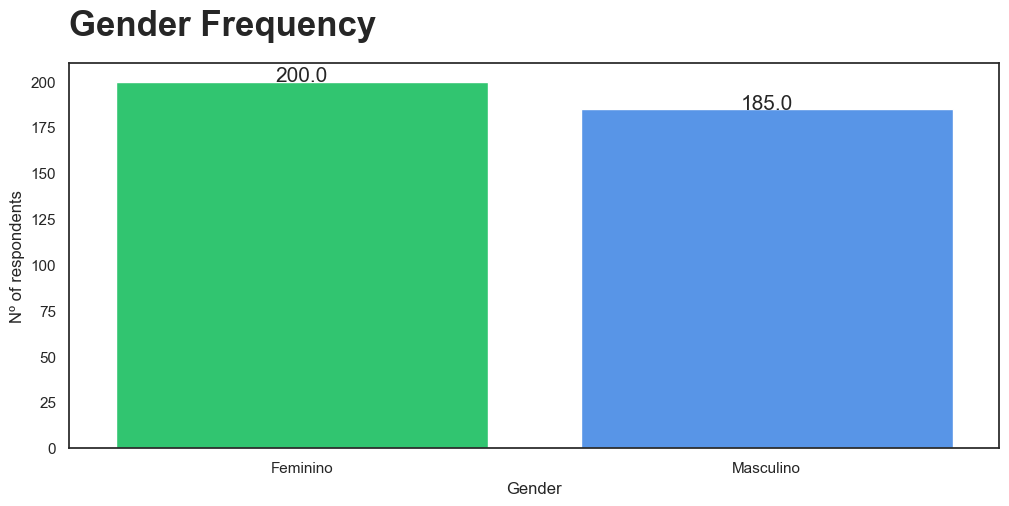

In [16]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(data=data_translated, x='Q9 - Gender', palette=palette_gender)

total_records = len(data_translated['Q9 - Gender'])
for p in ax.patches:
    frequency = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 3
    ax.annotate(frequency, (x, y), rotation=0, size=15, ha='center', va='center')

plt.title('Gender Frequency', fontdict={'fontsize': 25, 'fontweight': "bold"}, loc='left', pad=20)
ax.set_ylabel('Nº of respondents', fontsize=12)
ax.set_xlabel('Gender', fontsize=12)

plt.show()

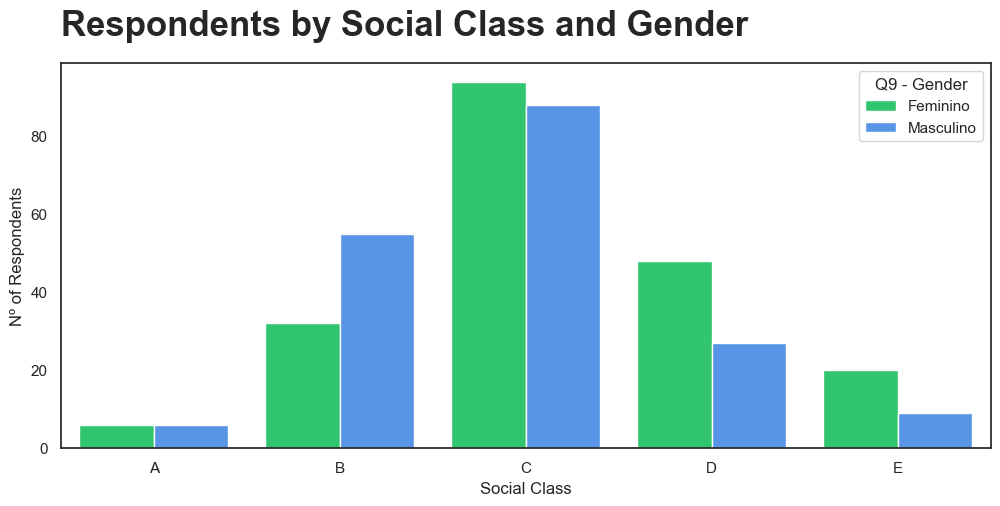

In [17]:
fig, ax = plt.subplots(figsize = (12,5))

order = ['A', 'B', 'C', 'D', 'E']
sns.countplot(data = data_translated, x = 'Q12 - Social class', hue = 'Q9 - Gender', order = order, palette = palette_gender)

plt.title('Respondents by Social Class and Gender', fontdict = {'fontsize' : 25, 'fontweight' : "bold"}, loc = 'left', pad = 20)
ax.set_ylabel('Nº of Respondents', fontsize = 12)
ax.set_xlabel('Social Class', fontsize = 12)
plt.show()

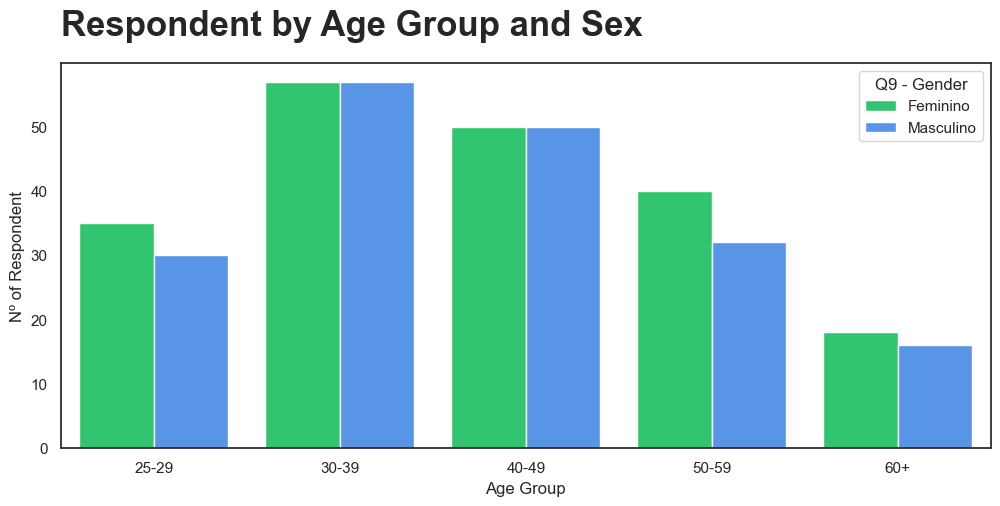

In [18]:
fig, ax = plt.subplots(figsize = (12,5))

order = ['25-29', '30-39', '40-49', '50-59', '60+']
sns.countplot(data = data_translated, x = 'Age group', hue = 'Q9 - Gender', order = order, palette = palette_gender)

plt.title('Respondent by Age Group and Sex', fontdict = {'fontsize' : 25, 'fontweight' : "bold"}, loc = 'left', pad = 20)
ax.set_ylabel('Nº of Respondent', fontsize = 12)
ax.set_xlabel('Age Group', fontsize = 12)
plt.show()

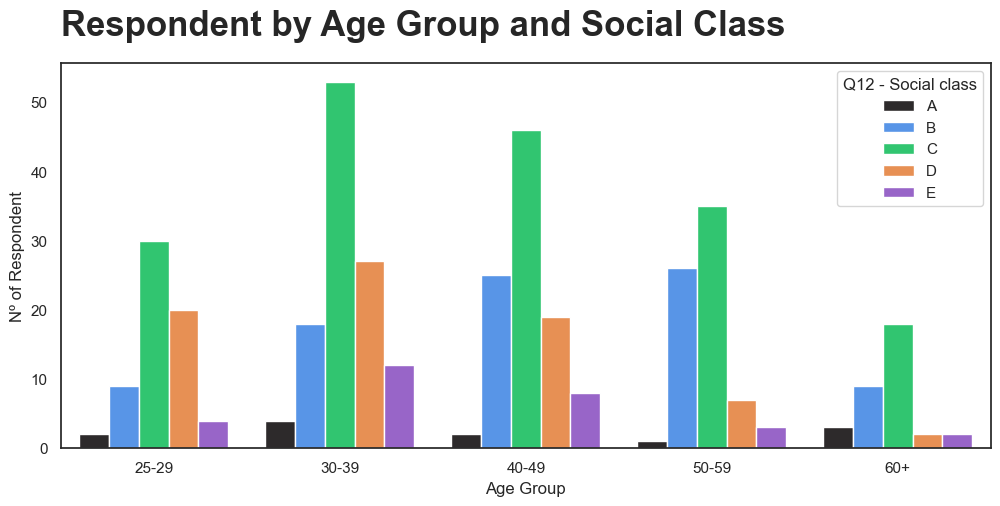

In [19]:
fig, ax = plt.subplots(figsize = (12,5))

order = ['25-29', '30-39', '40-49', '50-59', '60+']
hue_order = ['A', 'B', 'C', 'D', 'E']
sns.countplot(data = data_translated, x = 'Age group', hue = 'Q12 - Social class', order = order, hue_order = hue_order, palette = palette_social_class)

plt.title('Respondent by Age Group and Social Class', fontdict = {'fontsize' : 25, 'fontweight' : "bold"}, loc = 'left', pad = 20)
ax.set_ylabel('Nº of Respondent', fontsize = 12)
ax.set_xlabel('Age Group', fontsize = 12)
plt.show()

## **Understanding the financial maturity of the Respondents (Question 1 and 2)**

#### Here we are trying to understanding the relation between the financial maturity of the Respondents with the demographics characteristics (Sex, Social Class, and Age Group). The financial maturity is related to two questions:

*Question 1: What level of depth do you give your finances today? check the corresponding options*

| Depth of Financial Planning | Question |
|-----------------------------|----------|
| Basic | Register income and expenses only |
| Basic | I plan how much I intend to spend and receive during the year |
| Intermediate | I analyze how much I intend to spend and receive during the year |
| Intermediate | I study to identify and eliminate |
| Intermediate | I look for ways to optimize taxation |
| Advanced | I manage my investment portfolio |
| Advanced | I plan for the succession of my assets |
| None | I don't do any of this and I don't think I need to |
| None | I don't do any of this, but I understand that I should |

*Question 2: If you register income and expenses, share with us the tool you use for that*
| Tools Used | Question |
|------------|----------|
| Average | Excel |
| Advanced | Power BI |
| Traditional Method | Pen and Paper |
| Other Tools | Others |


### **Analysing Q1 Answers**

Creating list for the questions order and the hue order 

In [20]:
Q1_order = [
    'Q1 - Register income and expenses only',
    'Q1 - I plan how much I intend to spend and receive during the year',
    'Q1 - I analyze how much I intend to spend and receive during the year',
    'Q1 - I study to identify and eliminate',
    'Q1 - I look for ways to optimize taxation',
    'Q1 - I manage my investment portfolio',
    'Q1 - I plan for the succession of my assets',
    'Q1 - I don\'t do any of this and I don\'t think I need to',
    'Q1 - I don\'t do any of this, but I understand that I should'
]

Q2_order = [
    'Q2 - Excel',
    'Q2 - Power BI',
    'Q2 - Pen and Paper',
    'Q2 - Others'
]

social_class_oder = ['A', 'B', 'C', 'D', 'E']

age_group_order = ['25-29', '30-39', '40-49', '50-59', '60+']

#### **Q1 - by Gender**

**Gender Insights**

As we can see, men marked stated in greater quantity and percentage options that indicates a higher finance level, such as:

- Q1 - I plan how much I intend to spend and receive during the year
- Q1 - I analyze how much I intend to spend and receive during the year
- Q1 - I study to identify and eliminate
- Q1 - I look for ways to optimize taxation
- Q1 - I manage my investment portfolio
- Q1 - I plan for the succession of my assets

This demonstrates a higher level of depth in their finances. In line with this, women marked a greater quantity the option "I don't do any of this, but I understand that I should," which supports the notion that women, on average, exhibit a lower level of financial involvement, but it shows that they understand its importance. **There might be opportunity to create a more basic service focused on woman**


To investigate further and understand if the visible difference is really significant or not I used statistics. I conducted a hypothesis test using the **chi_square test of independence**. The null hypothesis posits that the respondents' answers (0, 1) are not associated with their gender (male, female). Using a p_value of 0.05, the following questions were statistically significant:

- Q1 - I manage my investment portfolio
- Q1 - I plan for the succession of my assets

This indicates that gender is indeed related to the responses in these questions. Therefore, we can conclude that, in general, men display a significantly higher level of financial depth in these subjects, whic are related to a higher depth understanding of finance.

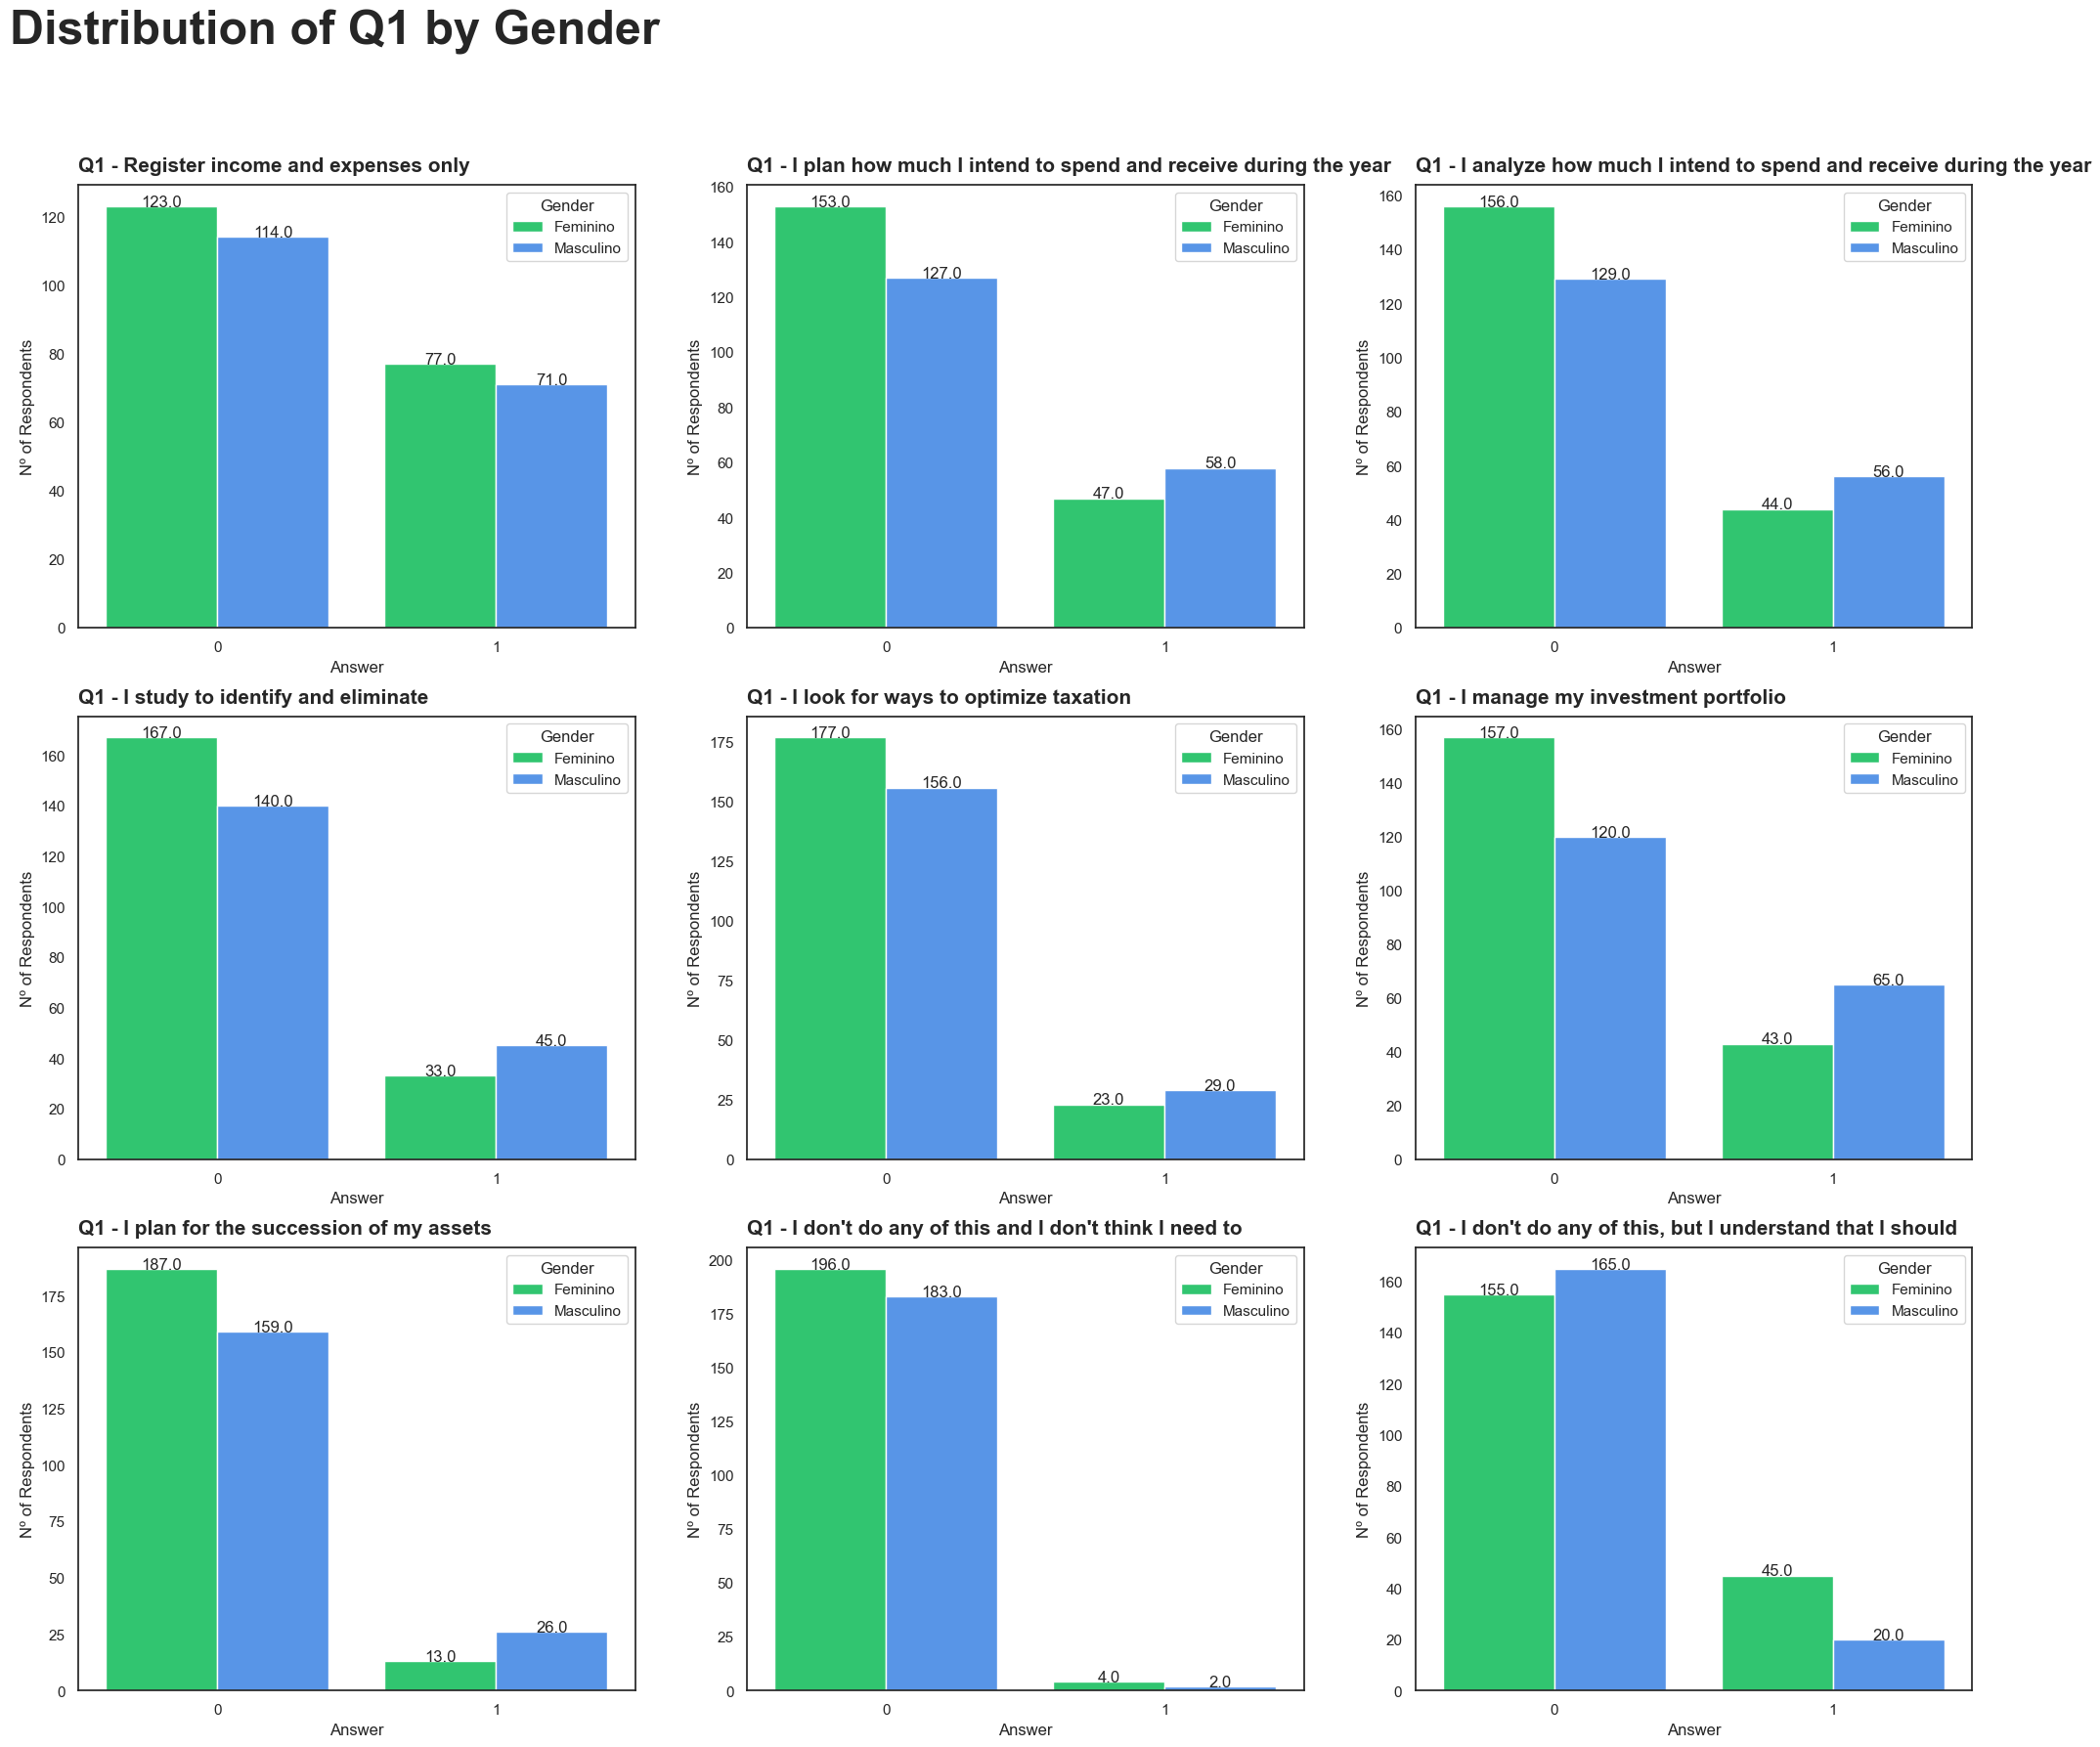

In [21]:
sns.set(rc = {'figure.figsize':(25,20)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Distribution of Q1 by Gender', fontsize=35, fontweight='bold', x = 0.23, y =0.97)

for n, col in enumerate(Q1_order):
    ax = plt.subplot(3, 3, 1 + n)
    sns.countplot(data = data_translated, 
                    x = col, 
                    hue = 'Q9 - Gender',
                    palette = palette_gender, 
                    ax = ax)
                    
    plt.title(f'{col}', fontdict = {'fontsize' : 15, 'fontweight' : "bold"}, loc = 'left', pad = 10) 
    ax.set_ylabel('Nº of Respondents', fontsize = 12) 
    ax.set_xlabel('Answer', fontsize = 12)
    plt.legend(title='Gender', loc='upper right')

    # Adding data label
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
        height,
        '{:1}'.format((height)),
        ha='center',
        size = 12)

plt.show()

Hypothesis Testing for the Visual differences perceived

In [22]:
p_values = {}

for col in Q1_order:
    print(f'Testing for col: {col}')
    observed_frquency = pd.crosstab(data_translated[col], data_translated['Q9 - Gender'])
    print(observed_frquency.values)
    # Calculating chi2 stats, pvlue, degrees of freedom and expected frequency
    statistic, p_value, dof, expected_freq = chi2_contingency(observed_frquency.values)
    print(f'P-value:{p_value}')
    print(expected_freq.round(2))

    # Appending to dictionary
    p_values[col] = p_value

Testing for col: Q1 - Register income and expenses only
[[123 114]
 [ 77  71]]
P-value:1.0
[[123.12 113.88]
 [ 76.88  71.12]]
Testing for col: Q1 - I plan how much I intend to spend and receive during the year
[[153 127]
 [ 47  58]]
P-value:0.10659026800394672
[[145.45 134.55]
 [ 54.55  50.45]]
Testing for col: Q1 - I analyze how much I intend to spend and receive during the year
[[156 129]
 [ 44  56]]
P-value:0.08315814032458436
[[148.05 136.95]
 [ 51.95  48.05]]
Testing for col: Q1 - I study to identify and eliminate
[[167 140]
 [ 33  45]]
P-value:0.07483556564080782
[[159.48 147.52]
 [ 40.52  37.48]]
Testing for col: Q1 - I look for ways to optimize taxation
[[177 156]
 [ 23  29]]
P-value:0.29443659266202427
[[172.99 160.01]
 [ 27.01  24.99]]
Testing for col: Q1 - I manage my investment portfolio
[[157 120]
 [ 43  65]]
P-value:0.004212075574318884
[[143.9 133.1]
 [ 56.1  51.9]]
Testing for col: Q1 - I plan for the succession of my assets
[[187 159]
 [ 13  26]]
P-value:0.022293186902

In [23]:
df_p_values = pd.DataFrame.from_dict(p_values, orient='index', columns=['P-value'])
df_p_values.style.background_gradient(cmap ='coolwarm')

#### **Q1 - By Social Class**

**Social Class Insights**

People from higher social classes reported being knowledgeable about more complex financial topics, such as optimizing taxation, managing investment portfolios, and planning for asset succession. This suggests that products related to these topics could be especially appealing to these individuals.

Interestingly, people from lower social classes indicated that they engage in similar basic financial habits as those from higher social classes. For instance, they also keep track of their income and expenses, plan their spending and income for the year, analyze their financial situation, and try to identify and eliminate financial risks.

This suggests that **basic financial services could also be beneficial to people from lower social classes**. In other words, both higher and lower social classes could be potential target audiences for different kinds of financial services.

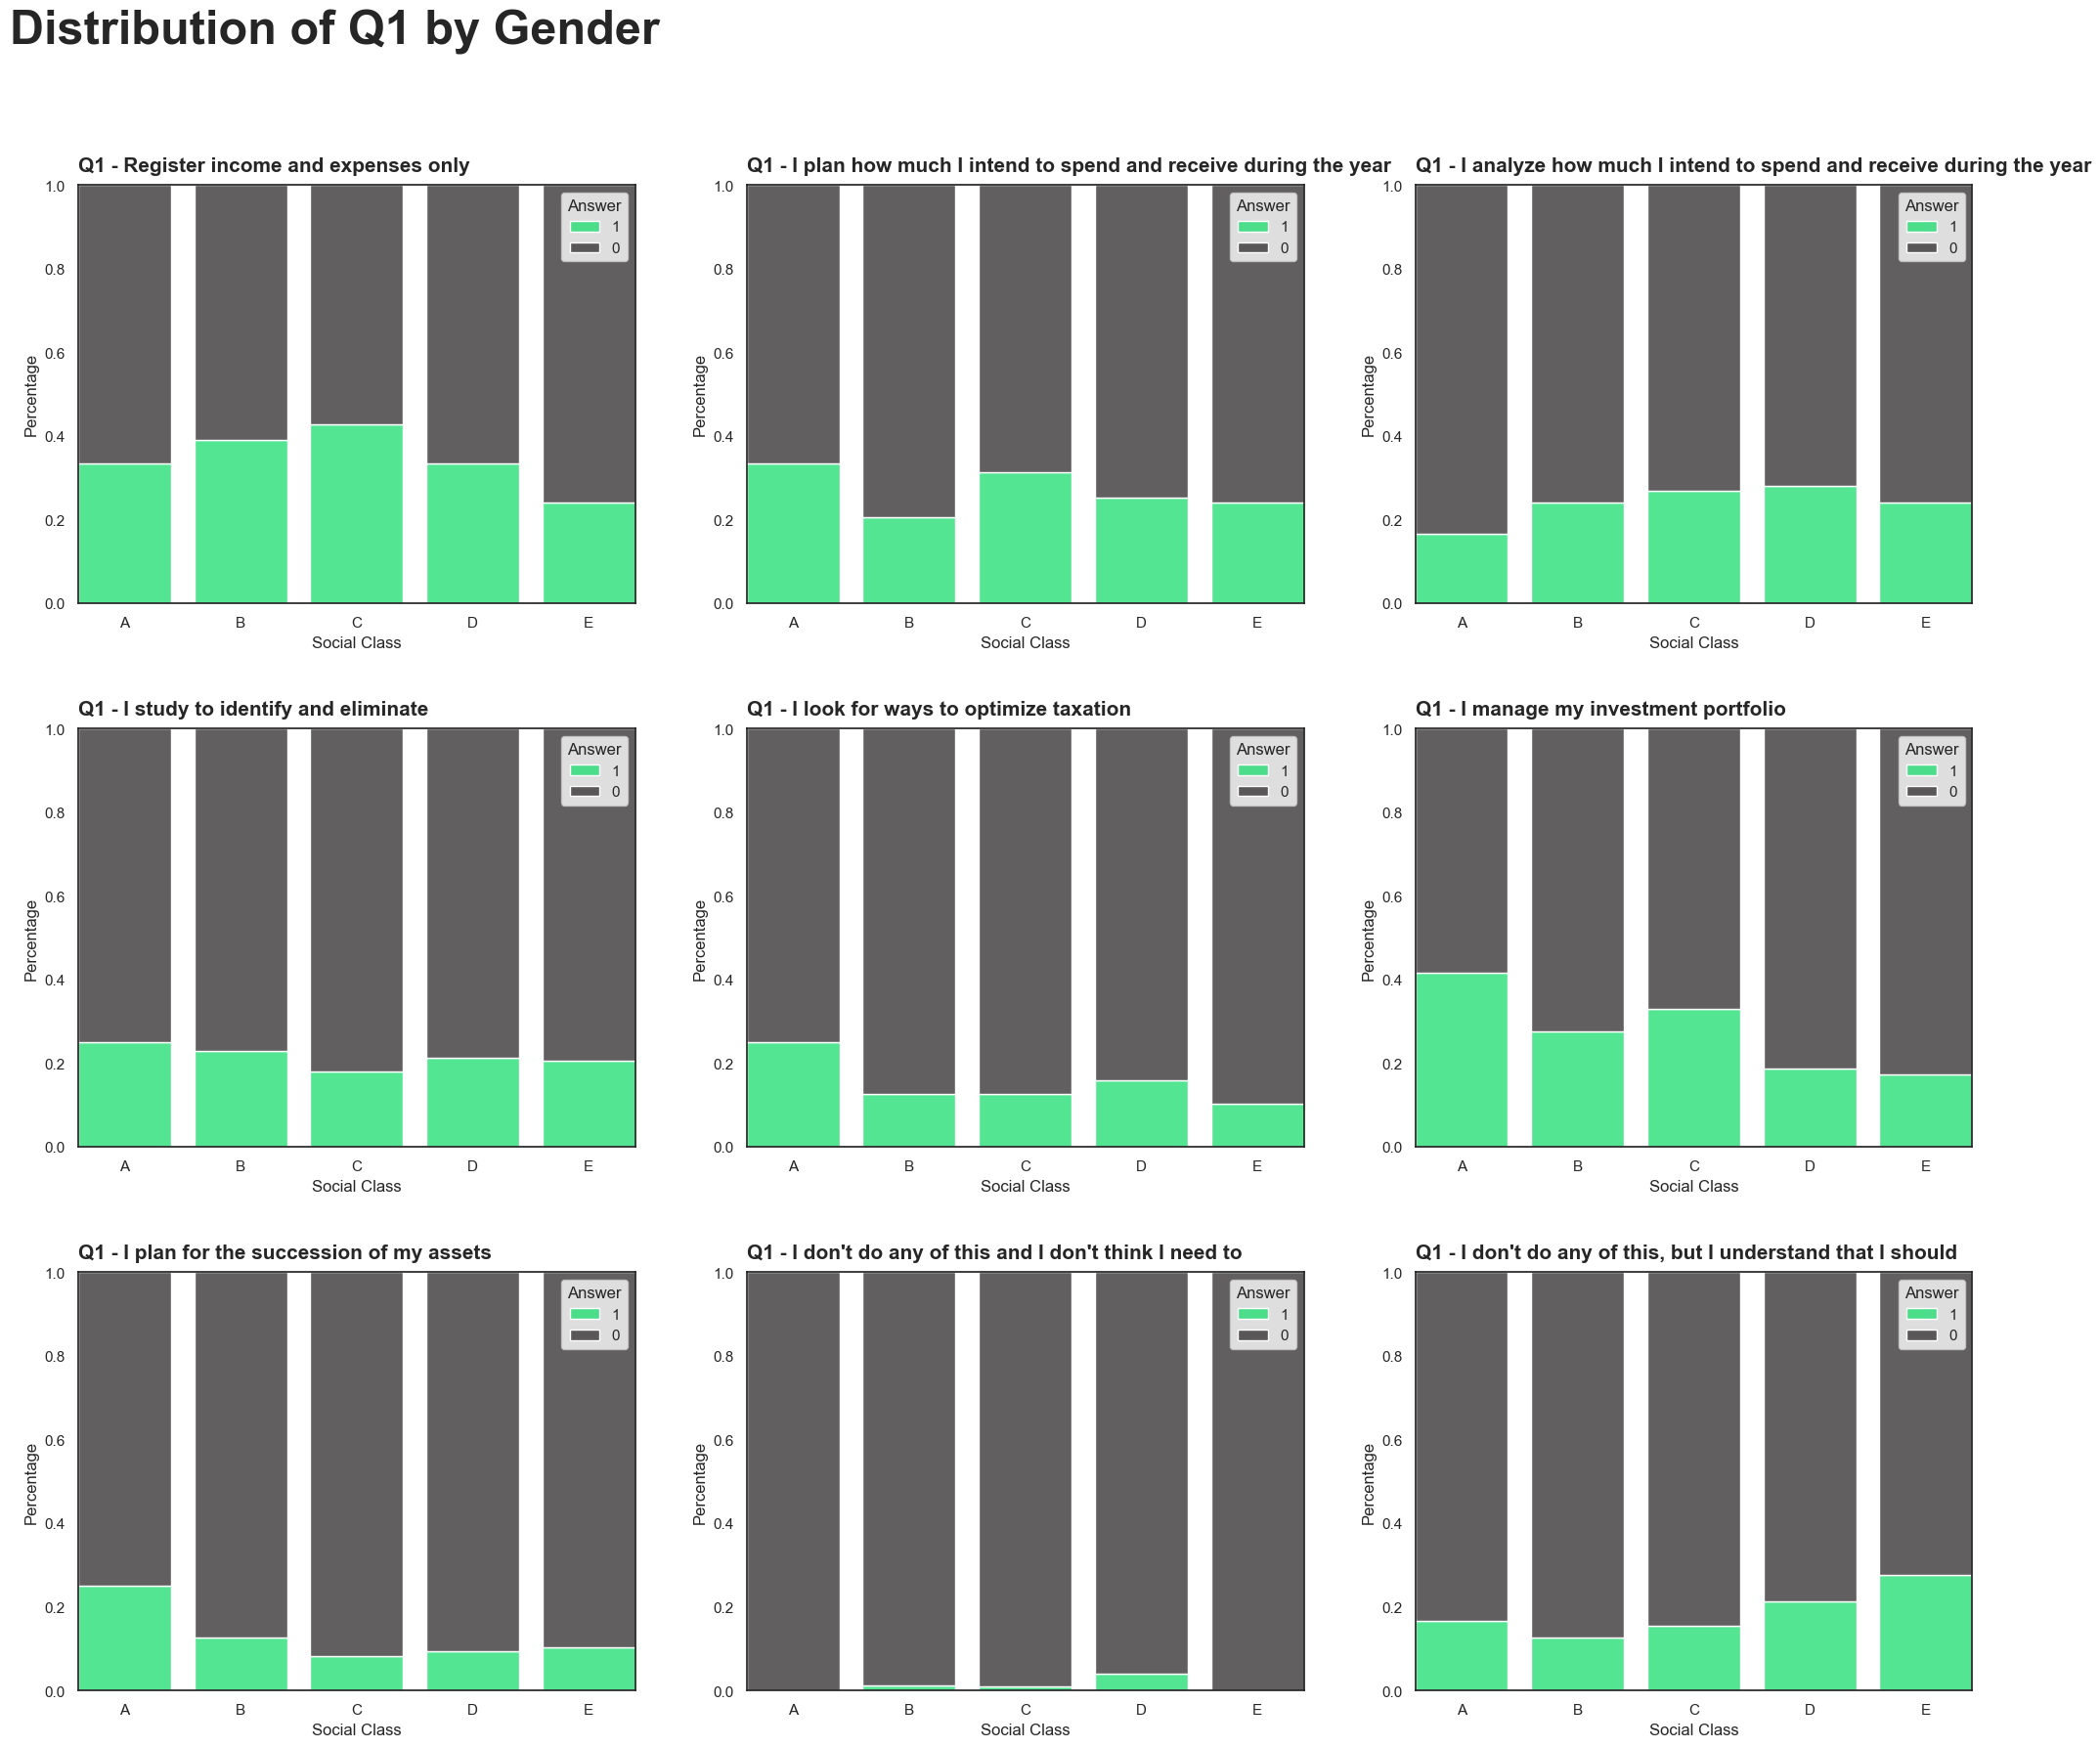

In [24]:
sns.set(rc = {'figure.figsize':(25,20)})
sns.set_style("white")  # Set the plot background to white
plt.suptitle('Distribution of Q1 by Gender', fontsize=35, fontweight='bold', x = 0.23, y =0.97)
plt.subplots_adjust(hspace=0.3)

data_translated['Q12 - Social class'] = pd.Categorical(data_translated['Q12 - Social class'], social_class_oder)

for n, col in enumerate(Q1_order):
    ax = plt.subplot(3, 3, 1 + n)
    sns.histplot(data = data_translated, 
                    x = 'Q12 - Social class', 
                    hue = col,
                    palette = palette_yes_no,
                    stat="probability", multiple="fill", shrink=.8, 
                    ax = ax)
                    
    plt.title(f'{col}', fontdict = {'fontsize' : 15, 'fontweight' : "bold"}, loc = 'left', pad = 10) 
    plt.ylabel('Percentage', fontsize = 12) 
    plt.xlabel('Social Class', fontsize = 12)
    plt.legend(title='Answer', loc='upper right', labels = [1, 0])

plt.show()

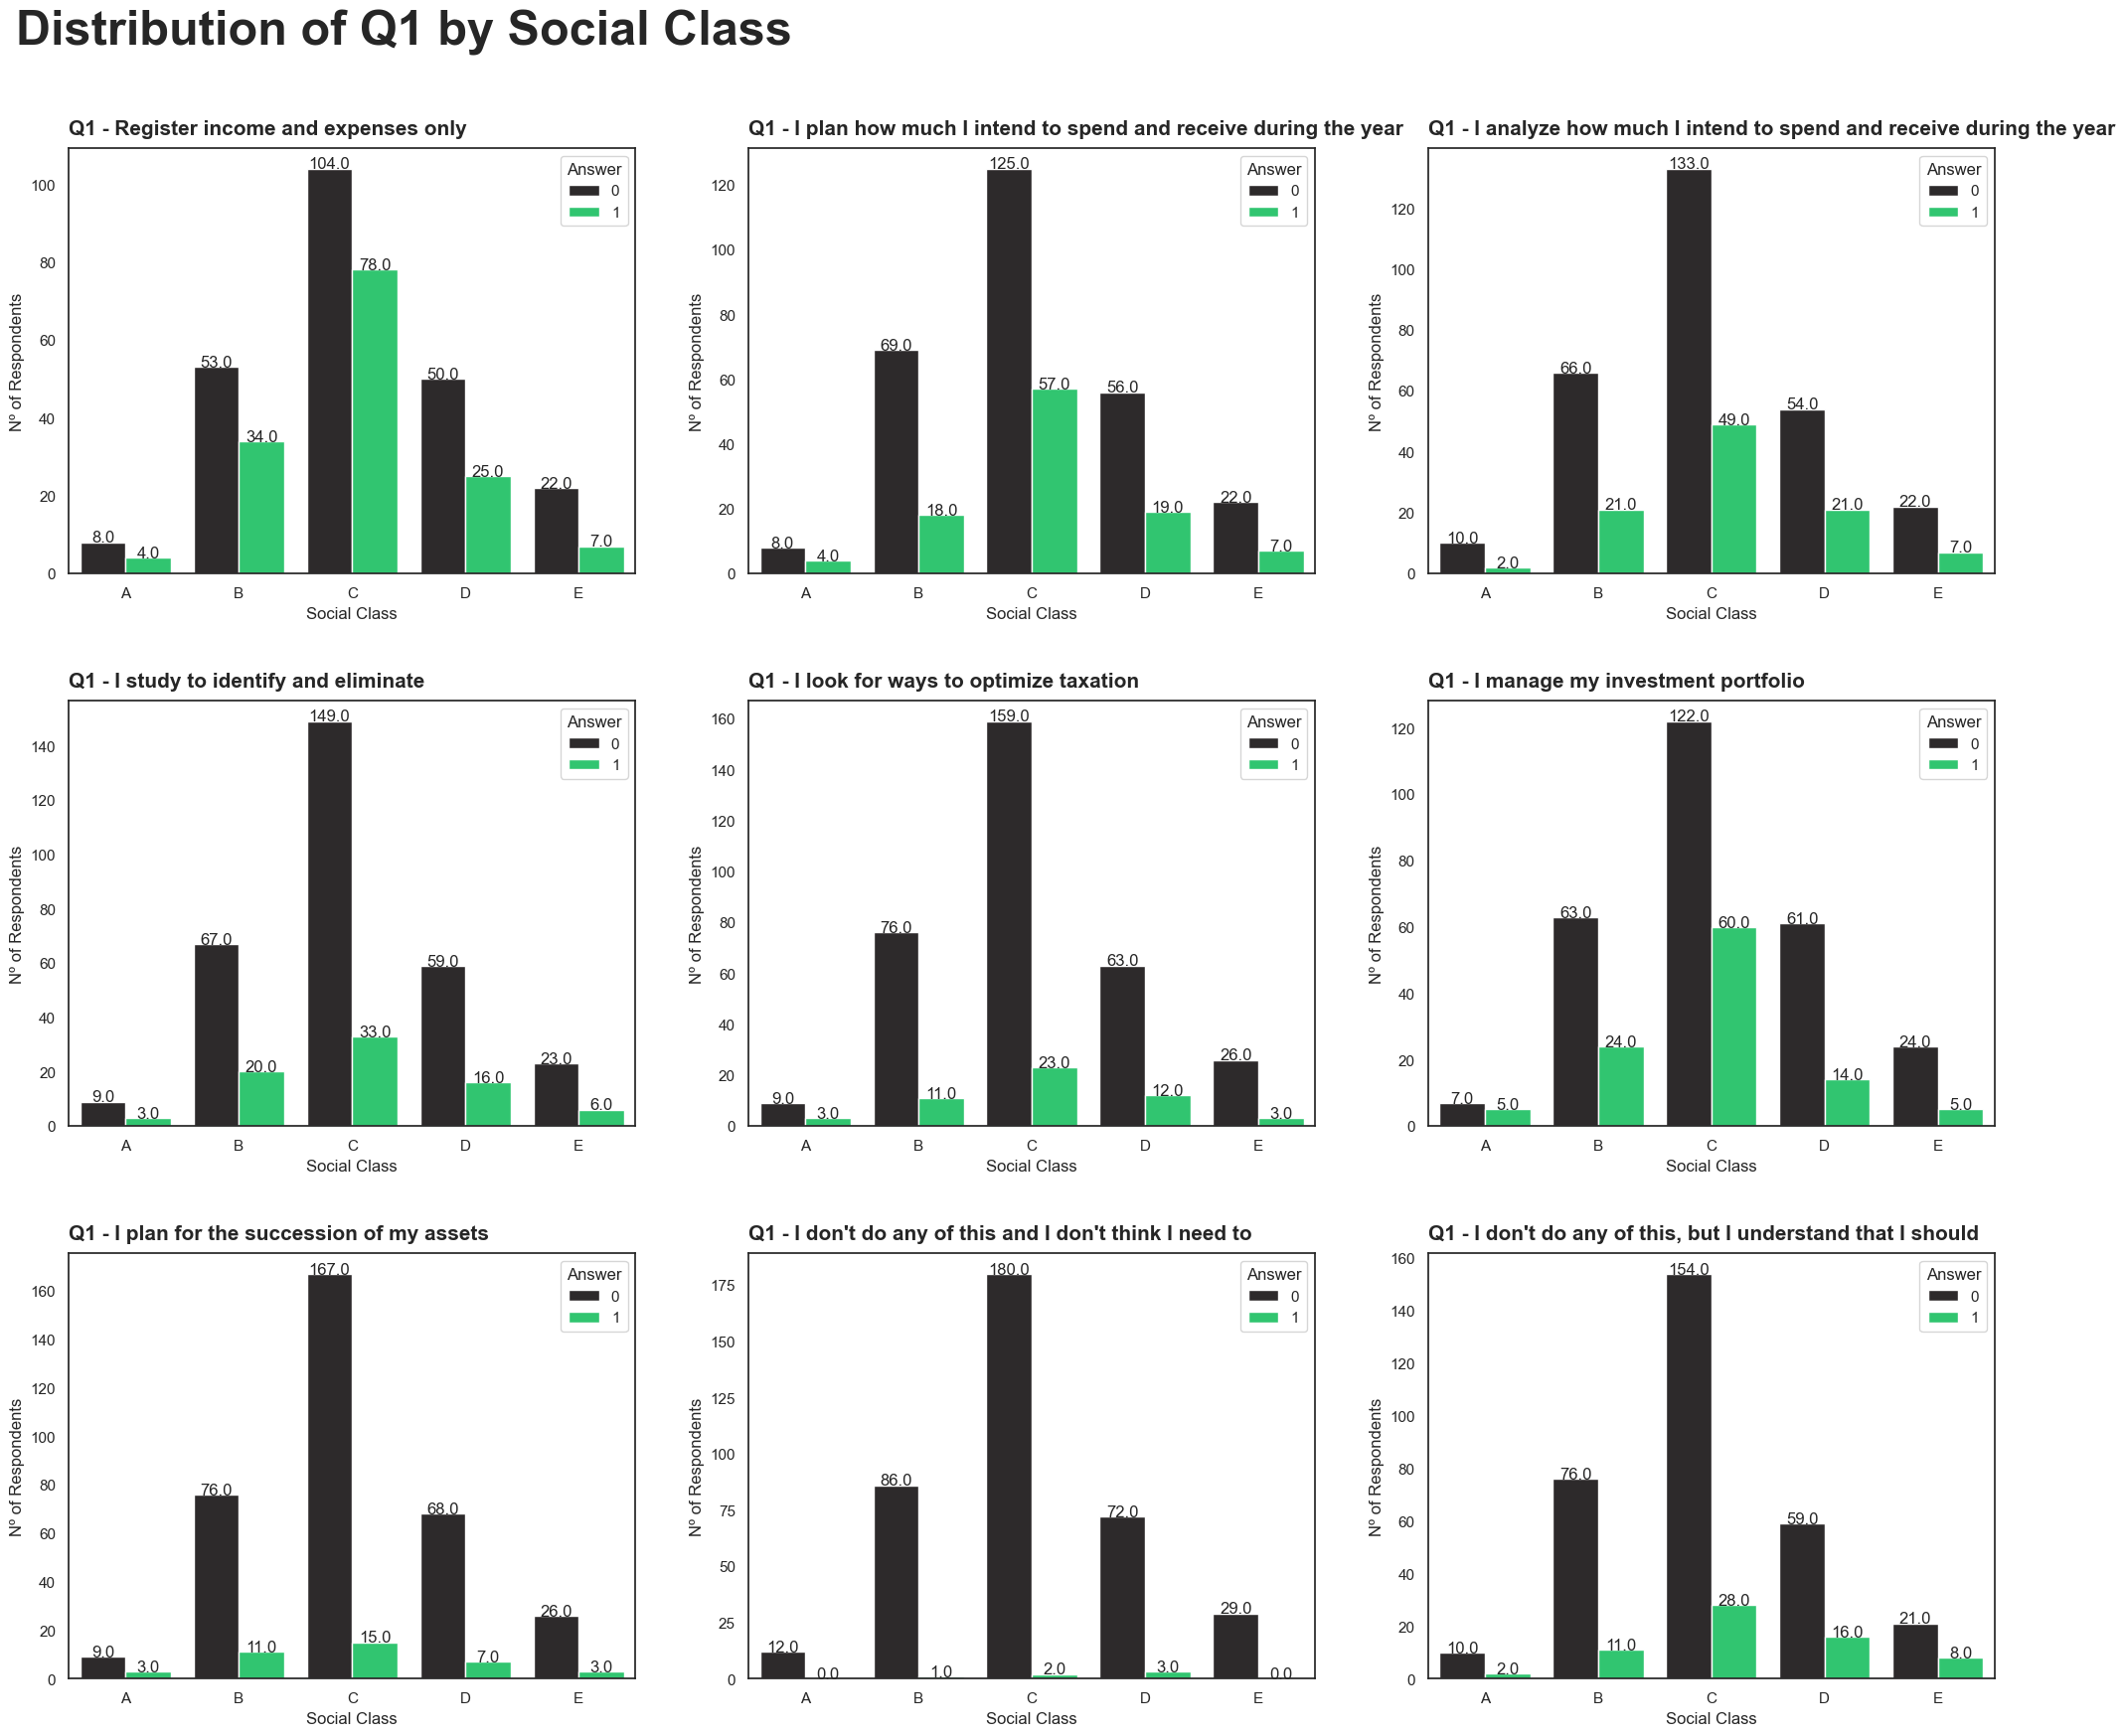

In [25]:
sns.set(rc = {'figure.figsize':(25,20)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Distribution of Q1 by Social Class', fontsize=35, fontweight='bold', x = 0.26, y =0.95)
plt.subplots_adjust(hspace=0.3)

for n, col in enumerate(Q1_order):
    ax = plt.subplot(3, 3, 1 + n)
    sns.countplot(data = data_translated, 
                    x = 'Q12 - Social class', 
                    hue = col,
                    palette = palette_yes_no,
                    order = social_class_oder, 
                    ax = ax)
                    
    plt.title(f'{col}', fontdict = {'fontsize' : 15, 'fontweight' : "bold"}, loc = 'left', pad = 10)  
    plt.ylabel('Nº of Respondents', fontsize = 12) 
    plt.xlabel('Social Class', fontsize = 12)
    plt.legend(title='Answer', loc='upper right', labels = [0, 1])

    # Adicionando rotúlo de data_translated do Nº de clientes
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
        height,
        '{:1}'.format((height)),
        ha='center',
        size = 12)

plt.show()

Chi-square test

In [26]:
p_values = {}

for col in Q1_order:
    observed_frquency = pd.crosstab(data_translated[col], data_translated['Q12 - Social class'])
    # Calculating chi2 stats, pvlue, degrees of freedom and expected frequency
    statistic, p_value, dof, expected_freq = chi2_contingency(observed_frquency.values)

    # Appending to dictionary
    p_values[col] = p_value

df_p_values = pd.DataFrame.from_dict(p_values, orient='index', columns=['P-value'])
df_p_values.style.background_gradient(cmap ='coolwarm')

#### **Q1 - By Group Age**

**Age Group Insights**

Here are some key observations from our data:

1. The younger age groups (25-30, 31-35, 35-40) show a higher engagement in managing their own investment portfolios. This suggests that these groups recognize the importance of active financial management and might be more open to services related to portfolio management.

3. Surprisingly, a significant portion of the 50-59 age group acknowledged that they don't currently engage in any of these financial activities, but understand they should. This finding is unusual and warrants further investigation. These individuals may represent a potential market for financial education or advisory services, or just a bad grouping pattern.

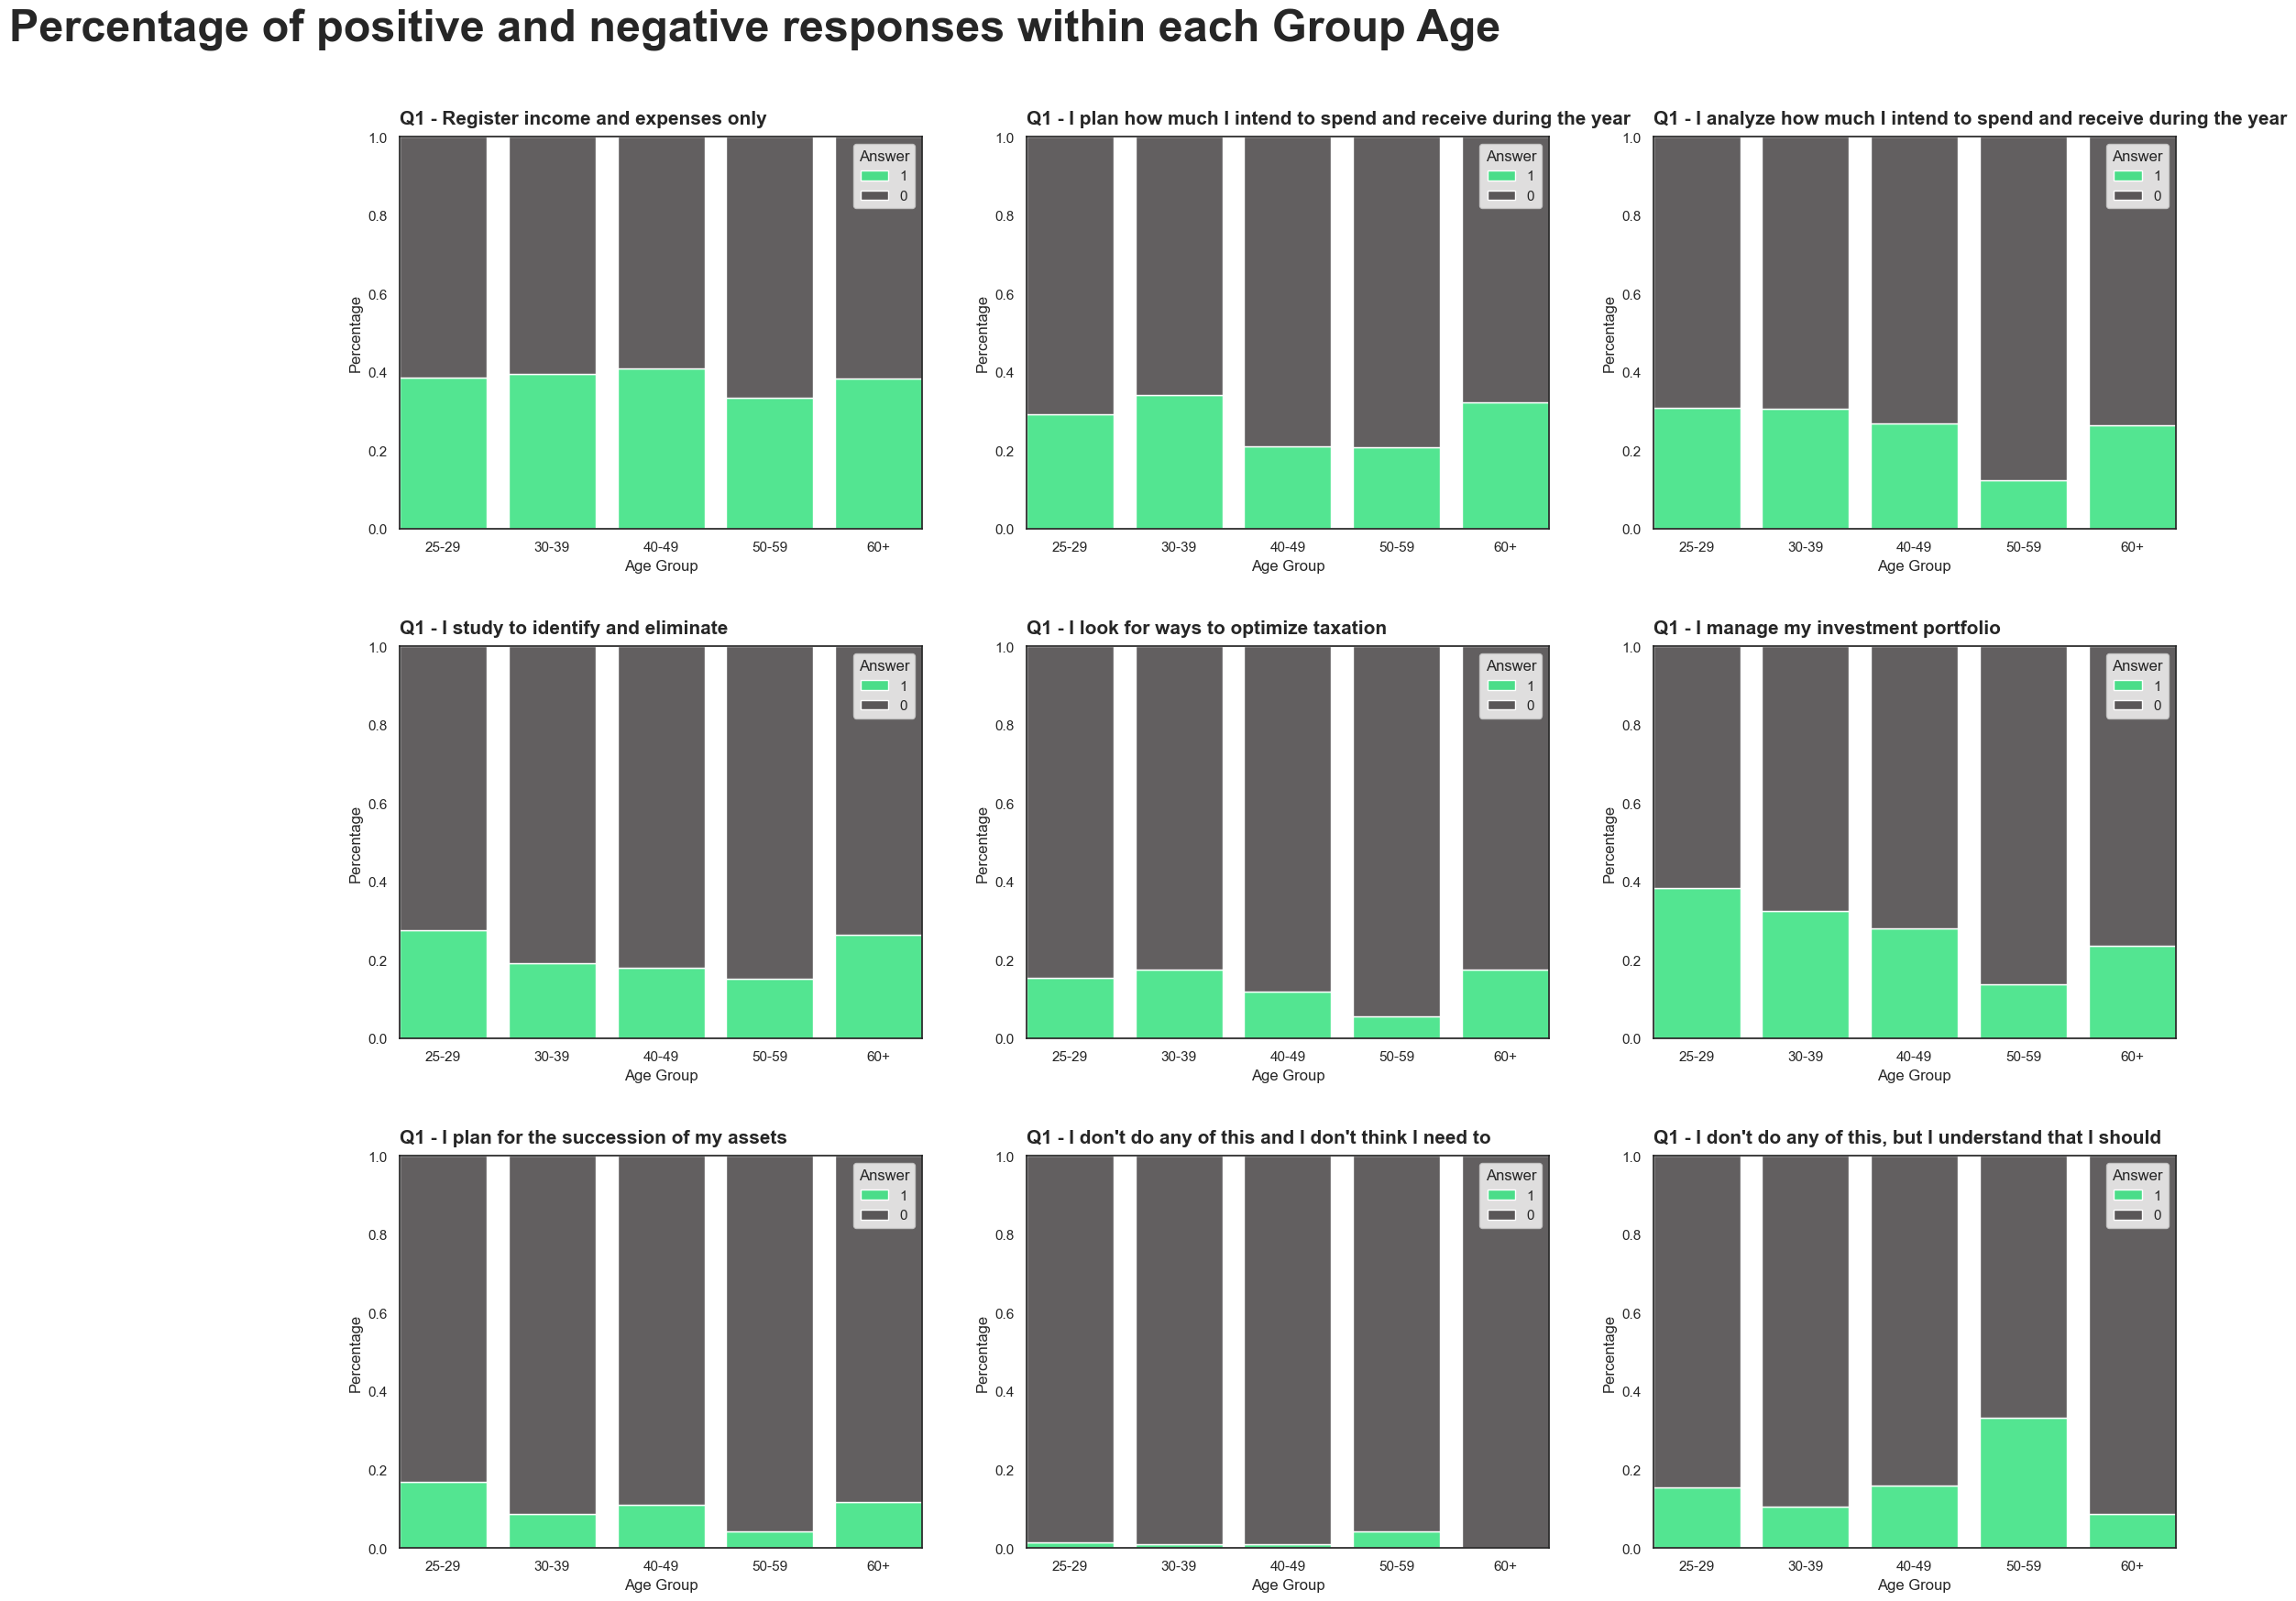

In [27]:
sns.set(rc = {'figure.figsize':(25,20)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Percentage of positive and negative responses within each Group Age', fontsize=35, fontweight='bold', x = 0.28, y =0.95)
plt.subplots_adjust(hspace=0.3)

data_translated['Age group'] = pd.Categorical(data_translated['Age group'], age_group_order)

for n, col in enumerate(Q1_order):
    ax = plt.subplot(3, 3, 1 + n)
    sns.histplot(data = data_translated, 
                    x = 'Age group', 
                    hue = col,
                    palette = palette_yes_no,
                    stat="probability", multiple="fill", shrink=.8 )
                    
    plt.title(f'{col}', fontdict = {'fontsize' : 15, 'fontweight' : "bold"}, loc = 'left', pad = 10) 
    plt.ylabel('Percentage', fontsize = 12) 
    plt.xlabel('Age Group', fontsize = 12)
    plt.legend(title='Answer', loc='upper right', labels = [1, 0])

plt.show()

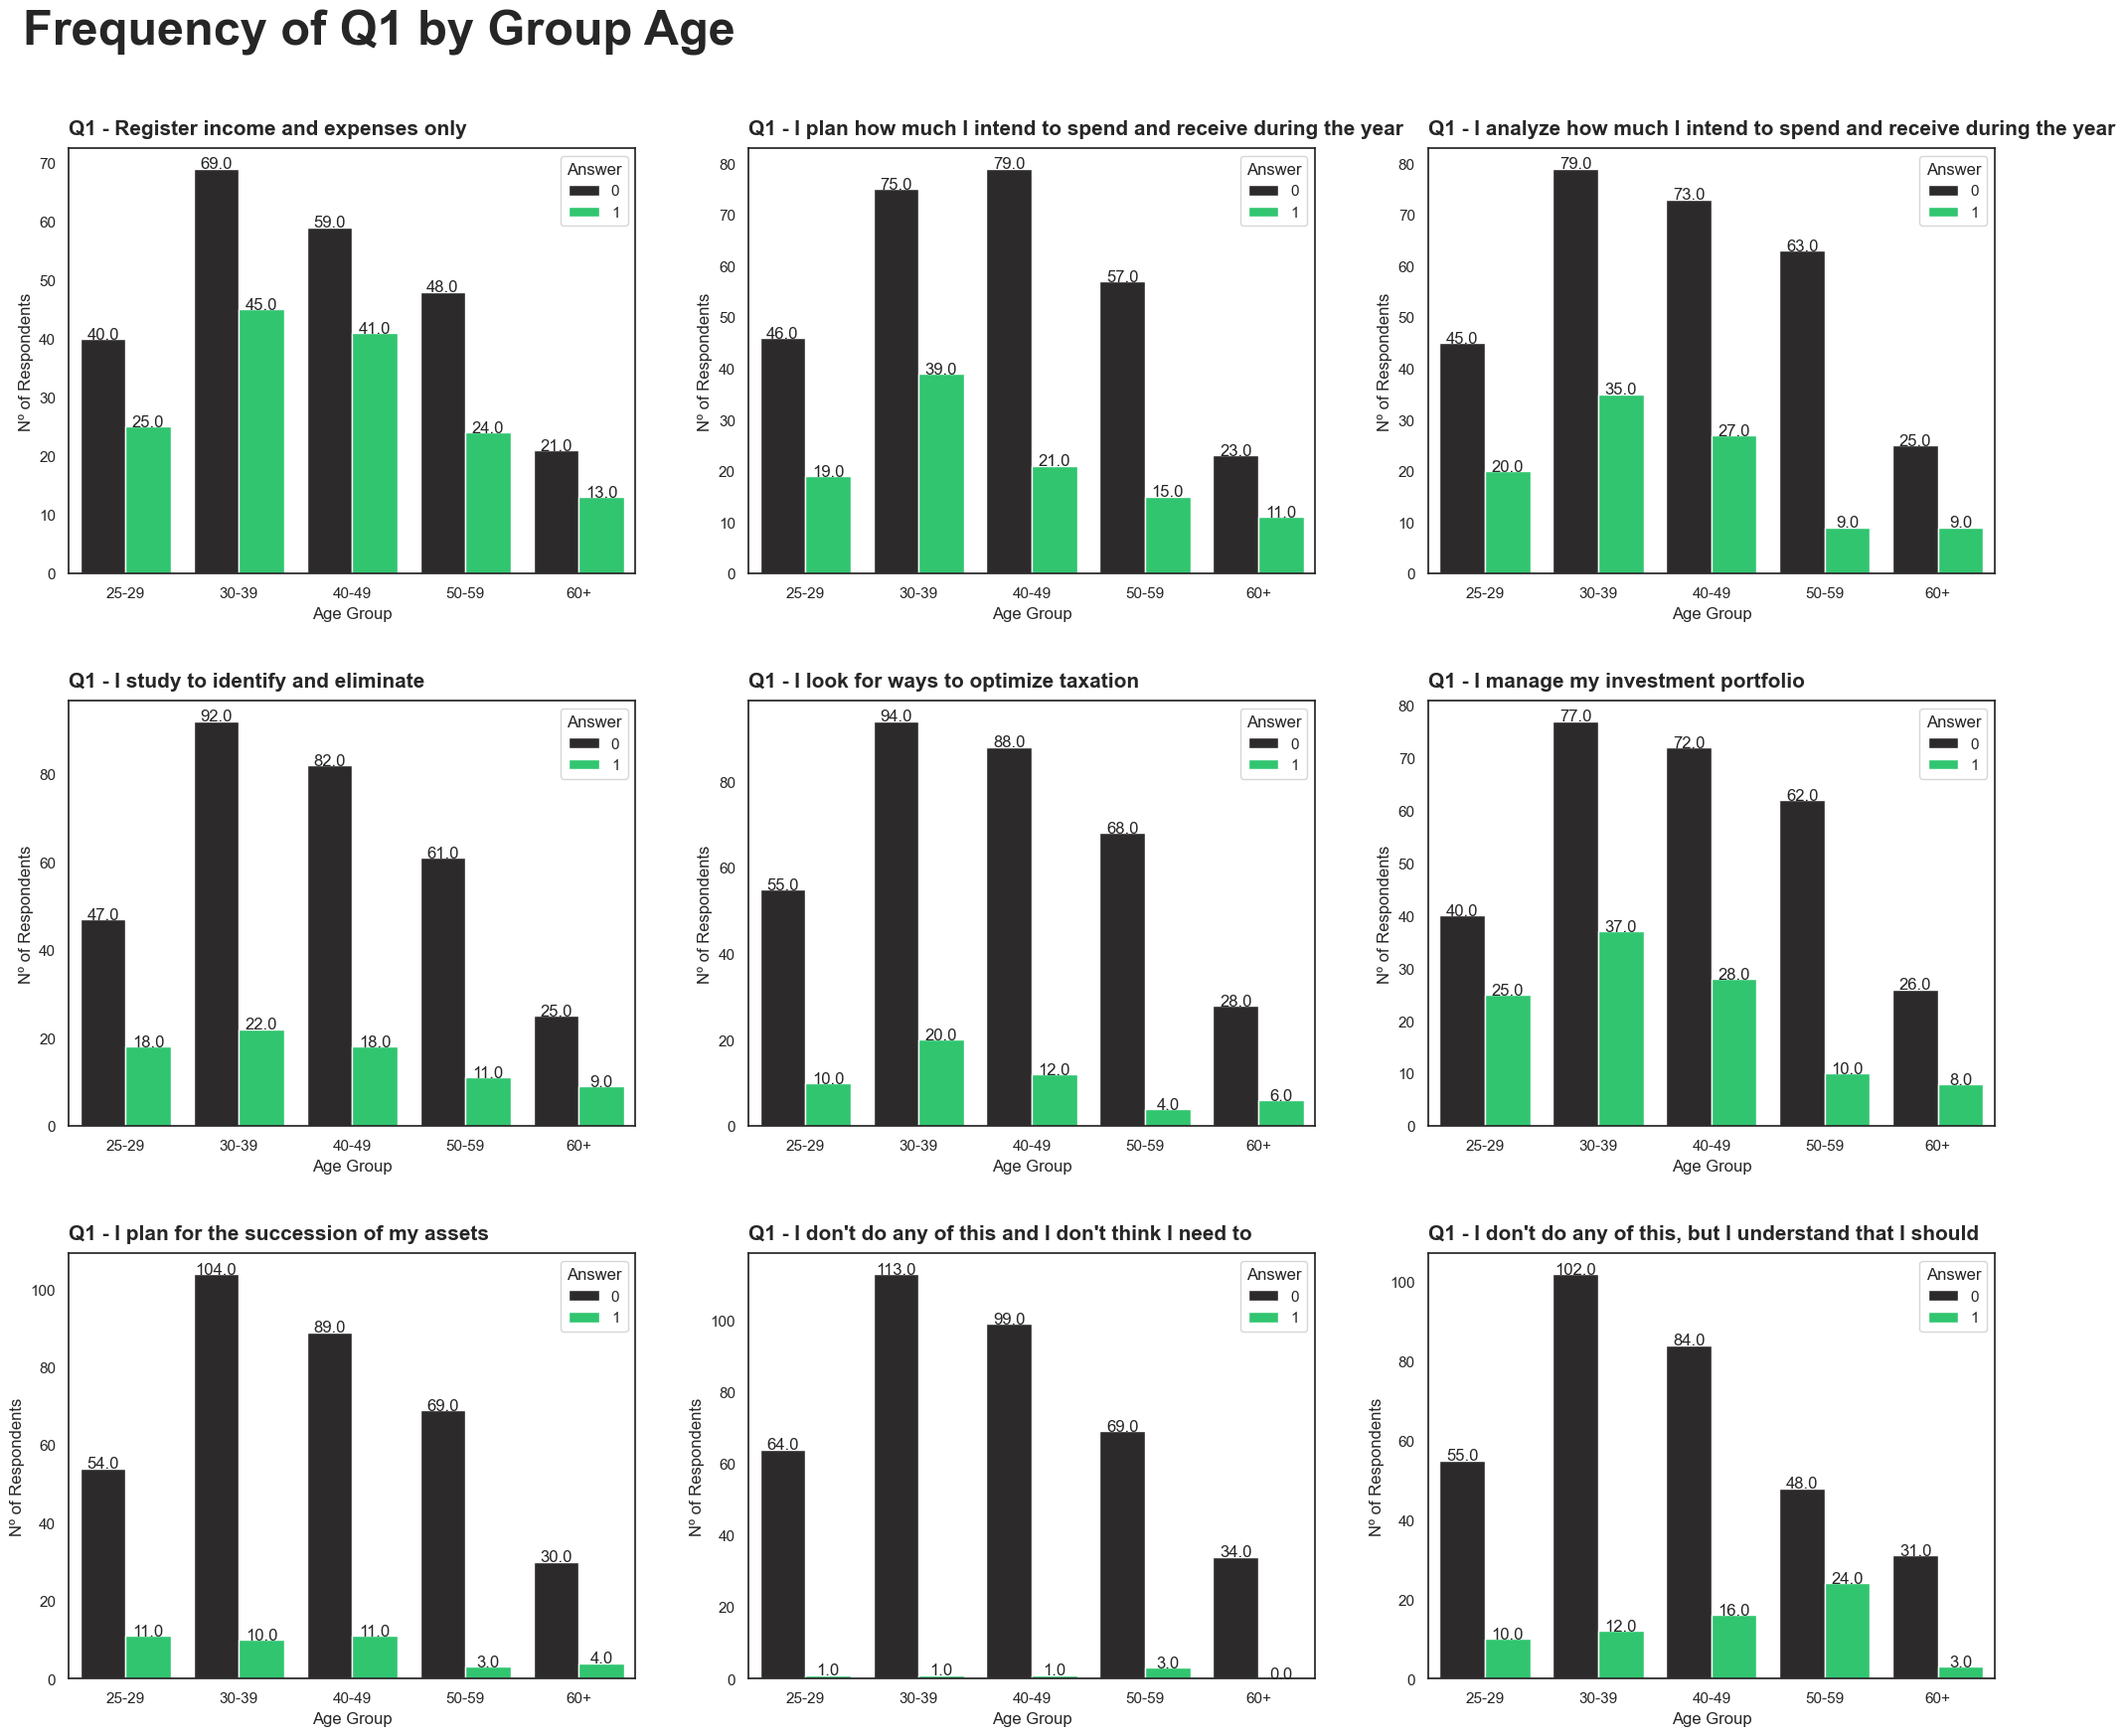

In [28]:
sns.set(rc = {'figure.figsize':(25,20)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Frequency of Q1 by Group Age', fontsize=35, fontweight='bold', x = 0.25, y =0.95)
plt.subplots_adjust(hspace=0.3)


for n, col in enumerate(Q1_order):
    ax = plt.subplot(3, 3, 1 + n)
    ax = sns.countplot(data = data_translated, 
                    x = 'Age group', 
                    hue = col,
                    palette = palette_yes_no,
                    order = age_group_order
                    )
                    
    plt.title(f'{col}', fontdict = {'fontsize' : 15, 'fontweight' : "bold"}, loc = 'left', pad = 10) 
    plt.ylabel('Nº of Respondents', fontsize = 12) 
    plt.xlabel('Age Group', fontsize = 12)
    plt.legend(title='Answer', loc='upper right', labels = ['0', '1'])

    # Adicionando rotúlo de data_translated do Nº de clientes
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
        height,
        '{:1}'.format((height)),
        ha='center',
        size = 12)

plt.show()

Chi-square test

In [29]:
p_values = {}

for col in Q1_order:
    observed_frquency = pd.crosstab(data_translated[col], data_translated['Age group'])
    # Calculating chi2 stats, pvlue, degrees of freedom and expected frequency
    statistic, p_value, dof, expected_freq = chi2_contingency(observed_frquency.values)

    # Appending to dictionary
    p_values[col] = p_value

df_p_values = pd.DataFrame.from_dict(p_values, orient='index', columns=['P-value'])
df_p_values.style.background_gradient(cmap ='coolwarm')

### **Analysing Q2 answers**

#### **Q2 - General**

**General Insights**

Our data provides some interesting insights into the tools people use to manage their finances:

- Excel and pen-and-paper methods are the most popular tools for recording income and expenses. This could be attributed to their simplicity and accessibility.
- All respondents reported using at least one tool for financial record-keeping, highlighting the universal importance of this practice regardless
- Most respondents seem to prefer using just one tool to manage their finances

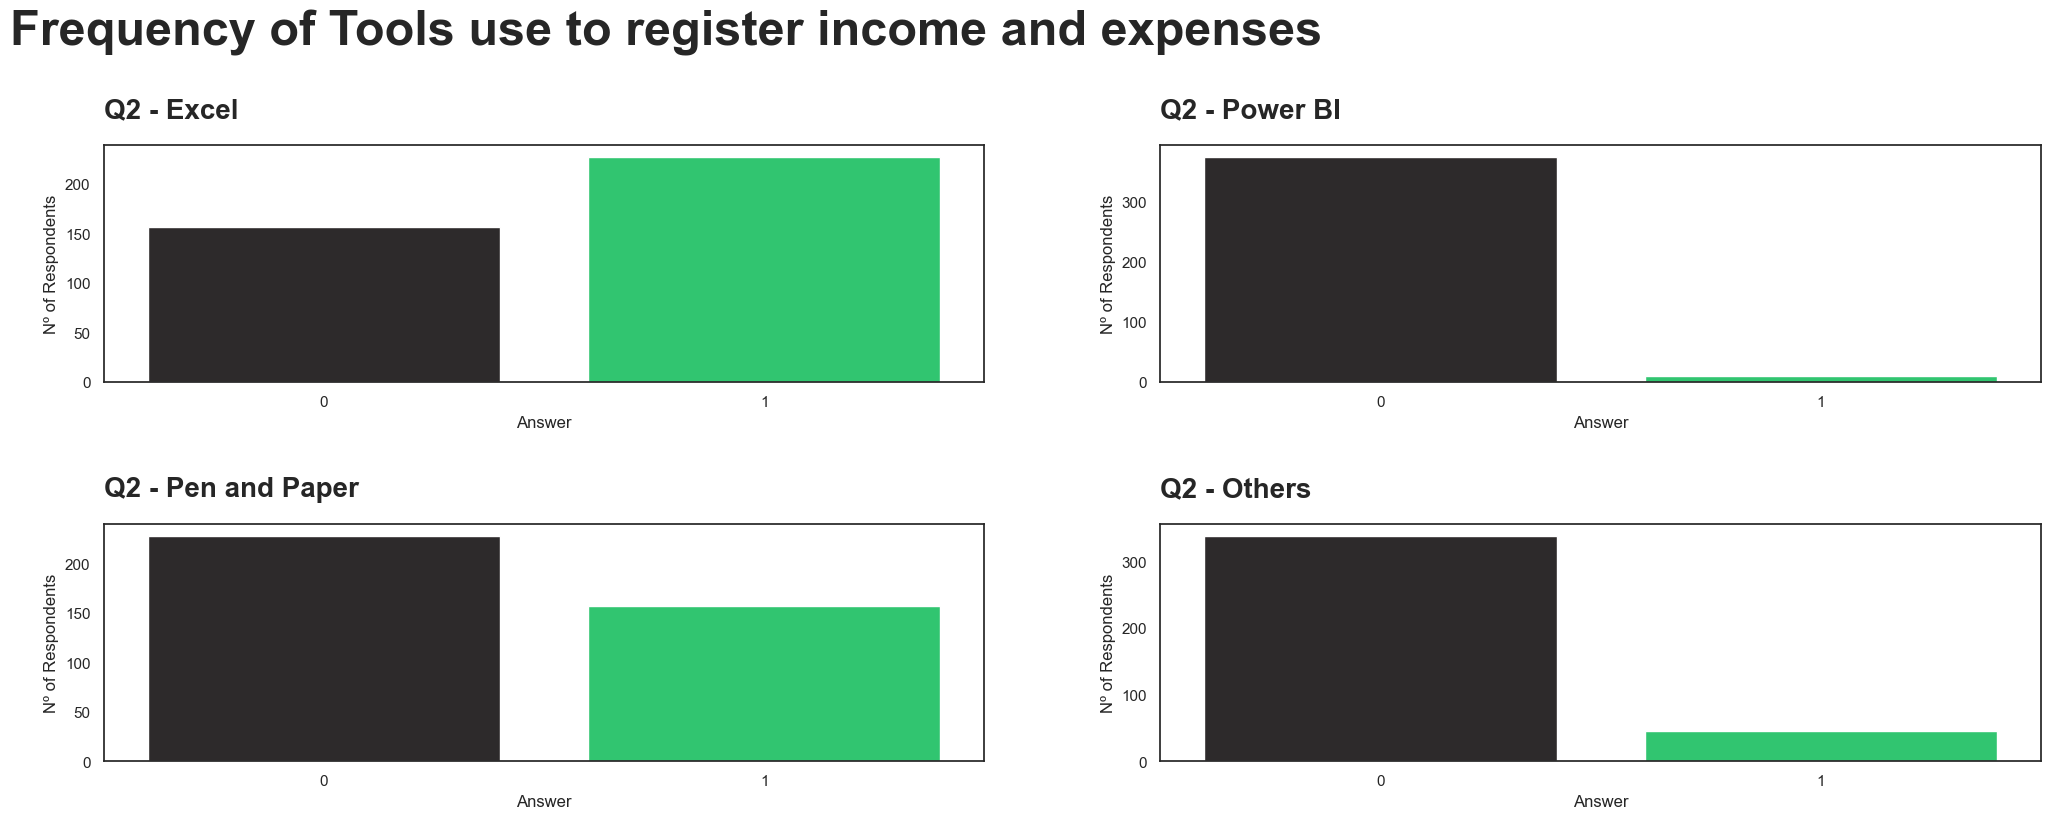

In [30]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Frequency of Tools use to register income and expenses', fontsize=35, fontweight='bold', x = 0.35, y = 1.05)
plt.subplots_adjust(hspace=0.6)

for n, col in enumerate(Q2_order):

    ax = plt.subplot(2, 2, 1 + n)
    ax = sns.countplot(data = data_translated, 
                    x = col, palette = palette_yes_no)
                    
    plt.title(f'{col}', fontdict = {'fontsize' : 20, 'fontweight' : "bold"}, loc = 'left', pad = 20)  
    plt.ylabel('Nº of Respondents', fontsize = 12) 
    plt.xlabel('Answer', fontsize = 12)

plt.show()

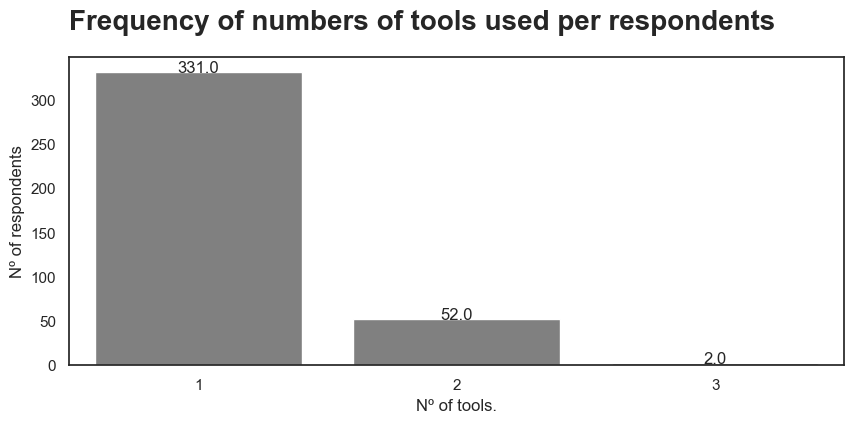

In [31]:
data_translated['Number of tools used'] = data_translated['Q2 - Excel'] + data_translated['Q2 - Power BI'] + data_translated['Q2 - Pen and Paper'] + data_translated['Q2 - Others']

sns.set(rc = {'figure.figsize':(10,4)})
sns.set_style("white")  # Set the plot background to white
ax = sns.countplot(data = data_translated, x = 'Number of tools used', color = 'grey')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height,
    '{:1}'.format((height)),
    ha='center',
    size = 12)

plt.title(f'Frequency of numbers of tools used per respondents', fontdict = {'fontsize' : 20, 'fontweight' : "bold"}, loc = 'left', pad = 20)  
plt.ylabel('Nº of respondents', fontsize = 12) 
plt.xlabel('Nº of tools.', fontsize = 12)

plt.show()

#### **Q2 - By Gender**

**Gender Insights**

-  Gender appears to influence tool preference. Men tend to favor Excel, while women are more likely to use pen and paper.

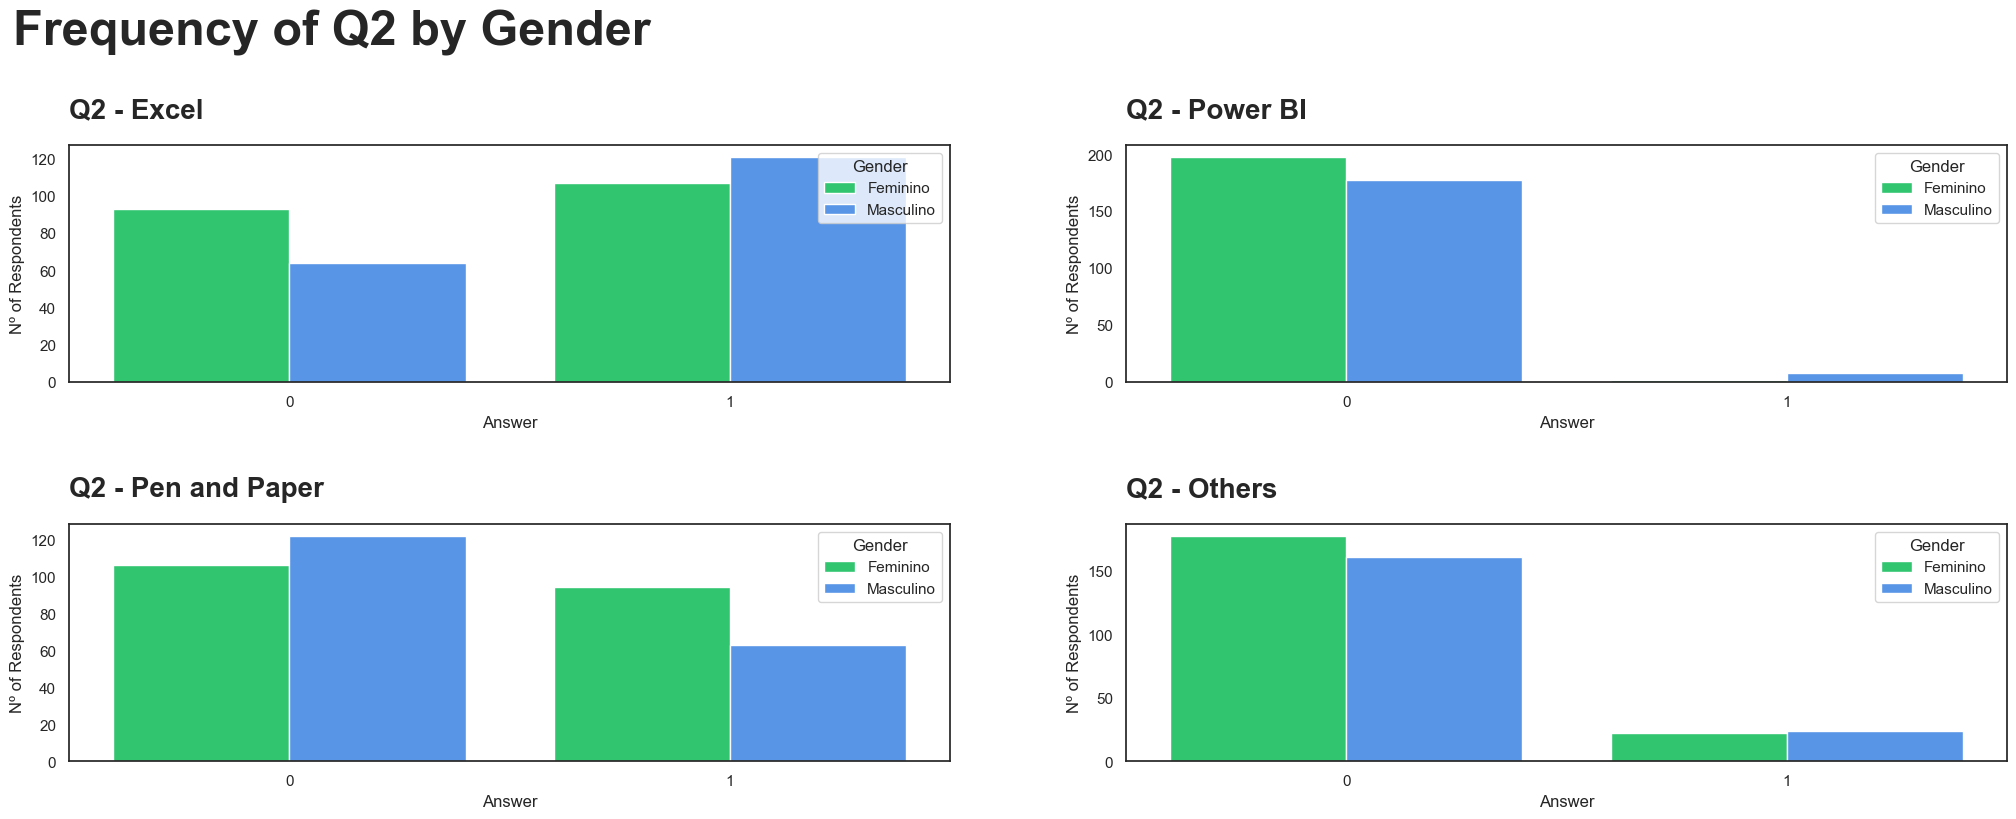

In [32]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Frequency of Q2 by Gender', fontsize=35, fontweight='bold', x = 0.23, y = 1.05)
plt.subplots_adjust(hspace=0.6)

for n, col in enumerate(Q2_order):

    ax = plt.subplot(2, 2, 1 + n)
    ax = sns.countplot(data = data_translated, 
                    x = col, 
                    hue = 'Q9 - Gender',
                    palette = palette_gender)
                    
    plt.title(f'{col}', fontdict = {'fontsize' : 20, 'fontweight' : "bold"}, loc = 'left', pad = 20)  
    plt.ylabel('Nº of Respondents', fontsize = 12) 
    plt.xlabel('Answer', fontsize = 12)
    plt.legend(title='Gender', loc='upper right')

plt.show()

Chi-square test

In [33]:
p_values = {}

for col in Q2_order:
    observed_frquency = pd.crosstab(data_translated[col], data_translated['Q9 - Gender'])
    # Calculating chi2 stats, pvlue, degrees of freedom and expected frequency
    statistic, p_value, dof, expected_freq = chi2_contingency(observed_frquency.values)

    # Appending to dictionary
    p_values[col] = p_value

df_p_values = pd.DataFrame.from_dict(p_values, orient='index', columns=['P-value'])
df_p_values.style.background_gradient(cmap ='coolwarm')

#### **Q2 - By Social Class**

**Social Class Insights**

- Social class plays a vital role in determining how people manage their income and expenses.
- People from higher social classes prefer using digital tools like Excel, likely due to their higher education and greater familiarity with technology.
- On the other hand, lower social classes prefer simpler and more accessible options like pen and paper.

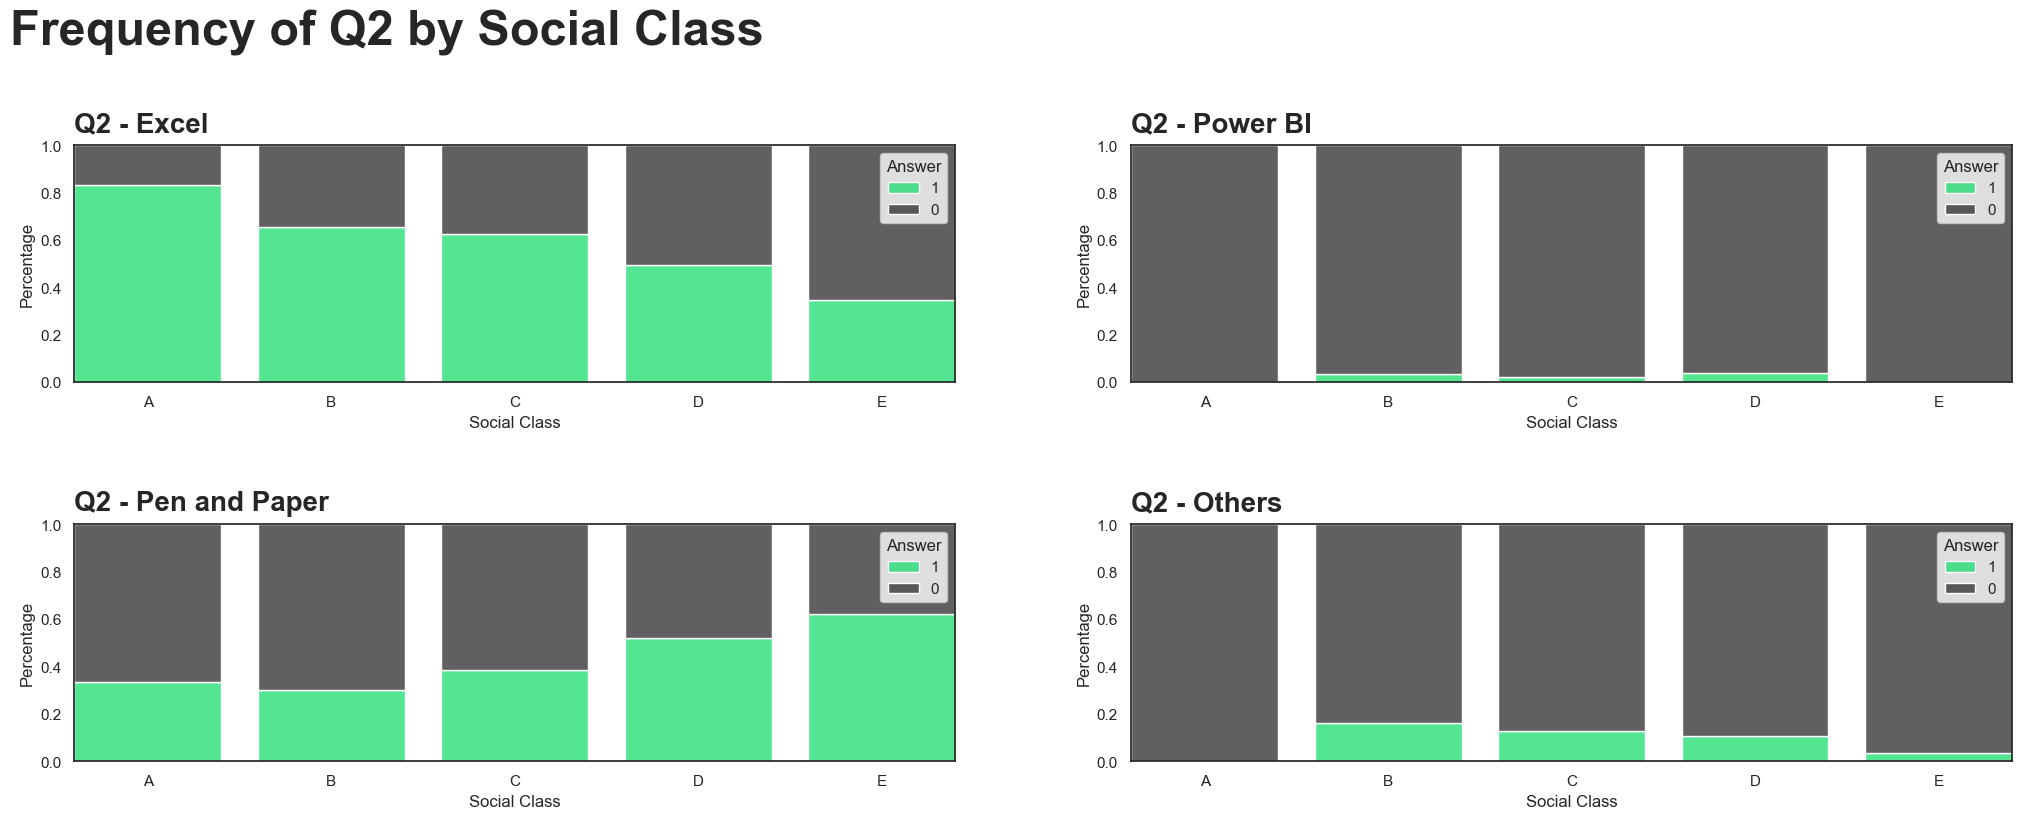

In [34]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Frequency of Q2 by Social Class', fontsize=35, fontweight='bold', x = 0.25, y = 1.05)
plt.subplots_adjust(hspace=0.6)

data_translated['Q12 - Social class'] = pd.Categorical(data_translated['Q12 - Social class'], social_class_oder)

for n, col in enumerate(Q2_order):

    ax = plt.subplot(2, 2, 1 + n)
    sns.histplot(data = data_translated, 
                    x = 'Q12 - Social class', 
                    hue = col,
                    palette = palette_yes_no,
                    stat="probability", multiple="fill", shrink=.8 )
                    
    plt.title(f'{col}', fontdict = {'fontsize' : 20, 'fontweight' : "bold"}, loc = 'left', pad = 10)  
    plt.ylabel('Percentage', fontsize = 12) 
    plt.xlabel('Social Class', fontsize = 12)
    plt.legend(title='Answer', loc='upper right', labels = ['1', '0'])

plt.show()

In [35]:
p_values = {}

for col in Q2_order:
    observed_frquency = pd.crosstab(data_translated[col], data_translated['Q12 - Social class'])
    # Calculating chi2 stats, pvlue, degrees of freedom and expected frequency
    statistic, p_value, dof, expected_freq = chi2_contingency(observed_frquency.values)

    # Appending to dictionary
    p_values[col] = p_value

df_p_values = pd.DataFrame.from_dict(p_values, orient='index', columns=['P-value'])
df_p_values.sort_values(by='P-value', ascending=True).style.background_gradient(cmap ='coolwarm')

#### **Q2 - By Age group**

**Age Group Insights**

- Age also significantly impacts people's choice of tools for income and expense management.
- Younger age groups prefer using digital tools, such as Excel, as they are more comfortable with technology and appreciate its efficiency.
- In contrast, older age groups prefer traditional methods like pen and paper, as they find it more straightforward and familiar.

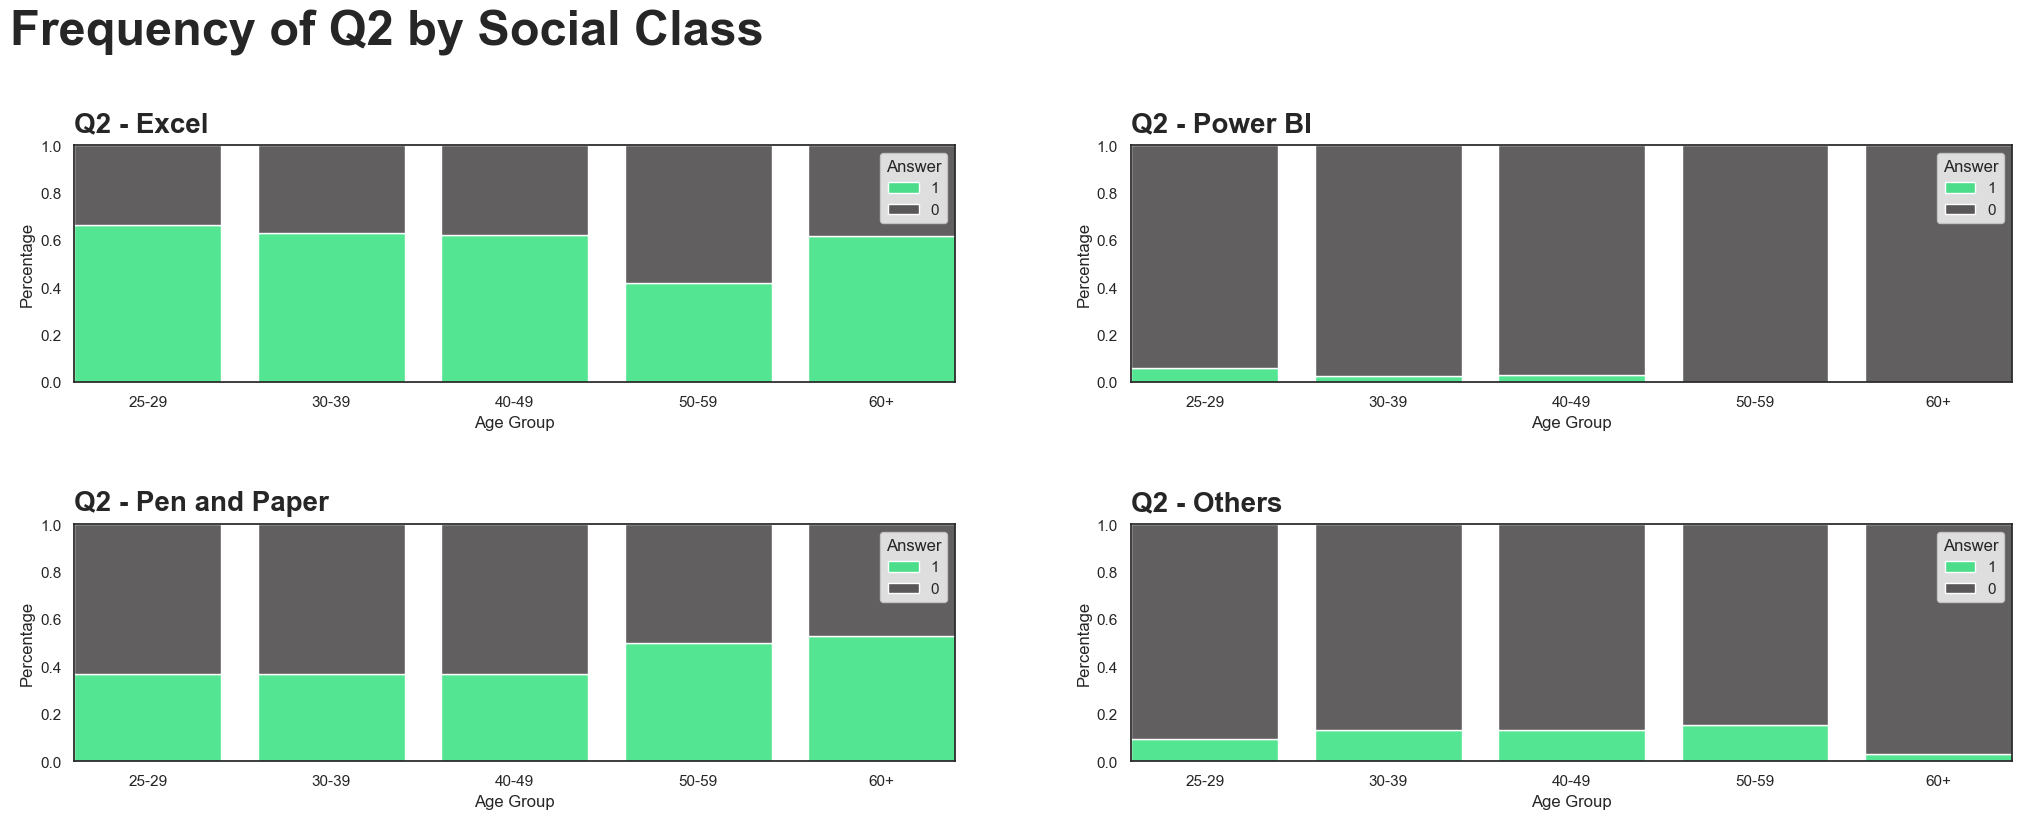

In [36]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Frequency of Q2 by Social Class', fontsize=35, fontweight='bold', x = 0.25, y = 1.05)
plt.subplots_adjust(hspace=0.6)

data_translated['Age group'] = pd.Categorical(data_translated['Age group'], age_group_order)

for n, col in enumerate(Q2_order):

    ax = plt.subplot(2, 2, 1 + n)
    sns.histplot(data = data_translated, 
                    x = 'Age group', 
                    hue = col,
                    palette = palette_yes_no,
                    stat="probability", multiple="fill", shrink=.8 )
                    
    plt.title(f'{col}', fontdict = {'fontsize' : 20, 'fontweight' : "bold"}, loc = 'left', pad = 10)  
    plt.ylabel('Percentage', fontsize = 12) 
    plt.xlabel('Age Group', fontsize = 12)
    plt.legend(title='Answer', loc='upper right', labels = ['1', '0'])

plt.show()

In [37]:
p_values = {}

for col in Q2_order:
    observed_frquency = pd.crosstab(data_translated[col], data_translated['Q12 - Social class'])
    # Calculating chi2 stats, pvlue, degrees of freedom and expected frequency
    statistic, p_value, dof, expected_freq = chi2_contingency(observed_frquency.values)

    # Appending to dictionary
    p_values[col] = p_value

df_p_values = pd.DataFrame.from_dict(p_values, orient='index', columns=['P-value'])
df_p_values.sort_values(by='P-value', ascending=True).style.background_gradient(cmap ='coolwarm')

### **Correlation Q1, Q2 and demographics variables**

Q1 and Q2 regarding Amount willing to pay, gender, age group and social class

In [38]:
corr = data_encoded[[
    'Q1 - Register income and expenses only',
    'Q1 - I plan how much I intend to spend and receive during the year',
    'Q1 - I analyze how much I intend to spend and receive during the year',
    'Q1 - I study to identify and eliminate',
    'Q1 - I look for ways to optimize taxation',
    'Q1 - I manage my investment portfolio',
    'Q1 - I plan for the succession of my assets',
    'Q1 - I don\'t do any of this and I don\'t think I need to',
    'Q1 - I don\'t do any of this, but I understand that I should',
    'Q2 - Excel', 'Q2 - Power BI', 'Q2 - Pen and Paper', 'Q2 - Others',
    'Q6 - Value willing to pay for a financial planning' ,'Q9 - Male?',
    'Q12 - Social class', 'Age group'
]].corr()

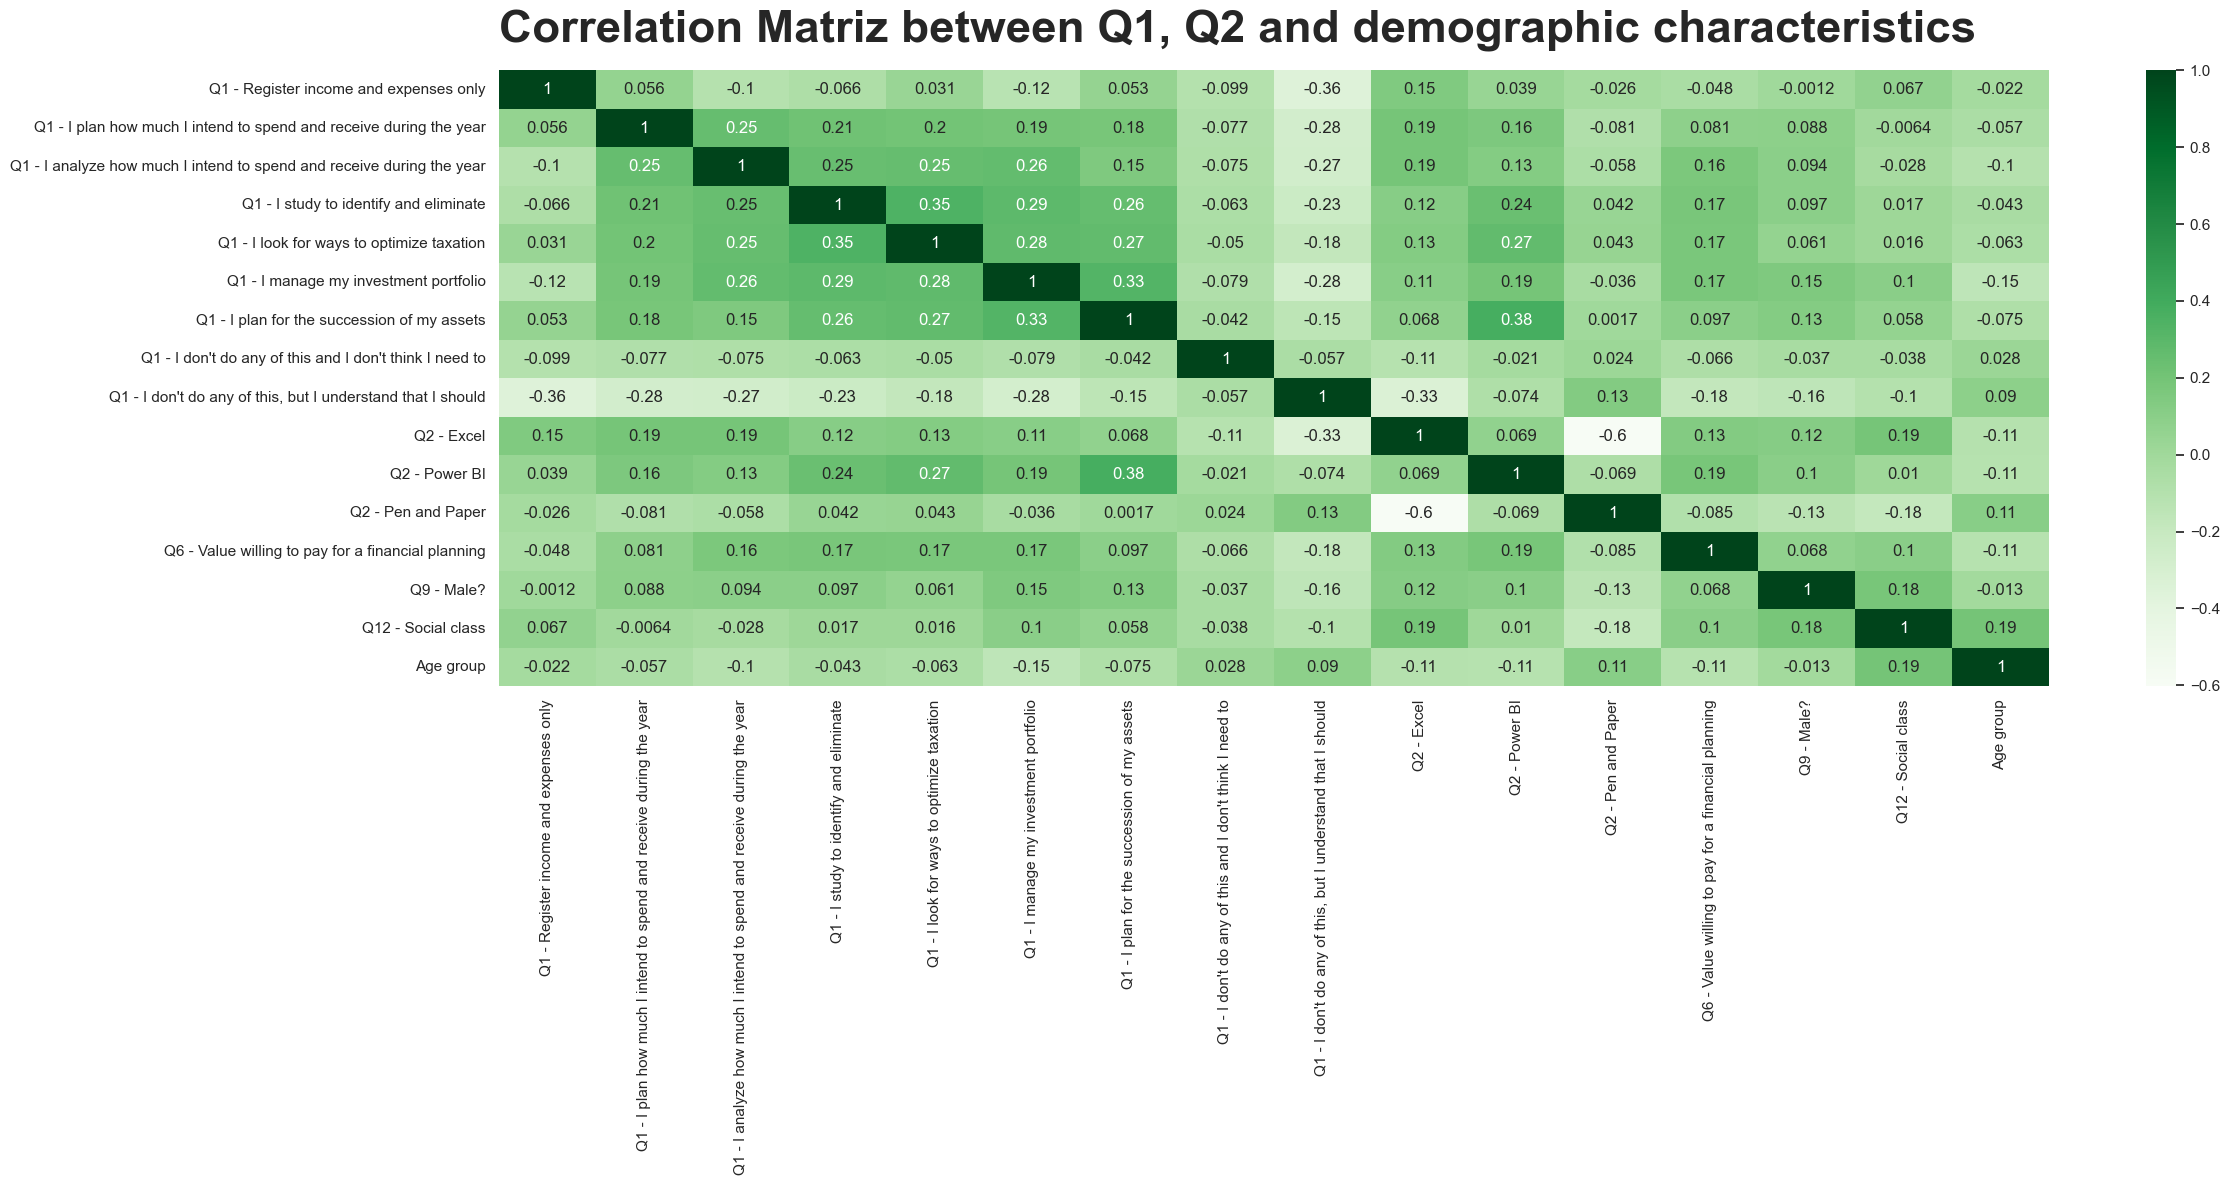

In [39]:
sns.heatmap(corr,annot=True, cmap="Greens")
plt.title('Correlation Matriz between Q1, Q2 and demographic characteristics', size = 33, fontweight = 'bold', loc = 'left', pad = 20)

plt.show()

## **Understanding what would make respondents contract an personal financial planning service (Question 3)**

*Question 3: What reason would lead you to hire a personal financial planning service Mark ​​up to four options*

| Options                                                 |
| -------------------------------------------------------- |
| I can't save.                                      |
| I worry about risks                                |
| I want to start investing                          |
| I do invest, but without a strategy                |
| I think I could be paying less taxes               |
| I don't know how much I need to save for my retirement. |
| I don't know how to plan for succession            |
| I am not interested in personal financial planning services |

This analysis aims to identify respondents' pain points and motivations when considering the possibility of hiring a personal financial planning service. By understanding these factors, we can gain valuable insights into the potential demand for such services and the specific areas where respondents seek professional financial guidance.

Creating list a list with the columns names to generate the plots for each questions

In [40]:
Q3_order = [
    'Q3 - I can\'t save.',
    'Q3 - I worry about risks',
    'Q3 - I want to start investing',
    'Q3 - I do invest, but without a strategy',
    'Q3 - I think I could be paying less taxes',
    'Q3 - I don\'t know how much I need to save for my retirement.',
    'Q3 - I don\'t know how to plan for succession',
    'Q3 - I am not interested in personal financial planning services'
]

### **Analyzing Q3 answers**

#### **Q3 - General**

**General Insights**

Our data provides some interesting insights into the people's pain points

- The top three pain points across all respondents were intermediate topics: "I worry about risks," "I want to start investing," and "I do invest but without a strategy," with approximately 130 positive responses each.
- More advanced topics such as "I think I could be paying less taxes," "I don't know how much I need to save for my retirement," and "I don't know how to plan for succession" received fewer positive responses, around 60 each.
- Only 40 respondents (10%) stated that they are not interested in financial planning services, while 170 (43%) mentioned having at least one pain point.
- Further analysis is needed to understand the specific pain points for each demographic characteristic.

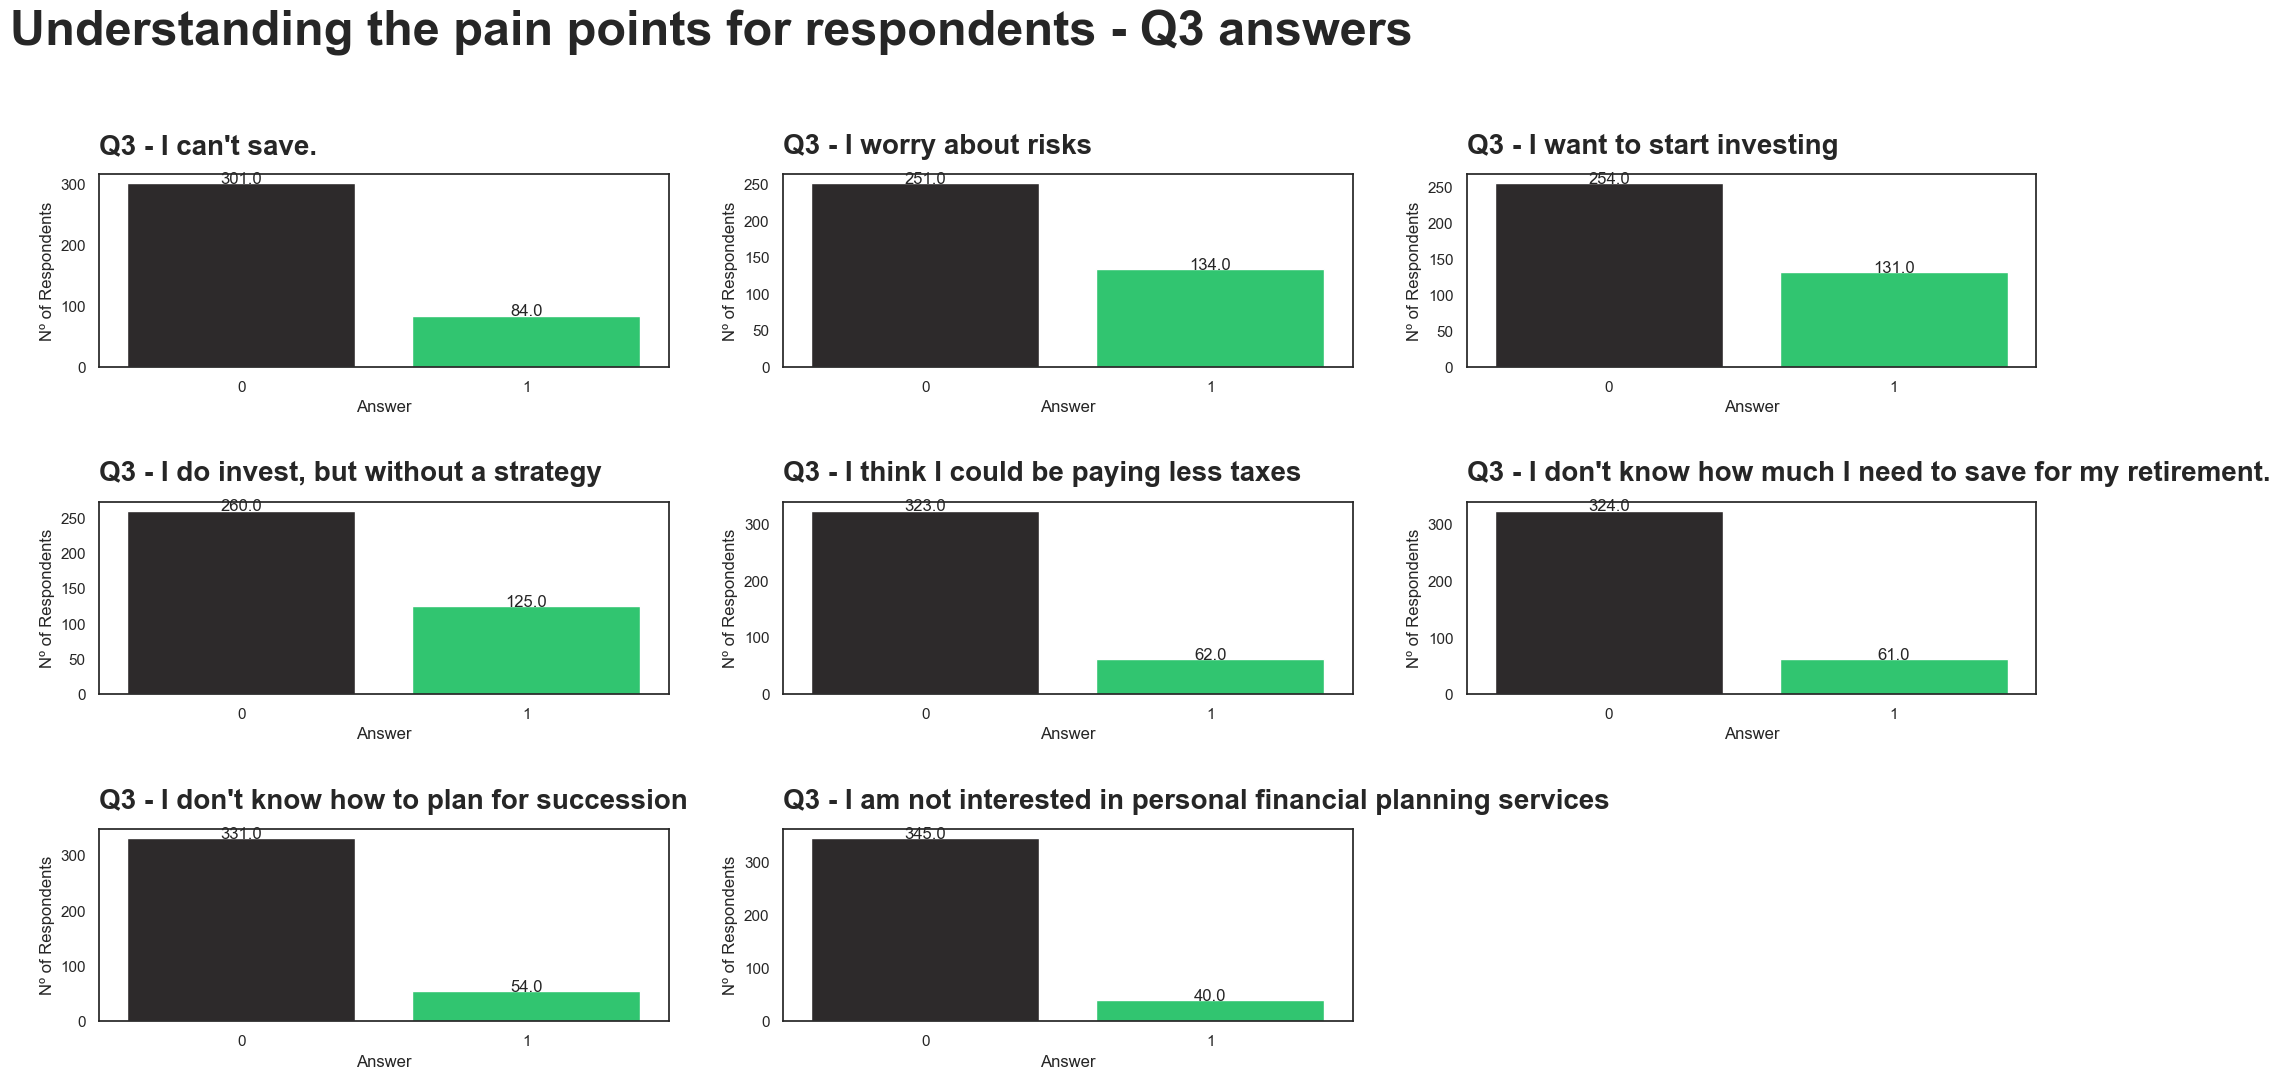

In [41]:
sns.set(rc = {'figure.figsize':(25,11)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Understanding the pain points for respondents - Q3 answers', fontsize=35, fontweight='bold', x = 0.37, y = 1.03)
plt.subplots_adjust(hspace=0.7)

for n, col in enumerate(Q3_order):

    ax = plt.subplot(3, 3,  1 + n)
    sns.countplot(data = data_translated, 
                    x = col,
                    palette = palette_yes_no,
                    ax = ax)
                    
    plt.title(f'{col}', fontdict = {'fontsize' : 20, 'fontweight' : "bold"}, loc = 'left', pad = 15)  
    plt.ylabel('Nº of Respondents', fontsize = 12) 
    plt.xlabel('Answer', fontsize = 12)

    # Adicionando rotúlo de data_translated do Nº de clientes
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
        height,
        '{:1}'.format((height)),
        ha='center',
        size = 12)

plt.show()

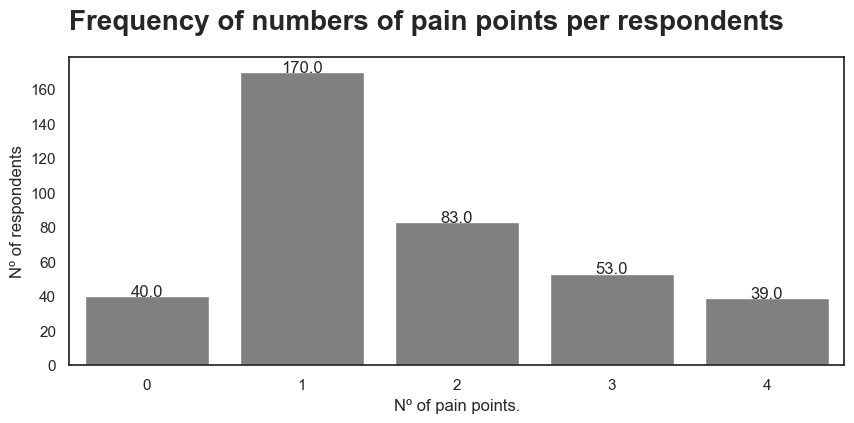

In [42]:
data_translated['Number of pain points'] = data_translated[Q3_order[:-1]].sum(axis=1)

sns.set(rc = {'figure.figsize':(10,4)})
sns.set_style("white")  # Set the plot background to white
ax = sns.countplot(data = data_translated, x = 'Number of pain points', color = 'grey')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height,
    '{:1}'.format((height)),
    ha='center',
    size = 12)

plt.title(f'Frequency of numbers of pain points per respondents', fontdict = {'fontsize' : 20, 'fontweight' : "bold"}, loc = 'left', pad = 20)  
plt.ylabel('Nº of respondents', fontsize = 12) 
plt.xlabel('Nº of pain points.', fontsize = 12)

plt.show()

#### **Q3 - By Gender**

**Gender Insights**

- Not being able to save is a more significant motivator for women than men, which could be due to various factors such as income disparities or different saving habits.
- Women mentioned more the desire to start investing motivates than men, possibly because more men already have investment portfolios. This aligns with the Q1 answers, where men stated managing their investment portfolios more frequently than women.
- In line with that, men indicated that investing without a strategy is a more significant motivation to contract a personal financial service.
- Among those who were not interested in financial planning services, on average, men are more disinterested than women.

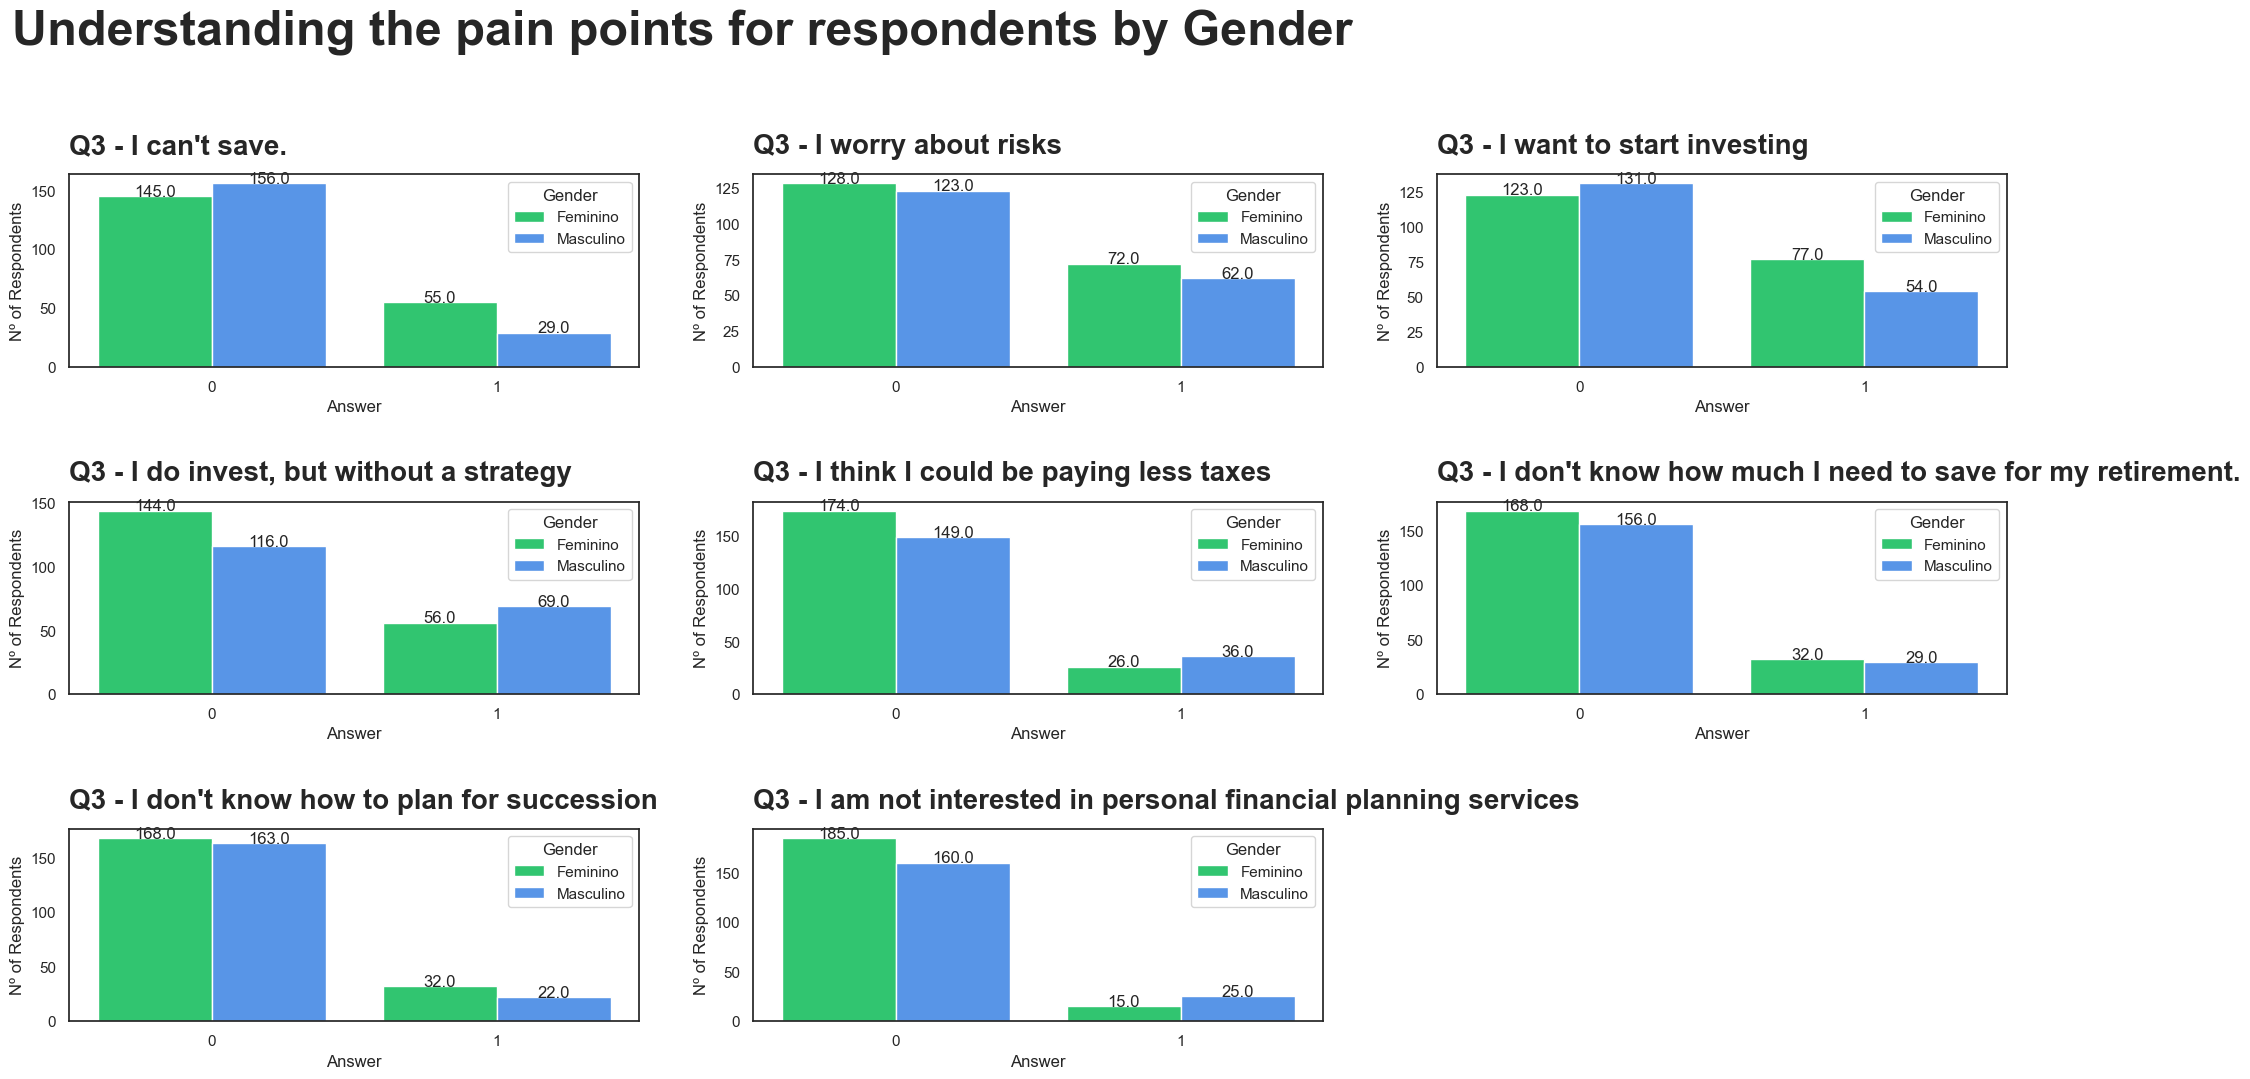

In [43]:
sns.set(rc = {'figure.figsize':(25,11)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Understanding the pain points for respondents by Gender', fontsize=35, fontweight='bold', x = 0.37, y = 1.03)
plt.subplots_adjust(hspace=0.7)

for n, col in enumerate(Q3_order):

    ax = plt.subplot(3, 3,  1 + n)
    sns.countplot(data = data_translated, 
                    x = col, 
                    hue = 'Q9 - Gender',
                    palette = palette_gender, 
                    ax = ax)
                    
    plt.title(f'{col}', fontdict = {'fontsize' : 20, 'fontweight' : "bold"}, loc = 'left', pad = 15)  
    plt.ylabel('Nº of Respondents', fontsize = 12) 
    plt.xlabel('Answer', fontsize = 12)
    plt.legend(title='Gender', loc='upper right')

    # Adicionando rotúlo de data_translated do Nº de clientes
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
        height,
        '{:1}'.format((height)),
        ha='center',
        size = 12)

plt.show()

Chi-square test

In [44]:
p_values = {}

for col in Q3_order:
    observed_frquency = pd.crosstab(data_translated[col], data_translated['Q9 - Gender'])
    # Calculating chi2 stats, pvlue, degrees of freedom and expected frequency
    statistic, p_value, dof, expected_freq = chi2_contingency(observed_frquency.values)

    # Appending to dictionary
    p_values[col] = p_value

df_p_values = pd.DataFrame.from_dict(p_values, orient='index', columns=['P-value'])
df_p_values.style.background_gradient(cmap ='coolwarm')

#### **Q3 - By Social Class**

**Social Class Insights**

- Not being able to save and worrying about risks appear to be problems across all social classes except class A.
- "I don't know how to plan for succession" and "I think I could be paying less taxes" were more significant pain points for class A, while other classes showed similar percentages.
- The higher the social class a higher percentage stated investing without an strategy, which makes sense since lower social classes have less investor, consequently a lower percentage of people that invest wihtout strategy (between investors and non-investors)

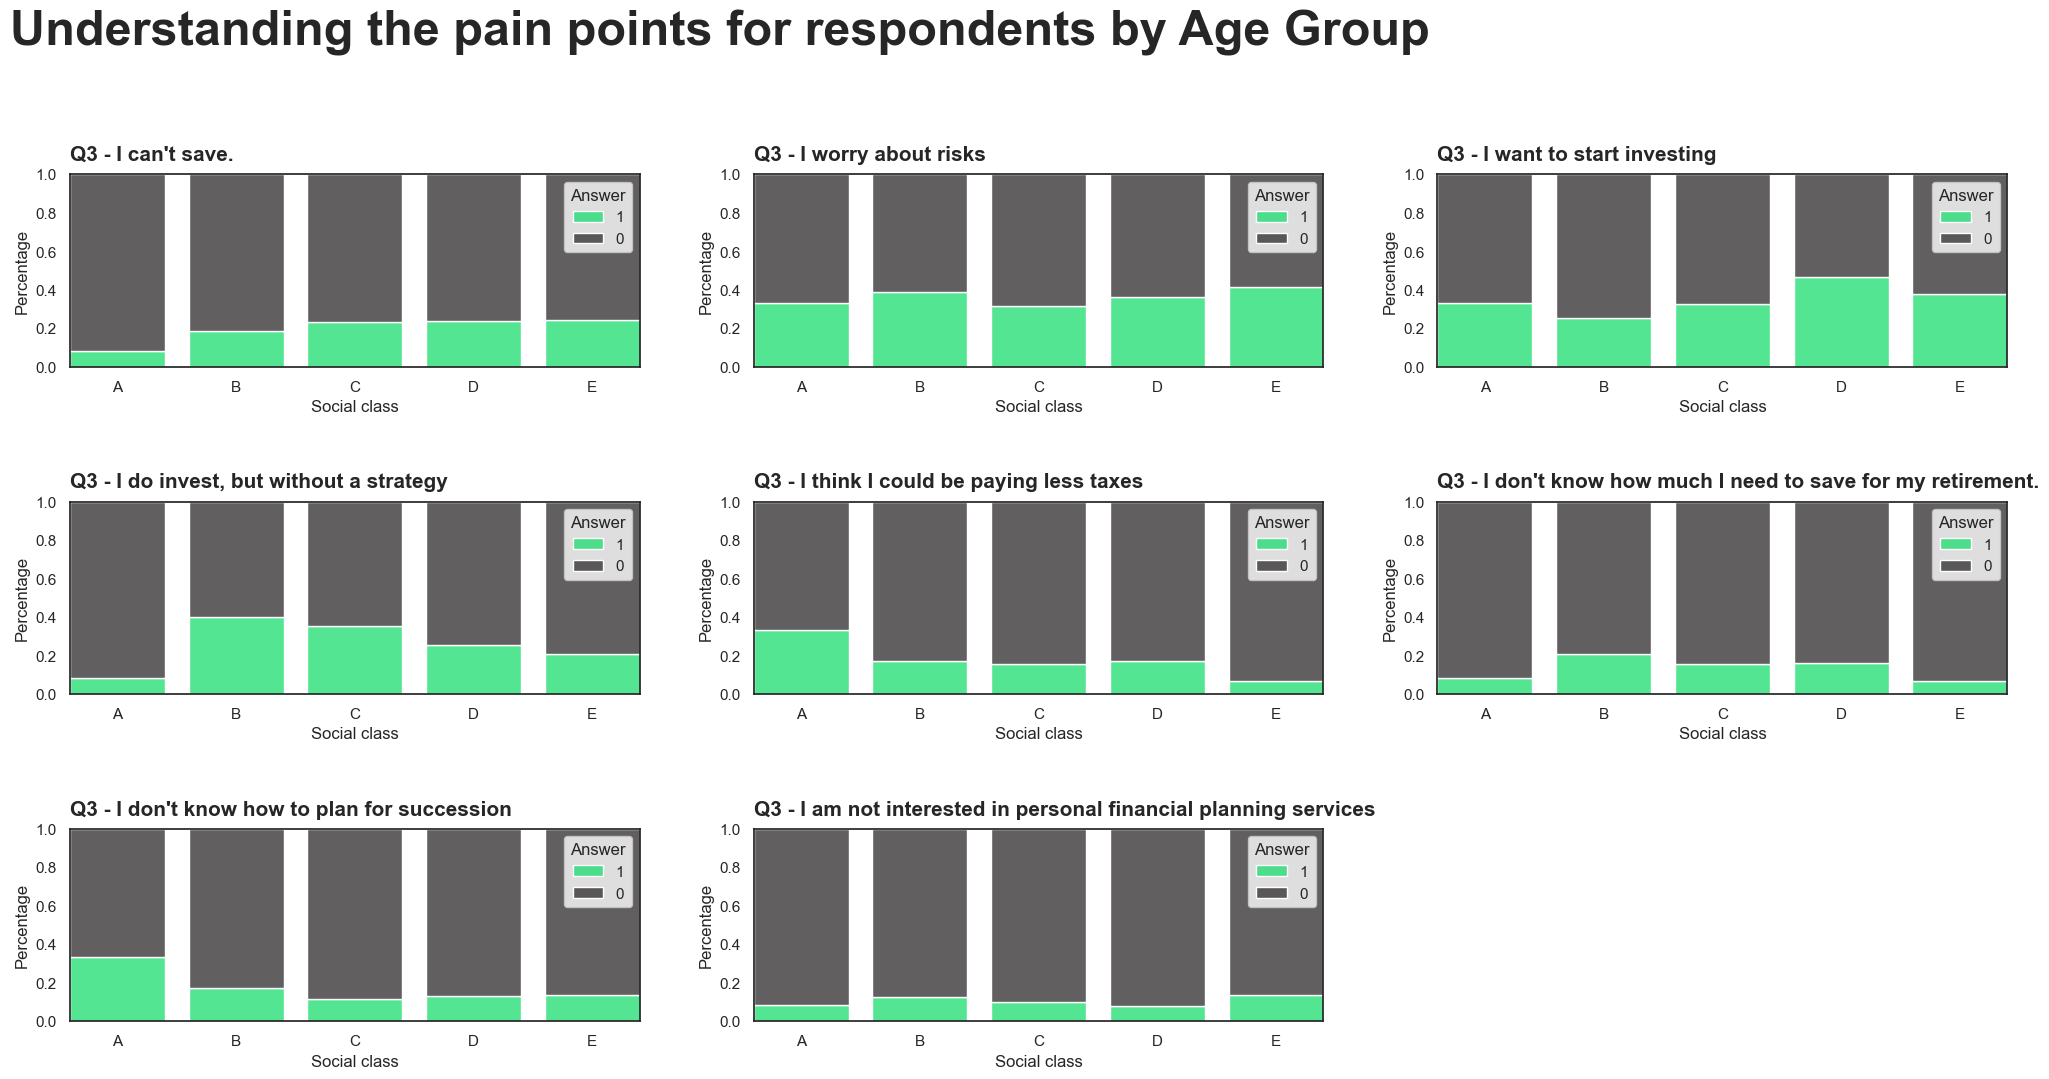

In [45]:
sns.set(rc = {'figure.figsize':(25,11)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Understanding the pain points for respondents by Age Group', fontsize=35, fontweight='bold', x = 0.385, y = 1.03)
plt.subplots_adjust(hspace=0.7)

data_translated['Q12 - Social class'] = pd.Categorical(data_translated['Q12 - Social class'], social_class_oder)

for n, col in enumerate(Q3_order):

    ax = plt.subplot(3, 3, 1 + n)
    sns.histplot(data = data_translated, 
                    x = 'Q12 - Social class', 
                    hue = col,
                    palette = palette_yes_no,
                    stat="probability", multiple="fill", shrink=.8, 
                    ax = ax)
                    
    plt.title(f'{col}', fontdict = {'fontsize' : 15, 'fontweight' : "bold"}, loc = 'left', pad = 10)  
    plt.ylabel('Percentage', fontsize = 12) 
    plt.xlabel('Social class', fontsize = 12)
    plt.legend(title='Answer', loc='upper right', labels = ['1', '0'])

plt.show()

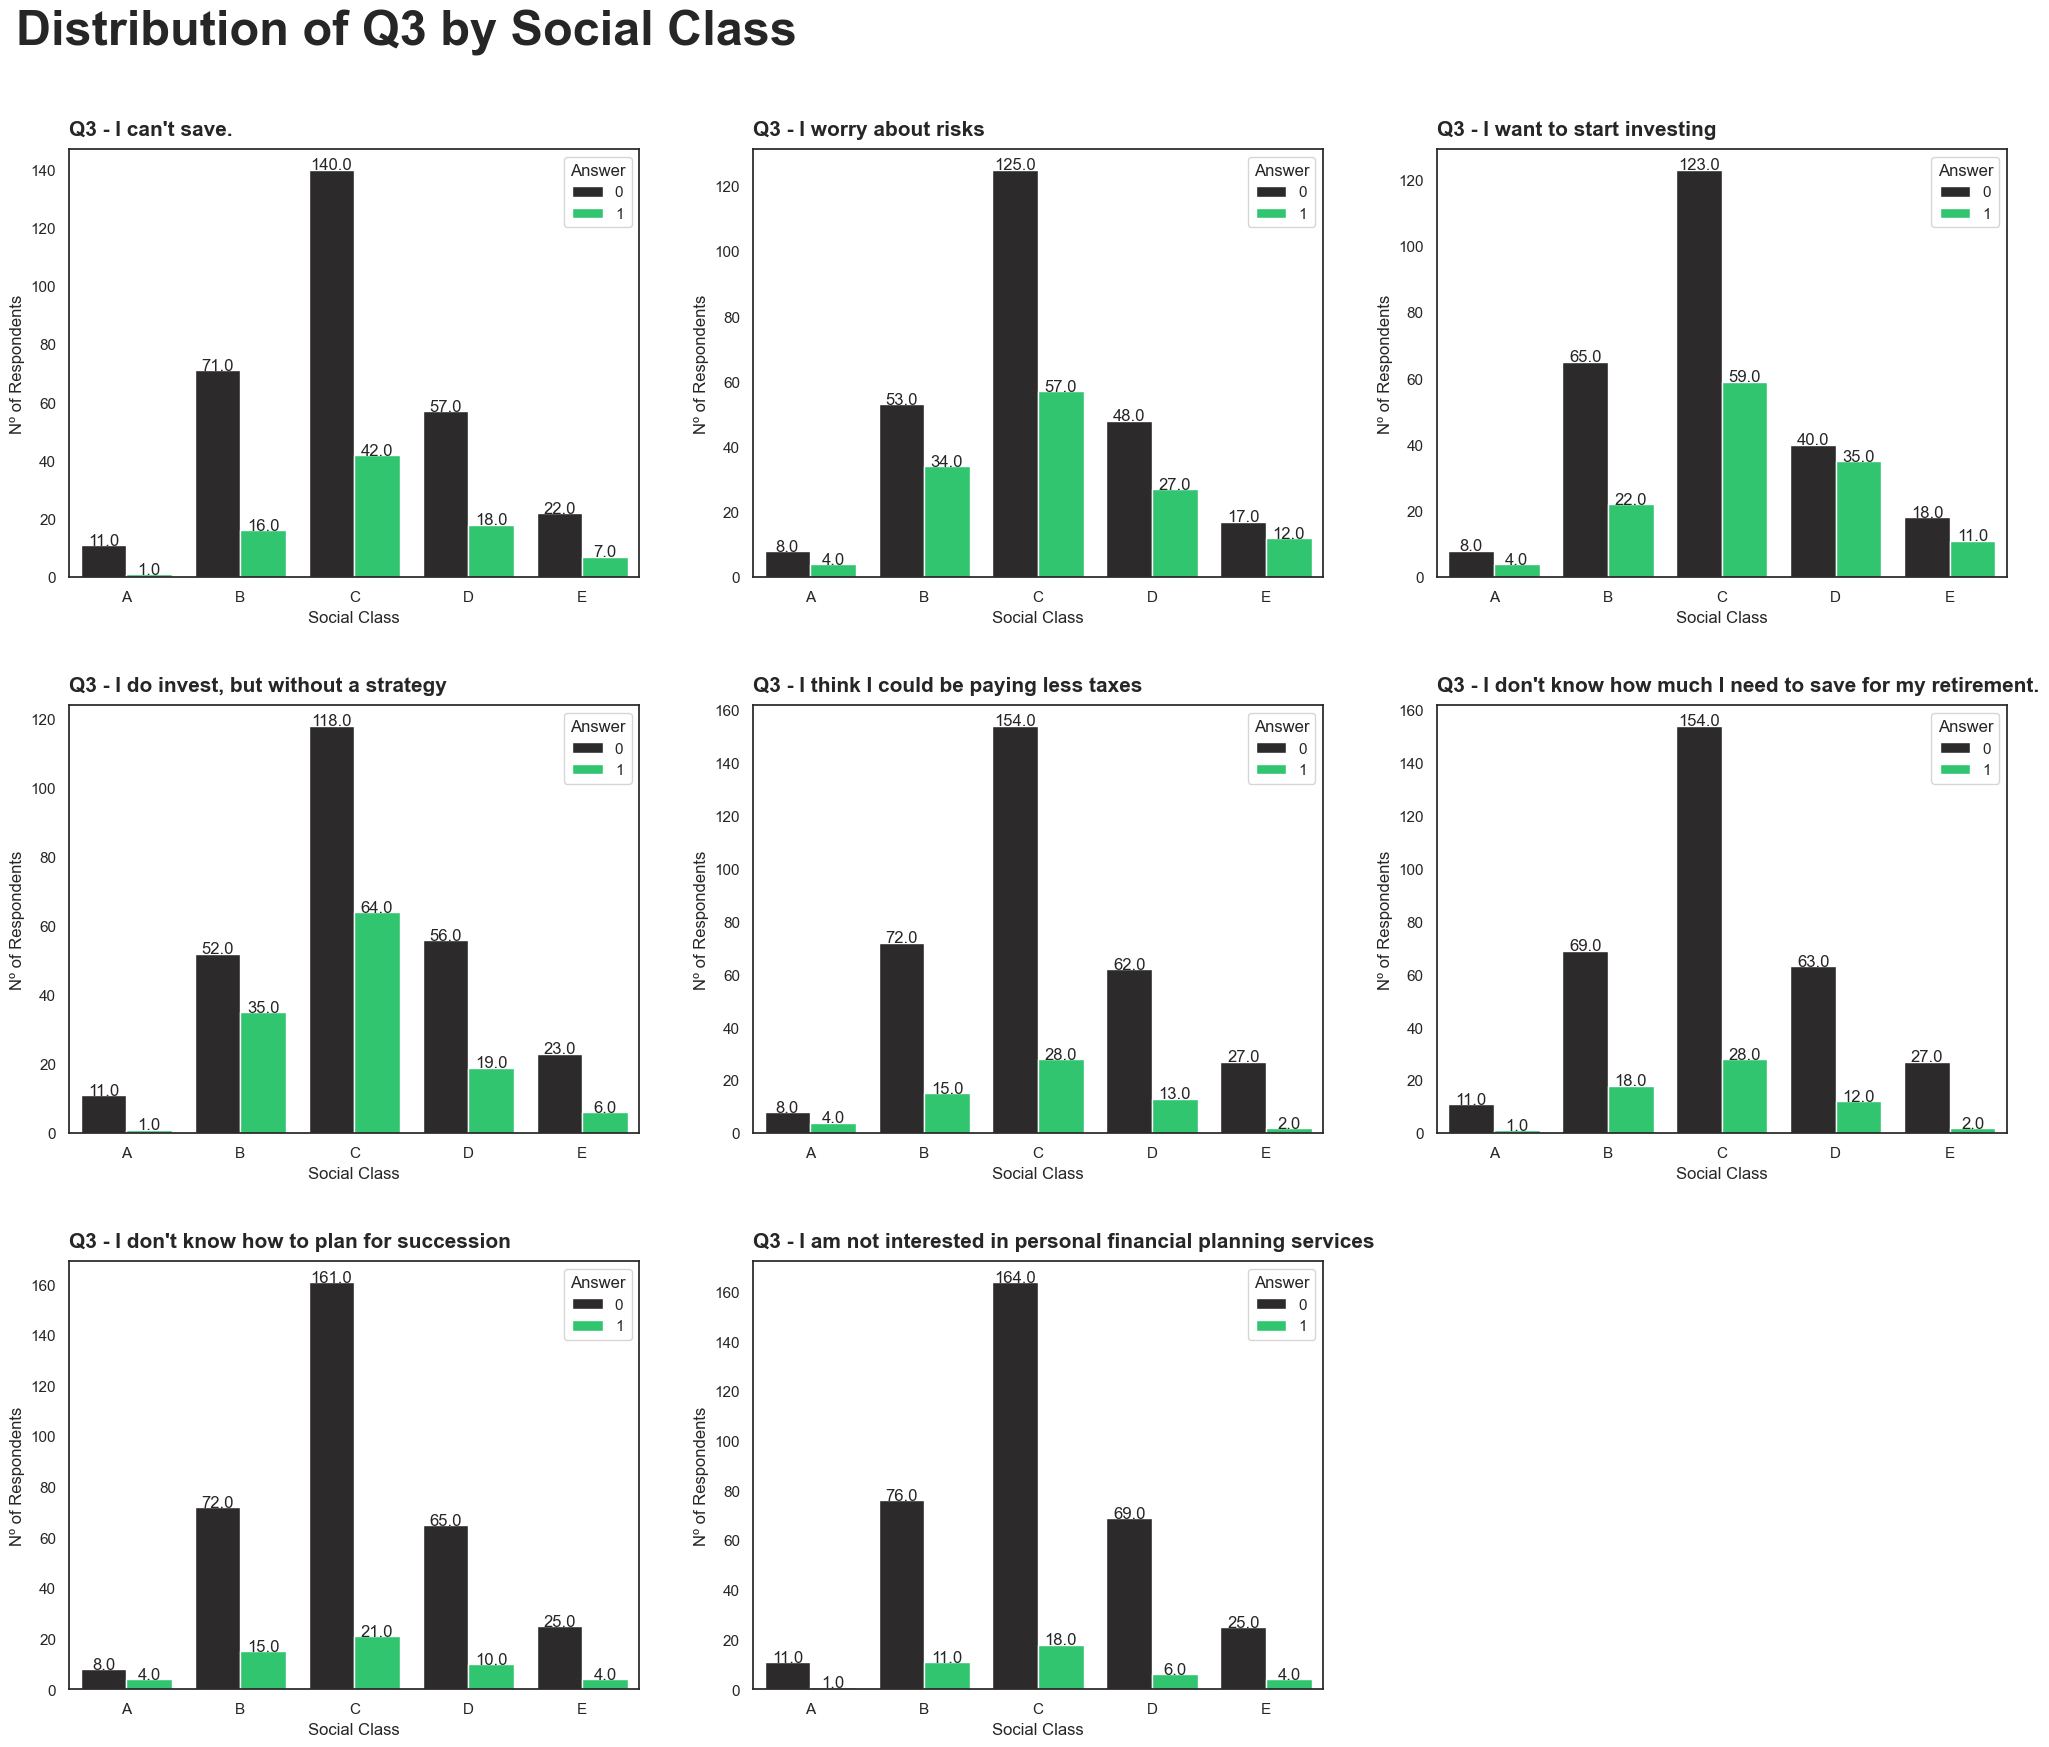

In [46]:
sns.set(rc = {'figure.figsize':(25,20)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Distribution of Q3 by Social Class', fontsize=35, fontweight='bold', x = 0.26, y =0.95)
plt.subplots_adjust(hspace=0.3)

for n, col in enumerate(Q3_order):
    ax = plt.subplot(3, 3, 1 + n)
    sns.countplot(data = data_translated, 
                    x = 'Q12 - Social class', 
                    hue = col,
                    palette = palette_yes_no,
                    order = social_class_oder, 
                    ax = ax)
                    
    plt.title(f'{col}', fontdict = {'fontsize' : 15, 'fontweight' : "bold"}, loc = 'left', pad = 10)  
    plt.ylabel('Nº of Respondents', fontsize = 12) 
    plt.xlabel('Social Class', fontsize = 12)
    plt.legend(title='Answer', loc='upper right', labels = [0, 1])

    # Adicionando rotúlo de data_translated do Nº de clientes
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
        height,
        '{:1}'.format((height)),
        ha='center',
        size = 12)

plt.show()

Chi-square test

In [47]:
p_values = {}

for col in Q3_order:
    observed_frquency = pd.crosstab(data_translated[col], data_translated['Q12 - Social class'])
    # Calculating chi2 stats, pvlue, degrees of freedom and expected frequency
    statistic, p_value, dof, expected_freq = chi2_contingency(observed_frquency.values)

    # Appending to dictionary
    p_values[col] = p_value

df_p_values = pd.DataFrame.from_dict(p_values, orient='index', columns=['P-value'])
df_p_values.style.background_gradient(cmap ='coolwarm')

#### **Q3 - By Age Group**

**Age Group Insights**

- Age groups were well-distributed among almost all variables, except for "I worry about risks," which showed a slightly higher prevalence among younger age groups. This suggests that younger respondents may be more concerned about potential risks compared to other age groups.

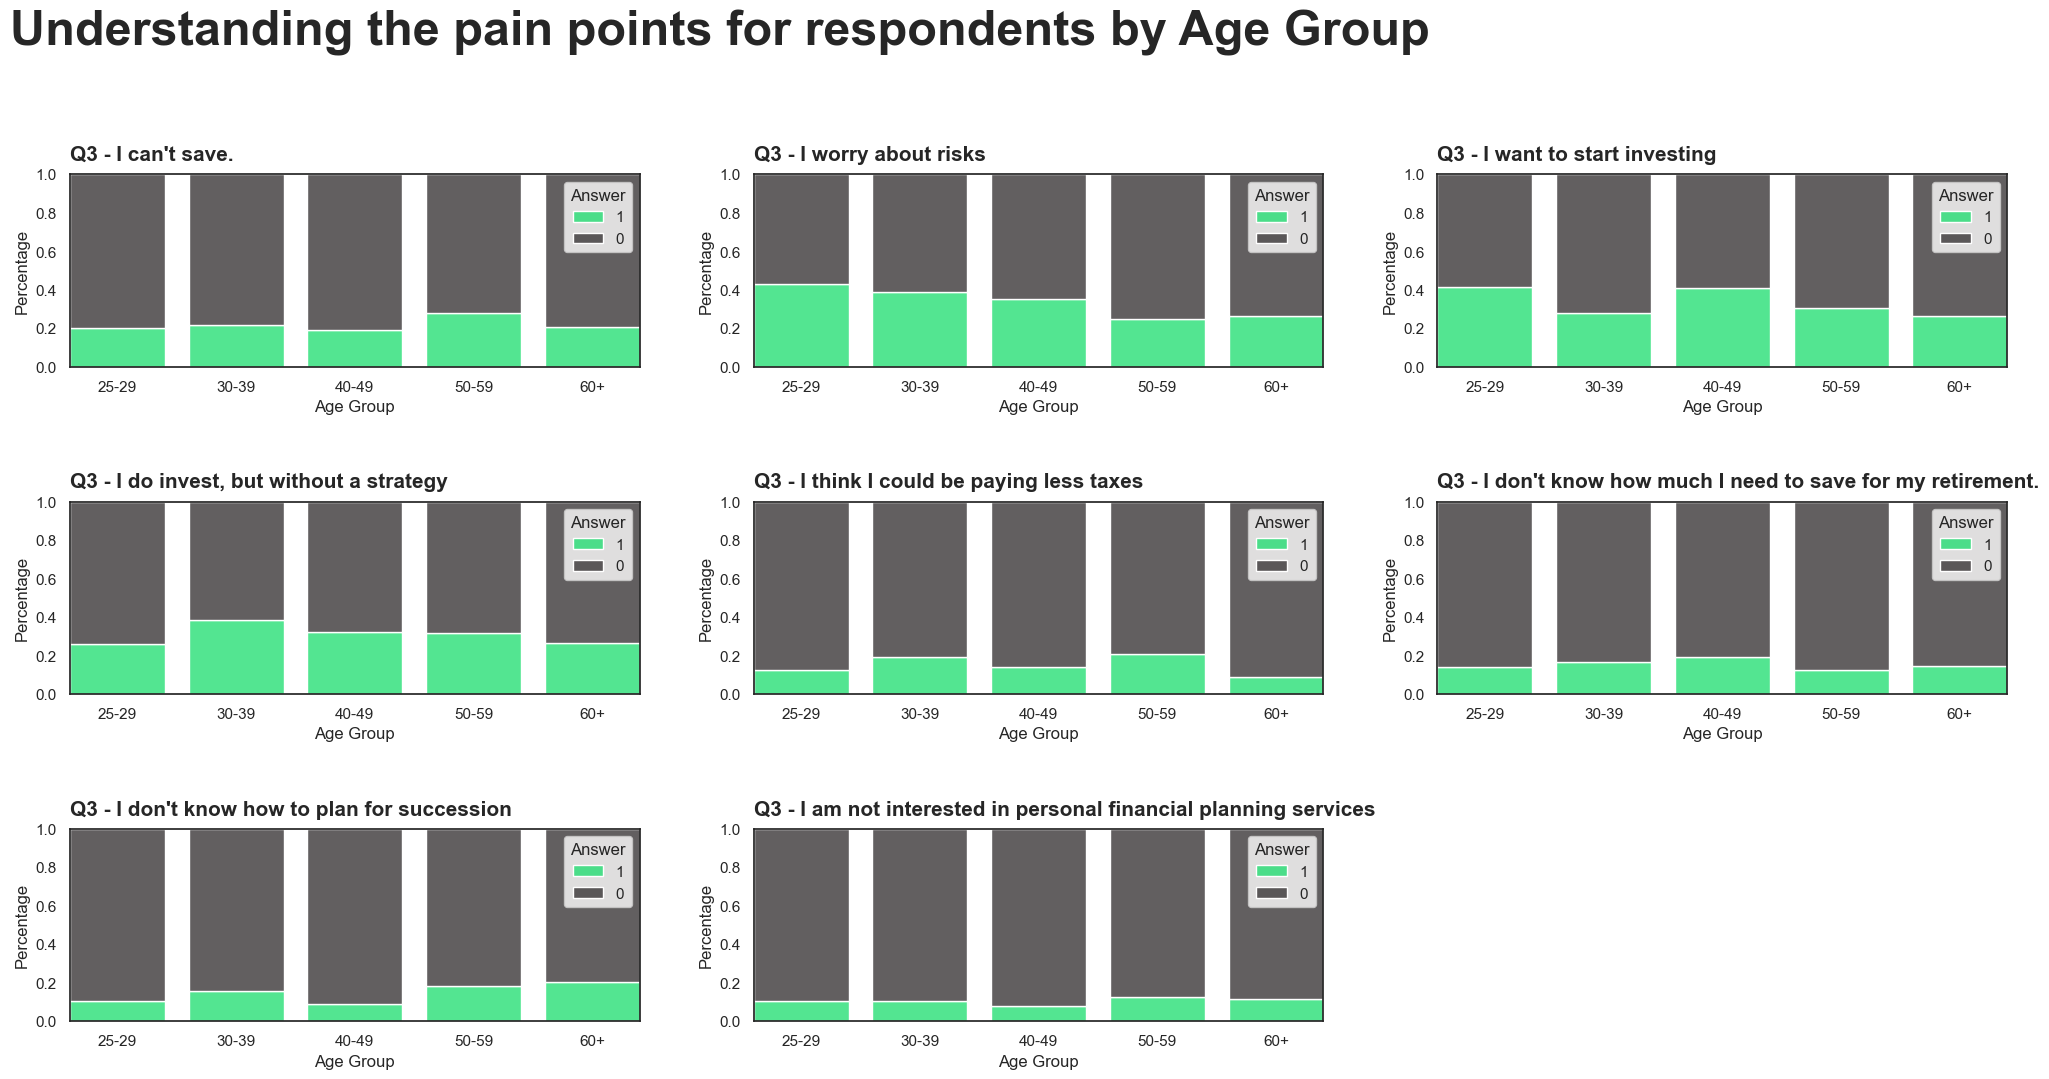

In [48]:
sns.set(rc = {'figure.figsize':(25,11)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Understanding the pain points for respondents by Age Group', fontsize=35, fontweight='bold', x = 0.385, y = 1.03)
plt.subplots_adjust(hspace=0.7)

data_translated['Age group'] = pd.Categorical(data_translated['Age group'], age_group_order)

for n, col in enumerate(Q3_order):

    ax = plt.subplot(3, 3, 1 + n)
    sns.histplot(data = data_translated, 
                    x = 'Age group', 
                    hue = col,
                    palette = palette_yes_no,
                    stat="probability", multiple="fill", shrink=.8, 
                    ax = ax)
                    
    plt.title(f'{col}', fontdict = {'fontsize' : 15, 'fontweight' : "bold"}, loc = 'left', pad = 10)  
    plt.ylabel('Percentage', fontsize = 12) 
    plt.xlabel('Age Group', fontsize = 12)
    plt.legend(title='Answer', loc='upper right', labels = ['1', '0'])

plt.show()

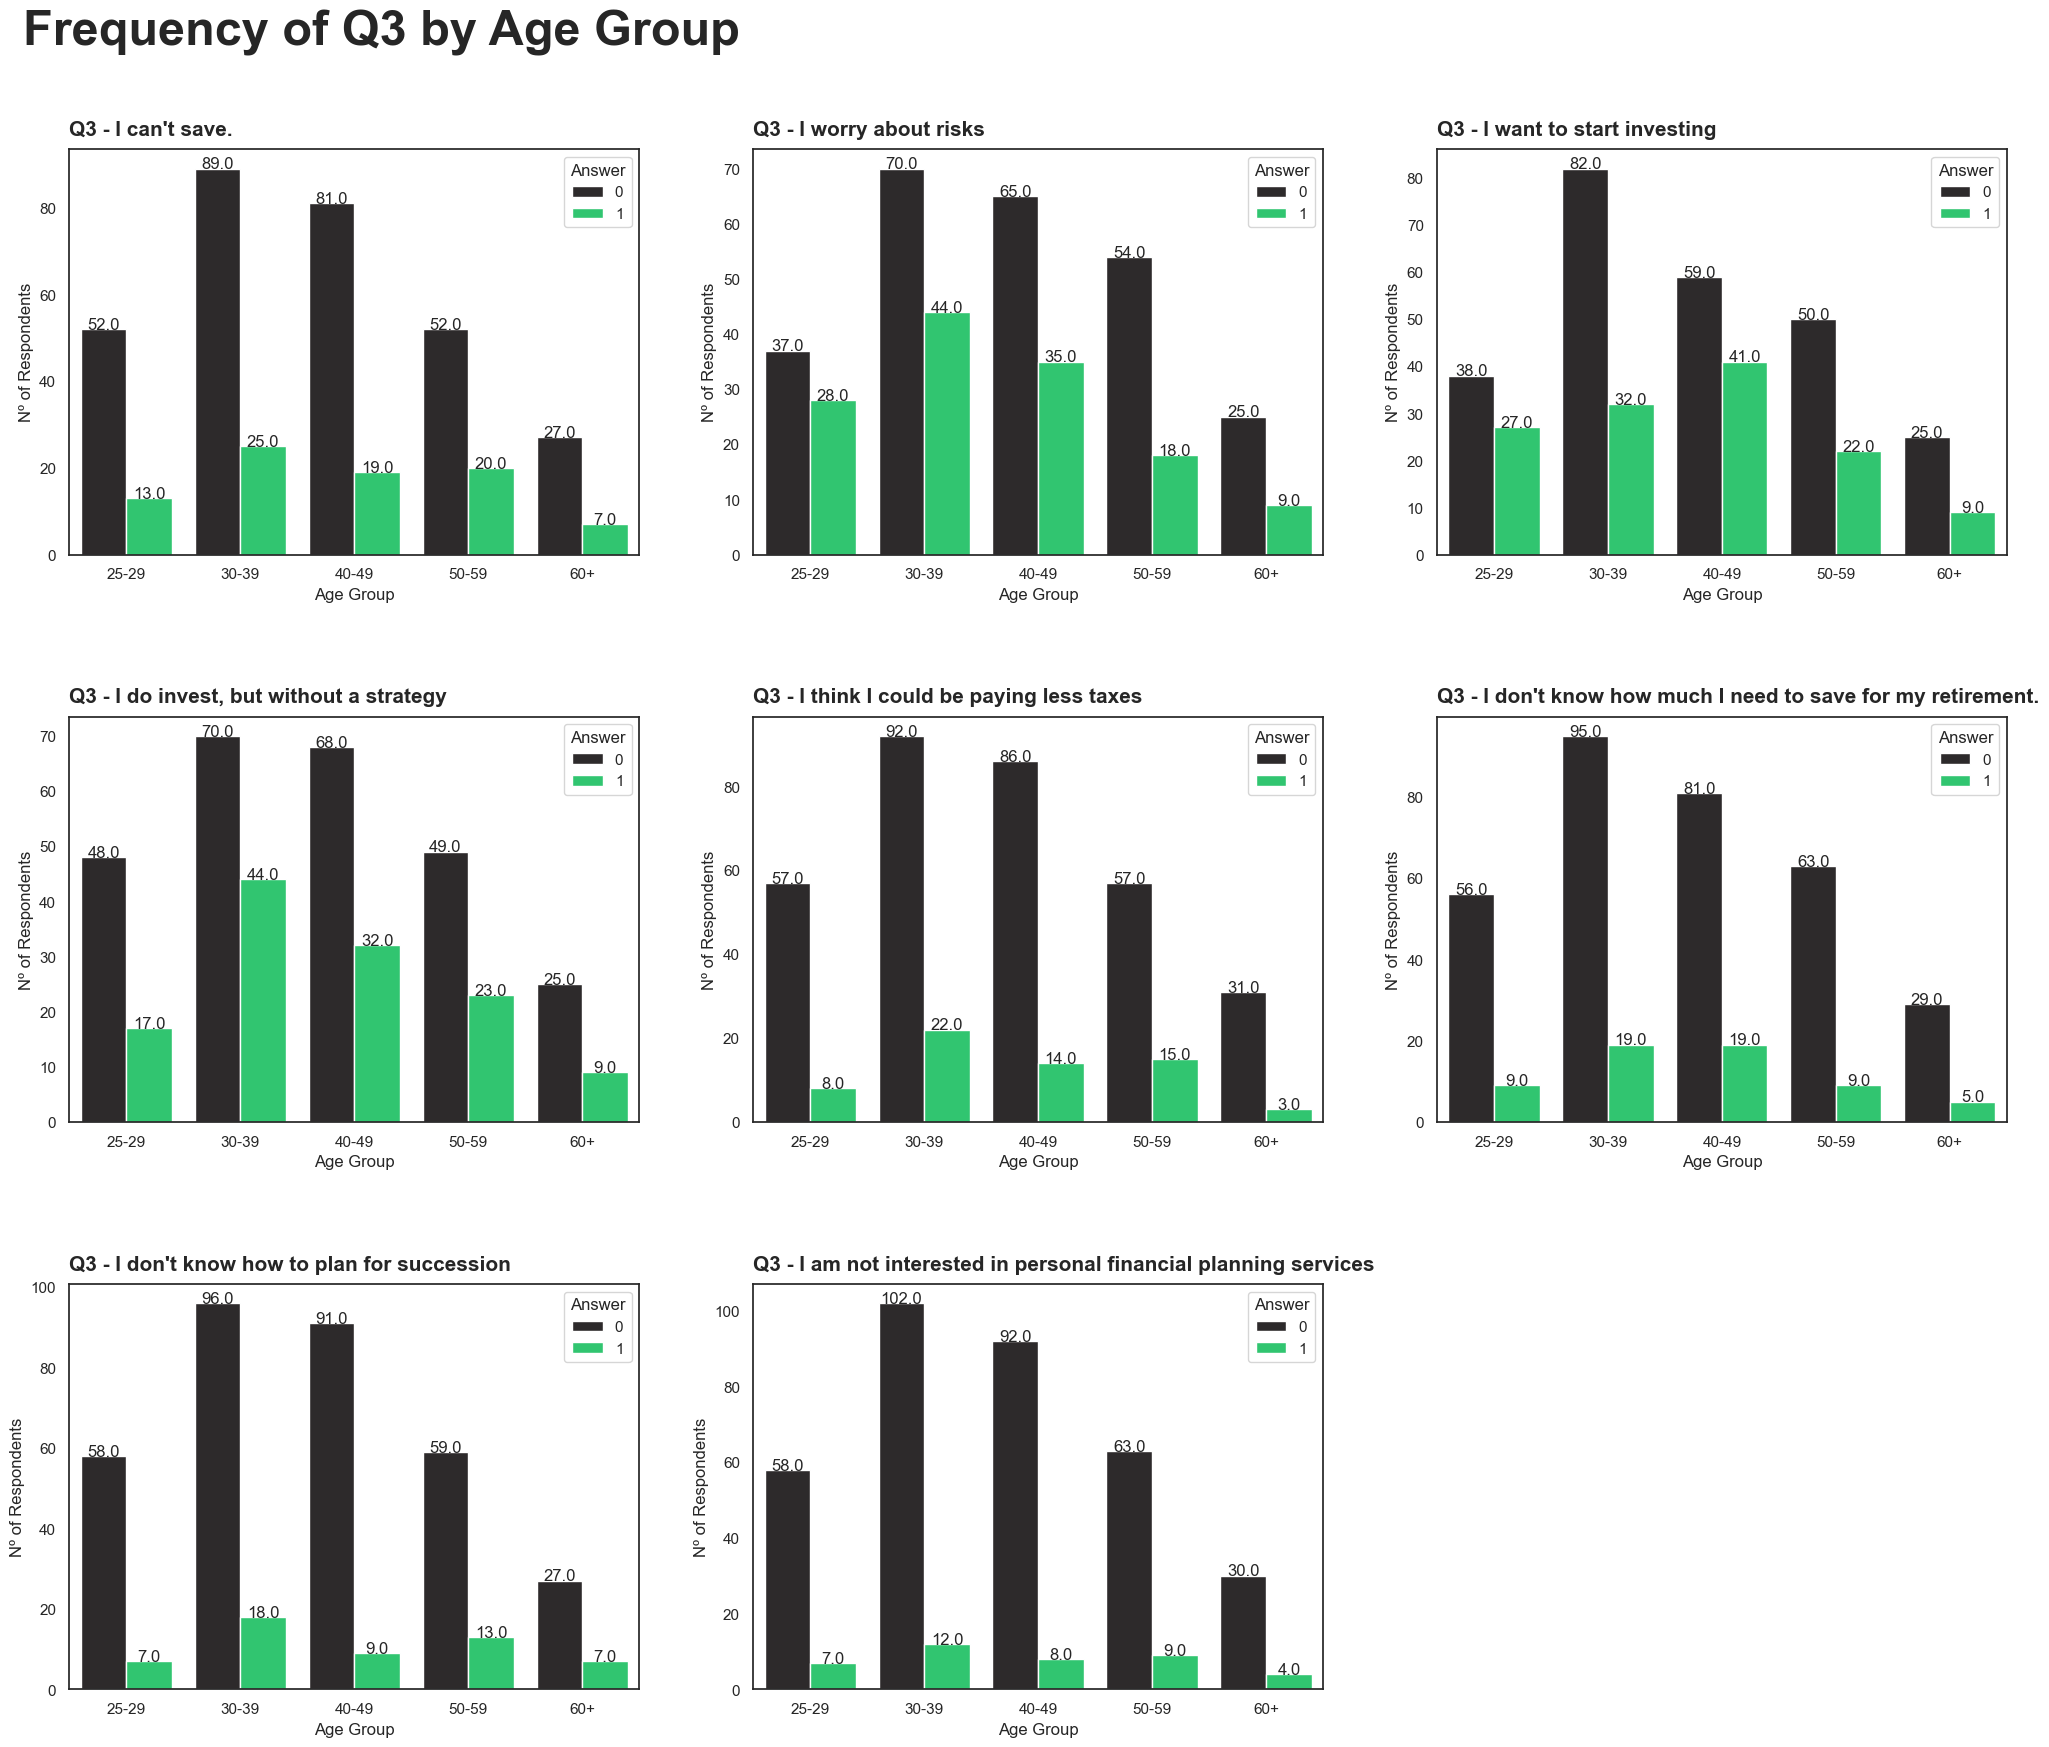

In [49]:
sns.set(rc = {'figure.figsize':(25,20)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Frequency of Q3 by Age Group', fontsize=35, fontweight='bold', x = 0.25, y =0.95)
plt.subplots_adjust(hspace=0.4)


for n, col in enumerate(Q3_order):
    ax = plt.subplot(3, 3, 1 + n)
    ax = sns.countplot(data = data_translated, 
                    x = 'Age group', 
                    hue = col,
                    palette = palette_yes_no,
                    order = age_group_order
                    )
                    
    plt.title(f'{col}', fontdict = {'fontsize' : 15, 'fontweight' : "bold"}, loc = 'left', pad = 10) 
    plt.ylabel('Nº of Respondents', fontsize = 12) 
    plt.xlabel('Age Group', fontsize = 12)
    plt.legend(title='Answer', loc='upper right', labels = ['0', '1'])

    # Adicionando rotúlo de data_translated do Nº de clientes
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
        height,
        '{:1}'.format((height)),
        ha='center',
        size = 12)

plt.show()

Chi-square test

In [50]:
p_values = {}

for col in Q3_order:
    observed_frquency = pd.crosstab(data_translated[col], data_translated['Age group'])
    # Calculating chi2 stats, pvlue, degrees of freedom and expected frequency
    statistic, p_value, dof, expected_freq = chi2_contingency(observed_frquency.values)

    # Appending to dictionary
    p_values[col] = p_value

df_p_values = pd.DataFrame.from_dict(p_values, orient='index', columns=['P-value'])
df_p_values.style.background_gradient(cmap ='coolwarm')

## **Understanding what aspects respondents value when deciding to contract an Financial Plannnig (Question 4)**

*Question 4: Which of these aspects do you value most when deciding to hire a Financial Planning? Mark up to three options*

| Options                                                 |
| -------------------------------------------------------- |
| Price                                      |
| Quality                                |
| Company name in the market                          |
| Family recommendations                |
| Recommendations from experienced digital influencers on the subject               |
| Company philosophy (e.g., presents social issues, sustainable actions, among others) |
| Scope of the planning (what the planning offers)            |

This analysis aims to identify respondents' preferences and priorities when deciding to contract a Financial Planning service (Question 4). We explore the aspects they value the most, considering the given options such as price, quality, company reputation in the market, family recommendations, recommendations from experienced digital influencers, company philosophy, and the scope of the planning offered. By understanding what factors are essential to respondents, we as a financial service can tailor our offerings to better meet the specific needs and expectations of potential clients. Additionally, this analysis can shed light on any patterns or trends across different demographic groups, helping us gain insights into the key drivers influencing respondents' decisions regarding financial planning services.

### **Analysing Q4 Answers**

Creating list for the questions order

In [51]:
Q4_order = [
    'Q4 - Price',
    'Q4 - Quality',
    'Q4 - Company name in the market',
    'Q4 - Family recommendations',
    'Q4 - Recommendations from experienced digital influencers on the subject',
    'Q4 - Company philosophy (e.g., presents social issues, sustainable actions, among others)',
    'Q4 - Scope of the planning (what the planning offers)'
]

#### **Q4 - General**

**General Insights**
- Quality and price are the two most valued aspects, with 269 and 246 votes, respectively.
- The scope of the planning ranks third with 147 votes, indicating its importance in decision-making.
- Surprisingly, the company name in the market appears to be less valued compared to the top three aspects, despite being a critical factor in shaping a company's reputation.
- Other aspects, such as family recommendations, recommendations from experienced digital influencers, and company philosophy, do not seem to be highly valued by respondents.

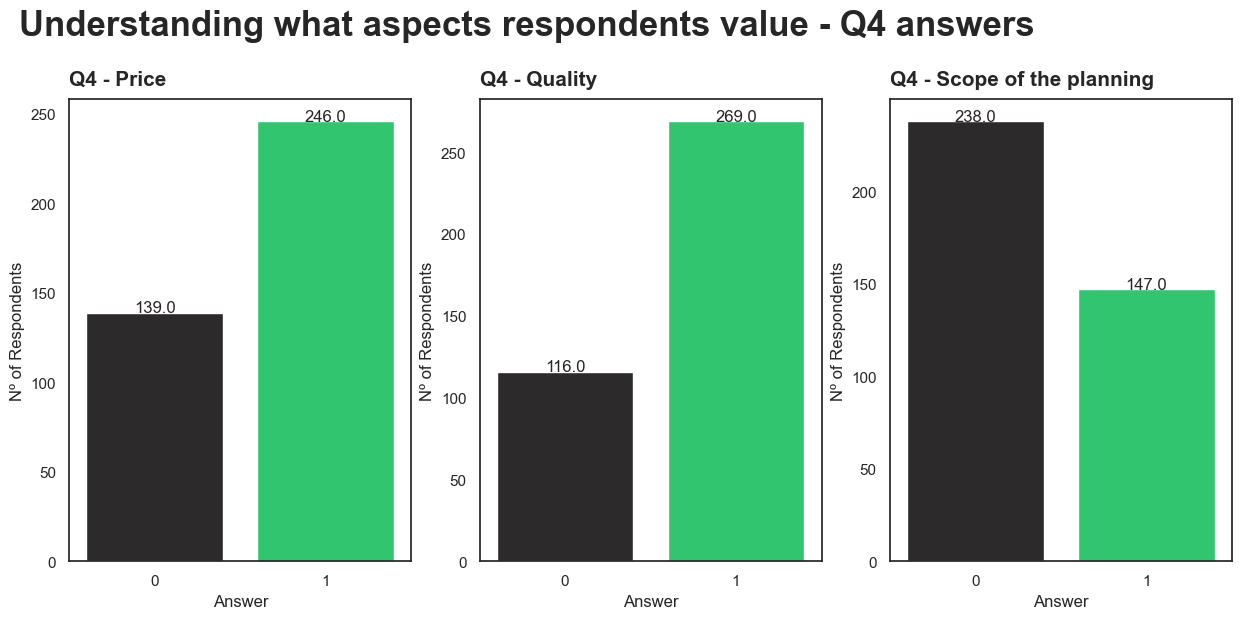

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(15,6)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Understanding what aspects respondents value - Q4 answers', fontsize=25, fontweight='bold', x=0.43, y=1.03)
plt.subplots_adjust(hspace=0.7)

plot_positions = {0:1, 1:2, len(Q4_order)-1:3}  # Maps the desired indices to subplot positions

for n, col in enumerate(Q4_order):
    if n not in plot_positions:
        continue

    ax = plt.subplot(1, 3, plot_positions[n])  # Use the predefined subplot positions
    sns.countplot(data=data_translated, 
                  x=col,
                  palette=palette_yes_no,
                  ax=ax)
                    
    truncated_title = (col[:26] + '') if len(col) > 26 else col
    plt.title(f'{truncated_title}', fontdict={'fontsize': 15, 'fontweight': "bold"}, loc='left', pad=10)
    plt.ylabel('Nº of Respondents', fontsize=12) 
    plt.xlabel('Answer', fontsize=12)

    # Adding data labels
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1}'.format(height),
                ha='center',
                size=12)

plt.show()


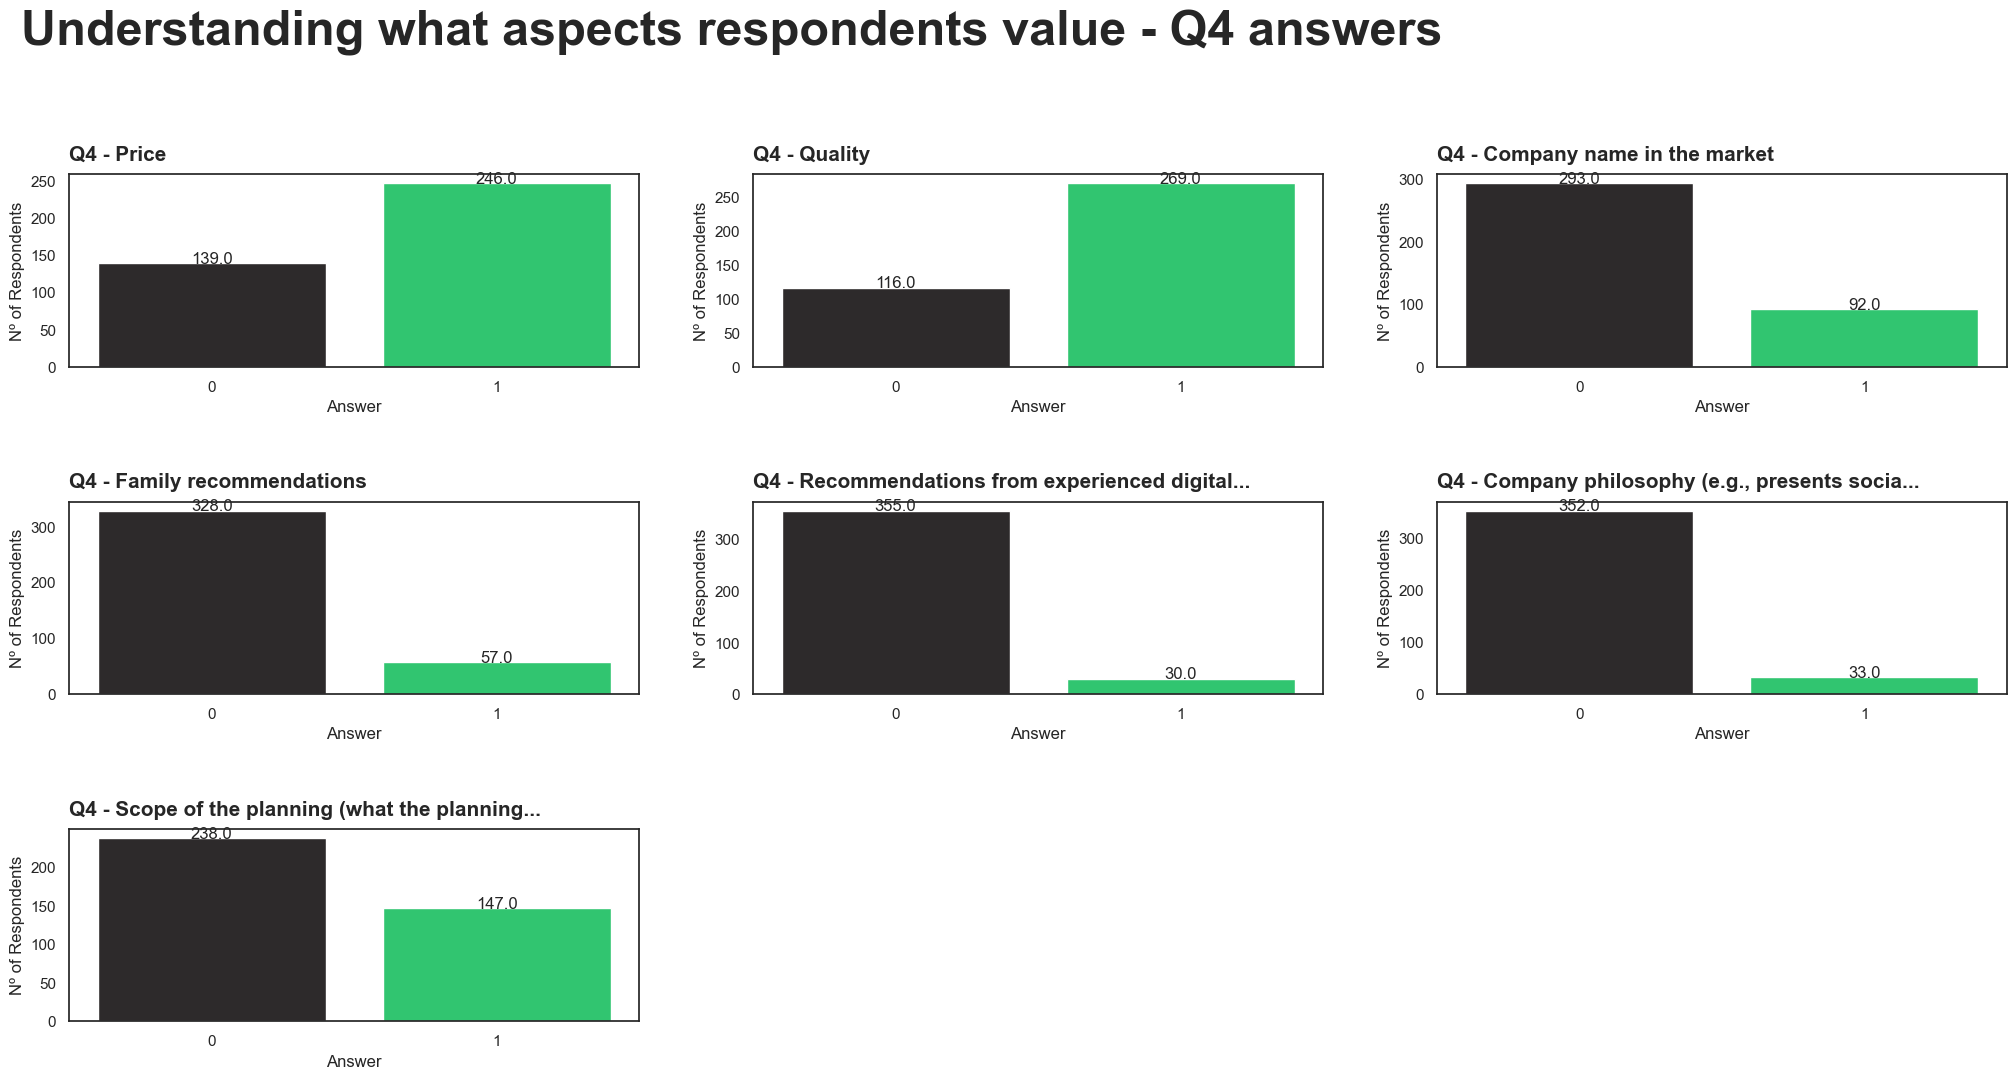

In [52]:
sns.set(rc = {'figure.figsize':(25,11)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Understanding what aspects respondents value - Q4 answers', fontsize=35, fontweight='bold', x = 0.39, y = 1.03)
plt.subplots_adjust(hspace=0.7)

for n, col in enumerate(Q4_order):

    ax = plt.subplot(3, 3,  1 + n)
    sns.countplot(data = data_translated, 
                    x = col,
                    palette = palette_yes_no,
                    ax = ax)
                    
    truncated_title = (col[:45] + '...') if len(col) > 45 else col
    plt.title(f'{truncated_title}', fontdict={'fontsize': 15, 'fontweight': "bold"}, loc='left', pad=10)
    plt.ylabel('Nº of Respondents', fontsize = 12) 
    plt.xlabel('Answer', fontsize = 12)

    # Adicionando rotúlo de data_translated do Nº de clientes
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
        height,
        '{:1}'.format((height)),
        ha='center',
        size = 12)

plt.show()

In [53]:
Q4_order_top4 = [
    'Q4 - Price',
    'Q4 - Quality',
    'Q4 - Company name in the market',
    'Q4 - Scope of the planning (what the planning offers)'
]

#### **Q4 - By Gender**

**Gender Insights**

- The aspects valued by respondents do not appear to be significantly influenced by gender, suggesting that both men and women share similar priorities when seeking financial planning services.

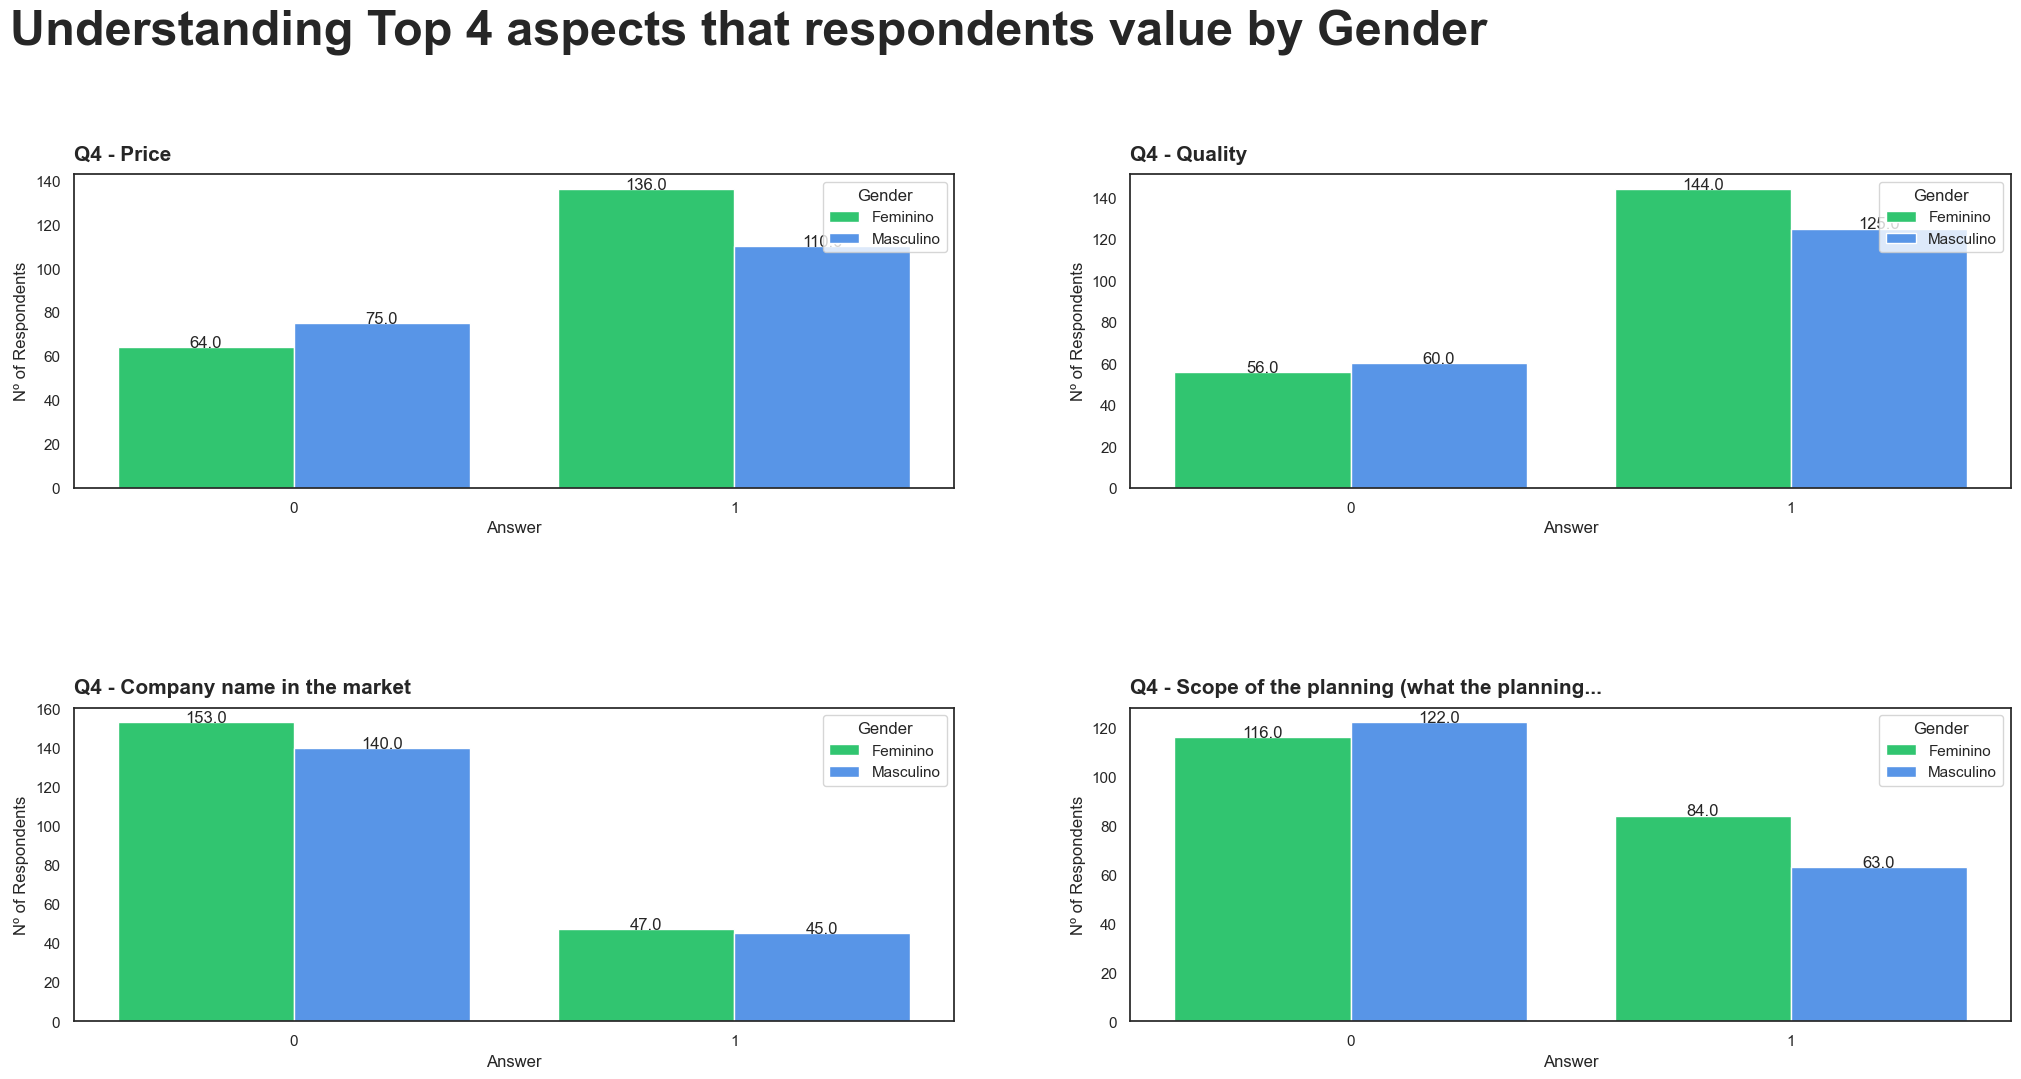

In [54]:
sns.set(rc = {'figure.figsize':(25,11)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Understanding Top 4 aspects that respondents value by Gender', fontsize=35, fontweight='bold', x = 0.395, y = 1.03)
plt.subplots_adjust(hspace=0.7)

for n, col in enumerate(Q4_order_top4):
    ax = plt.subplot(2, 2, 1 + n)
    sns.countplot(data=data_translated,
                  x=col,
                  hue='Q9 - Gender',
                  palette=palette_gender,
                  ax=ax)

    # Modify the title to limit to 15 characters and add '...' if necessary
    truncated_title = (col[:45] + '...') if len(col) > 45 else col
    plt.title(f'{truncated_title}', fontdict={'fontsize': 15, 'fontweight': "bold"}, loc='left', pad=10)
    plt.ylabel('Nº of Respondents', fontsize=12)
    plt.xlabel('Answer', fontsize=12)
    plt.legend(title='Gender', loc='upper right')

    # Adding data labels
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height,
                '{:1}'.format((height)),
                ha='center',
                size=12)

plt.show()

Chi-square test

In [55]:
p_values = {}

for col in Q4_order_top4:
    observed_frquency = pd.crosstab(data_translated[col], data_translated['Q9 - Gender'])
    # Calculating chi2 stats, pvlue, degrees of freedom and expected frequency
    statistic, p_value, dof, expected_freq = chi2_contingency(observed_frquency.values)

    # Appending to dictionary
    p_values[col] = p_value

df_p_values = pd.DataFrame.from_dict(p_values, orient='index', columns=['P-value'])
df_p_values.style.background_gradient(cmap ='coolwarm')

#### **Q4 - By Social Class**

**Social Class Insights**

- Respondents from social class "A" attribute lower importance to price and greater importance to the quality of the service. For the remaining classes, the distribution of preferences is relatively similar.

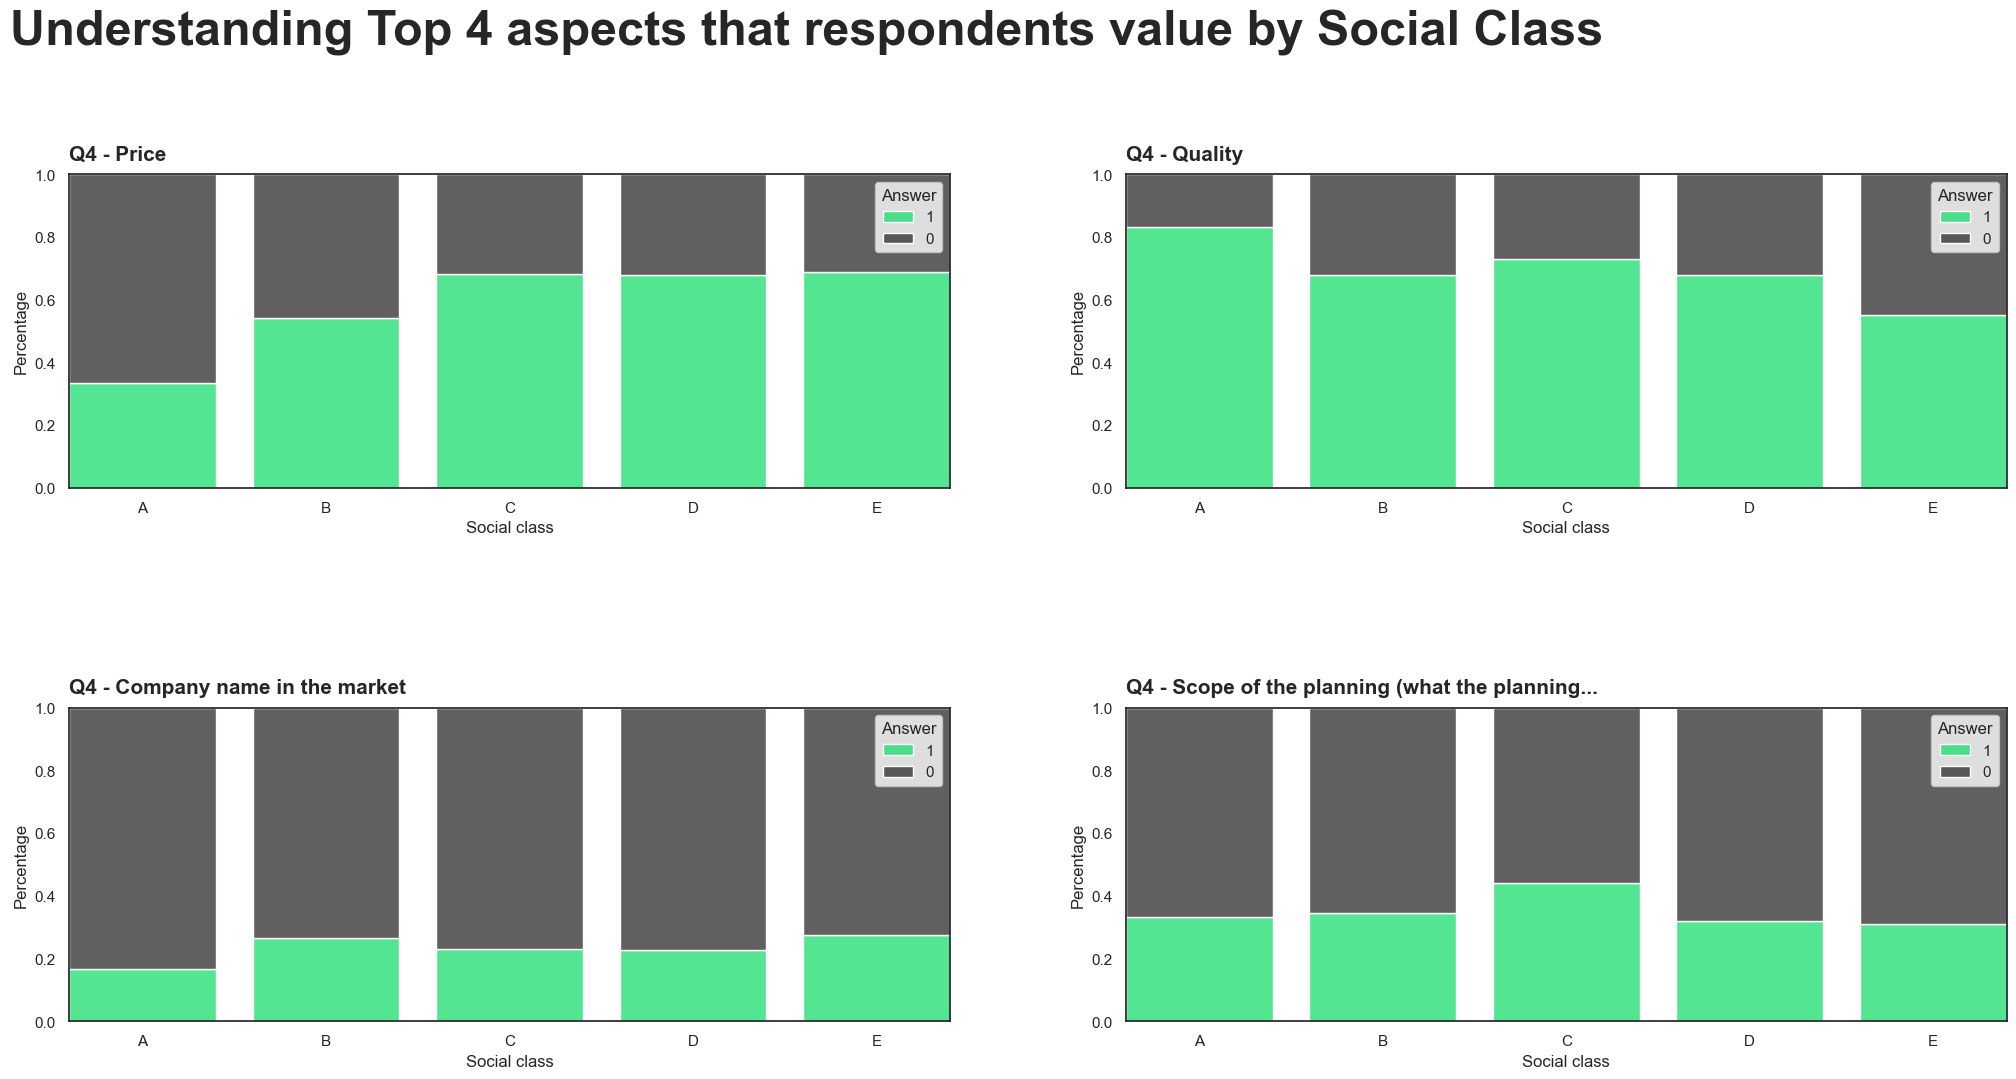

In [56]:
sns.set(rc = {'figure.figsize':(25,11)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Understanding Top 4 aspects that respondents value by Social Class', fontsize=35, fontweight='bold', x = 0.42, y = 1.03)
plt.subplots_adjust(hspace=0.7)

data_translated['Q12 - Social class'] = pd.Categorical(data_translated['Q12 - Social class'], social_class_oder)

for n, col in enumerate(Q4_order_top4):

    ax = plt.subplot(2, 2, 1 + n)
    sns.histplot(data = data_translated, 
                    x = 'Q12 - Social class', 
                    hue = col,
                    palette = palette_yes_no,
                    stat="probability", multiple="fill", shrink=.8, 
                    ax = ax)
                    
    truncated_title = (col[:45] + '...') if len(col) > 45 else col
    plt.title(f'{truncated_title}', fontdict={'fontsize': 15, 'fontweight': "bold"}, loc='left', pad=10)
    plt.ylabel('Percentage', fontsize = 12) 
    plt.xlabel('Social class', fontsize = 12)
    plt.legend(title='Answer', loc='upper right', labels = ['1', '0'])

plt.show()

Chi-square test

In [57]:
p_values = {}

for col in Q4_order_top4:
    observed_frquency = pd.crosstab(data_translated[col], data_translated['Q12 - Social class'])
    # Calculating chi2 stats, pvlue, degrees of freedom and expected frequency
    statistic, p_value, dof, expected_freq = chi2_contingency(observed_frquency.values)

    # Appending to dictionary
    p_values[col] = p_value

df_p_values = pd.DataFrame.from_dict(p_values, orient='index', columns=['P-value'])
df_p_values.style.background_gradient(cmap ='coolwarm')

#### **Q4 - By Age Group**

**Age Group Insights**

- Younger age groups (25-29, 30-39, 40-49) prioritize the quality of the financial service, indicating their focus on service excellence.
- Other aspects do not seem to change significantly based on the respondents' age groups, suggesting a consistent preference for quality across different age demographics.

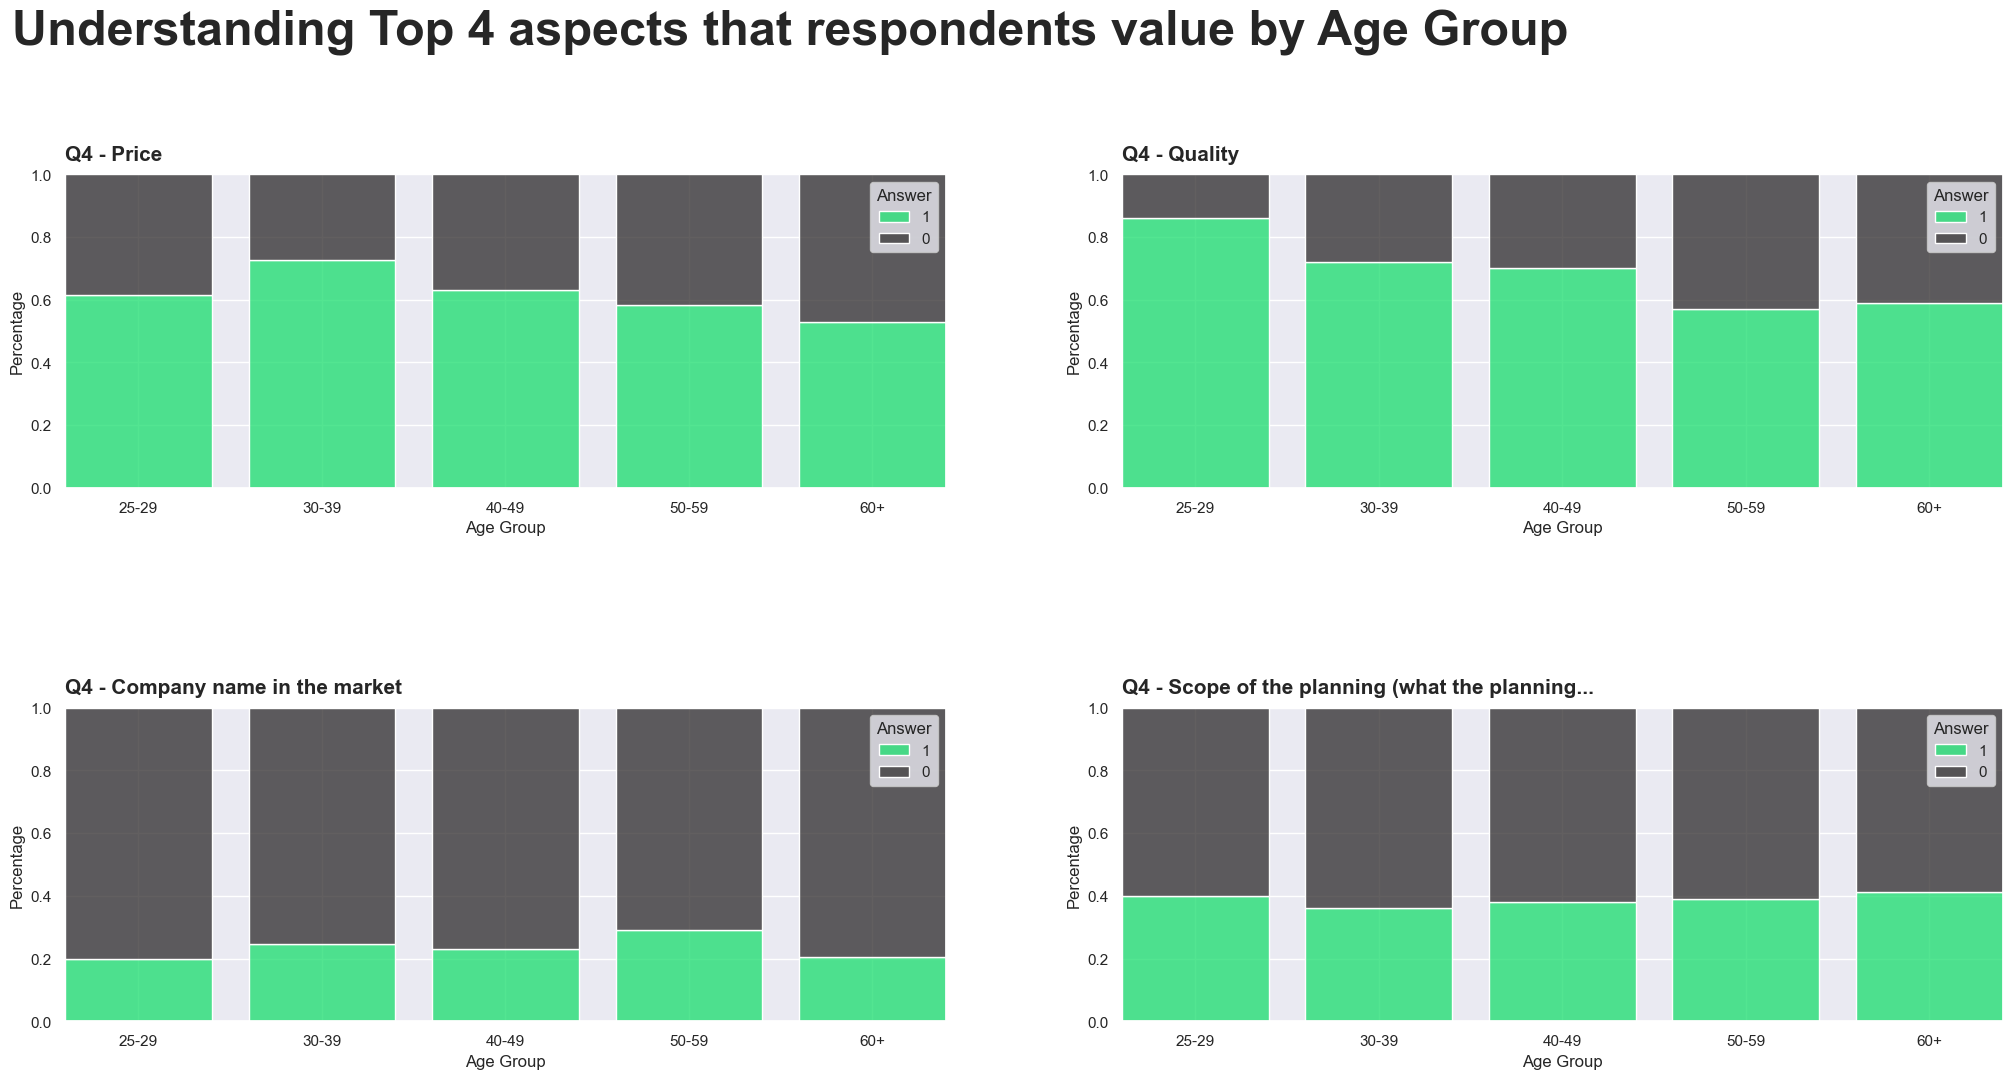

In [58]:
sns.set(rc = {'figure.figsize':(25,11)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Understanding Top 4 aspects that respondents value by Age Group', fontsize=35, fontweight='bold', x = 0.415, y = 1.03)
plt.subplots_adjust(hspace=0.7)


sns.set(rc = {'figure.figsize':(20,10)})
data_translated['Age group'] = pd.Categorical(data_translated['Age group'], age_group_order)

for n, col in enumerate(Q4_order_top4):

    ax = plt.subplot(2, 2,  1 + n)
    sns.histplot(data = data_translated, 
                    x = 'Age group', 
                    hue = col,
                    palette = {0 : (45/255, 42/255, 43/255), 1 : (25/255, 221/255, 109/255)},
                    stat="probability", multiple="fill", shrink=.8, 
                    ax = ax)
                    
    truncated_title = (col[:45] + '...') if len(col) > 45 else col
    plt.title(f'{truncated_title}', fontdict={'fontsize': 15, 'fontweight': "bold"}, loc='left', pad=10) 
    plt.ylabel('Percentage', fontsize = 12) 
    plt.xlabel('Age Group', fontsize = 12)
    plt.legend(title='Answer', loc='upper right', labels = [1, 0])

plt.show()

Chi-square test

In [59]:
p_values = {}

for col in Q4_order_top4:
    observed_frquency = pd.crosstab(data_translated[col], data_translated['Age group'])
    # Calculating chi2 stats, pvlue, degrees of freedom and expected frequency
    statistic, p_value, dof, expected_freq = chi2_contingency(observed_frquency.values)

    # Appending to dictionary
    p_values[col] = p_value

df_p_values = pd.DataFrame.from_dict(p_values, orient='index', columns=['P-value'])
df_p_values.style.background_gradient(cmap ='coolwarm')

## **Understanding what aspects respondents believe they need the most (Question 5)**

*Question 5: Bearing in mind the definitions of the areas of a personal Financial Planning, which of the options do you believe you need the most?*

| Options              |
| -------------------- |
| Financial Management |
| Risk Management      |
| Investment Planning  |
| Tax Planning         |
| Retirement Planning  |
| Succession Planning  |

This analysis aims to identify the areas of personal financial planning that respondents prioritize the most (Question 5). By understanding which areas are considered most crucial by respondents, we can tailor our financial planning services to better meet their specific needs and expectations. Additionally, this analysis may reveal patterns or trends across different demographic groups, providing valuable insights into the key drivers influencing respondents' preferences for various aspects of personal financial planning.

**Caution:** Clients' stated needs may not always align with their actual needs.

### **Analysing Q5 Answers**

Creating list for the questions

In [60]:
Q5_order = [
    'Q5 - Financial Management',  
    'Q5 - Risk Management', 
    'Q5 - Asset Management', 
    'Q5 - Tax Planning', 
    'Q5 - Retirement Planning', 
    'Q5 - Succession Planning'
]

#### **Q5 - General**

**General Insights**

1. Diverse Financial Needs: The results indicate that respondents have diverse needs in personal financial planning. The four areas that received the most attention are:

    - Financial Management (186 votes): This likely reflects the fundamental need for budgeting and managing day-to-day finances, a concern for most individuals and families.
    - Asset Management (140 votes): This might point to an interest in growing wealth through investments and property management, a priority for those looking to build long-term financial security.
    - Retirement Planning (129 votes): The focus on retirement planning suggests a conscious effort among respondents to prepare for life after work, highlighting the importance of future security.
    - Risk Management (104 votes): This finding might signal a growing awareness of the importance of insurance and other financial tools to protect against unforeseen financial challenges.


2. Specialized Interests in Tax and Succession Planning:
    - Tax Planning: With relatively few positive votes, tax planning seems to be considered a more specialized area. It might be more relevant to those with complex financial portfolios or those in higher tax brackets.
    - Succession Planning: Similar to tax planning, succession planning is often associated with estate planning and the transfer of wealth, which might explain why it received fewer votes. It could be more relevant to older individuals or those with significant assets to pass on.

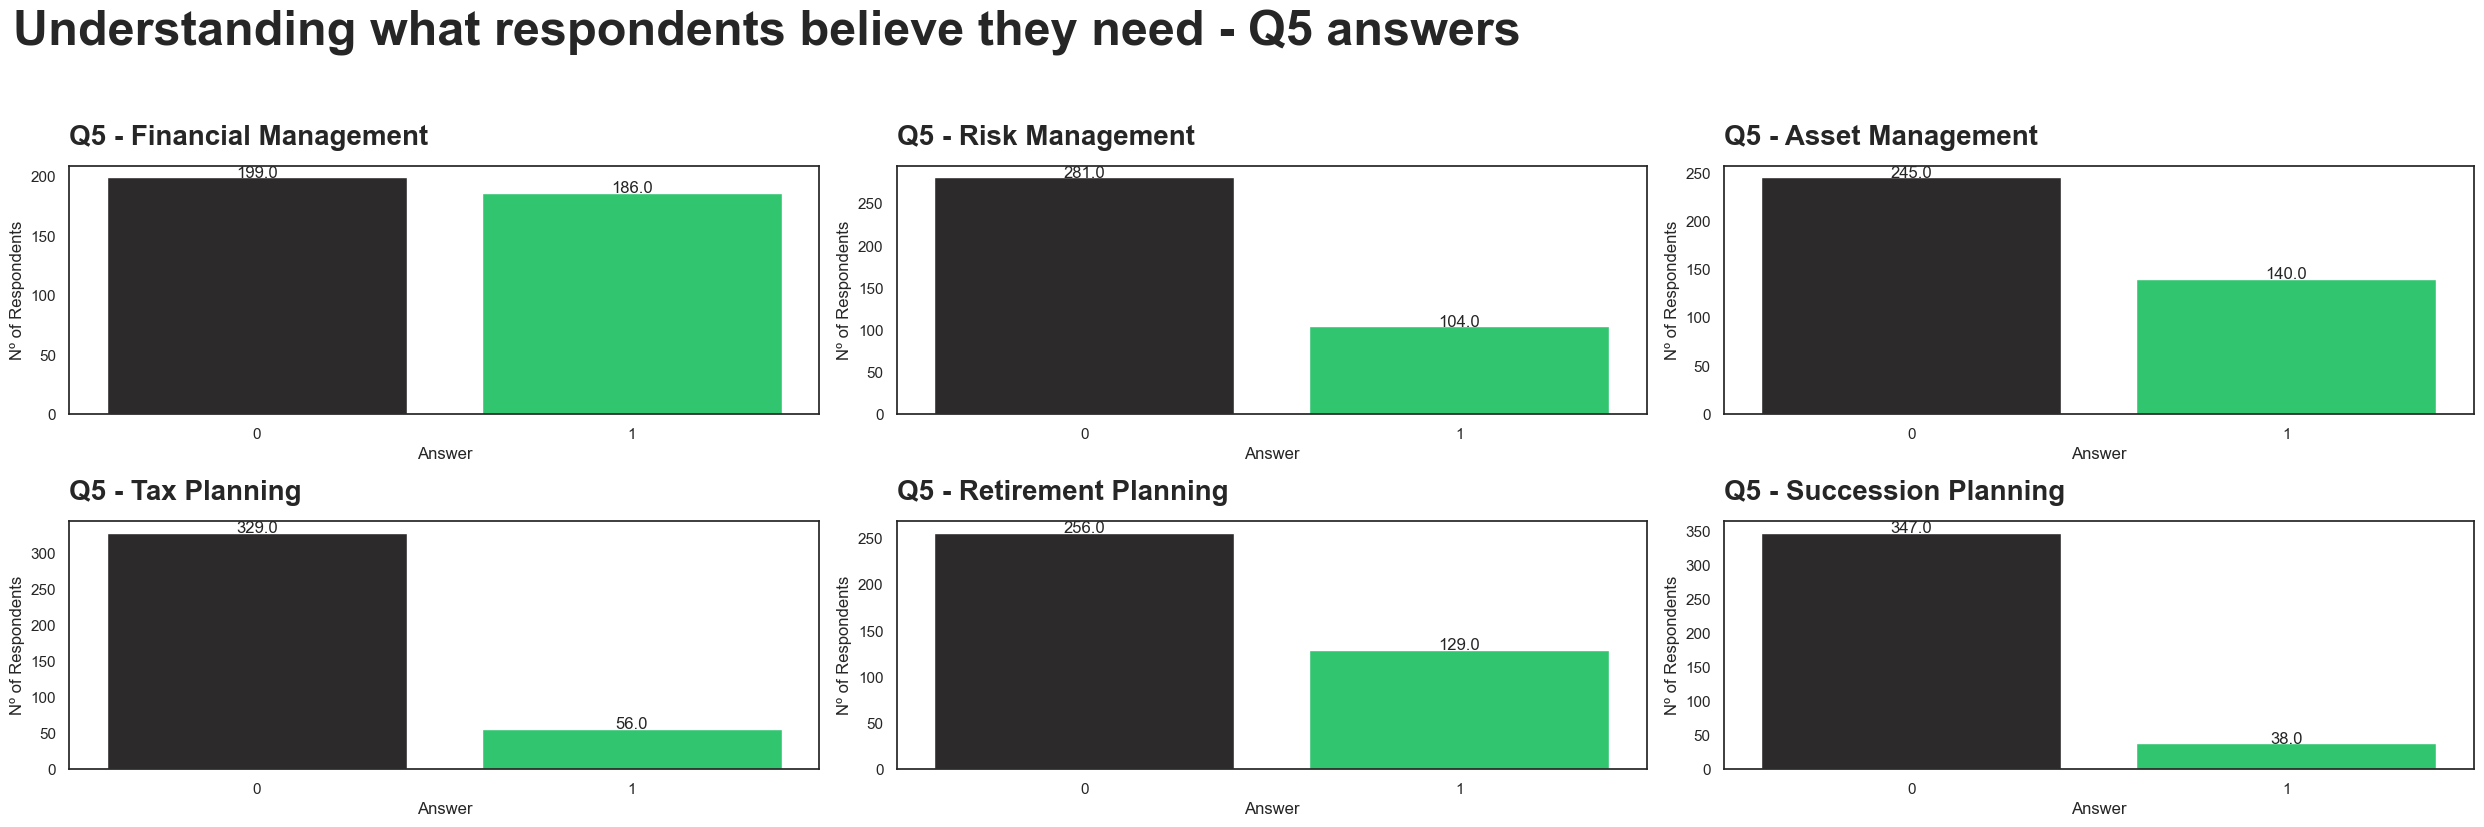

In [89]:
sns.set(rc = {'figure.figsize':(25,11)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Understanding what respondents believe they need - Q5 answers', fontsize=35, fontweight='bold', x = 0.31, y = 1.03)
plt.subplots_adjust(hspace=0.7)

for n, col in enumerate(Q5_order):

    ax = plt.subplot(3, 3,  1 + n)
    sns.countplot(data = data_translated, 
                    x = col,
                    palette = palette_yes_no,
                    ax = ax)
                    
    plt.title(f'{col}', fontdict = {'fontsize' : 20, 'fontweight' : "bold"}, loc = 'left', pad = 15)  
    plt.ylabel('Nº of Respondents', fontsize = 12) 
    plt.xlabel('Answer', fontsize = 12)

    # Adicionando rotúlo de data_translated do Nº de clientes
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
        height,
        '{:1}'.format((height)),
        ha='center',
        size = 12)

plt.tight_layout()  # Adjusts the figure to prevent any clipping of labels or titles?
plt.savefig('General Financial Interst.png')
plt.show()

#### **Q5 - By Gender**

**Gender Insights**

- **Equal Priorities:** The survey results suggest that both men and women share similar priorities and needs when it comes to personal financial planning. Areas like Financial Management, Asset Management, Retirement Planning, and Risk Management appear to be universal concerns, regardless of gender.

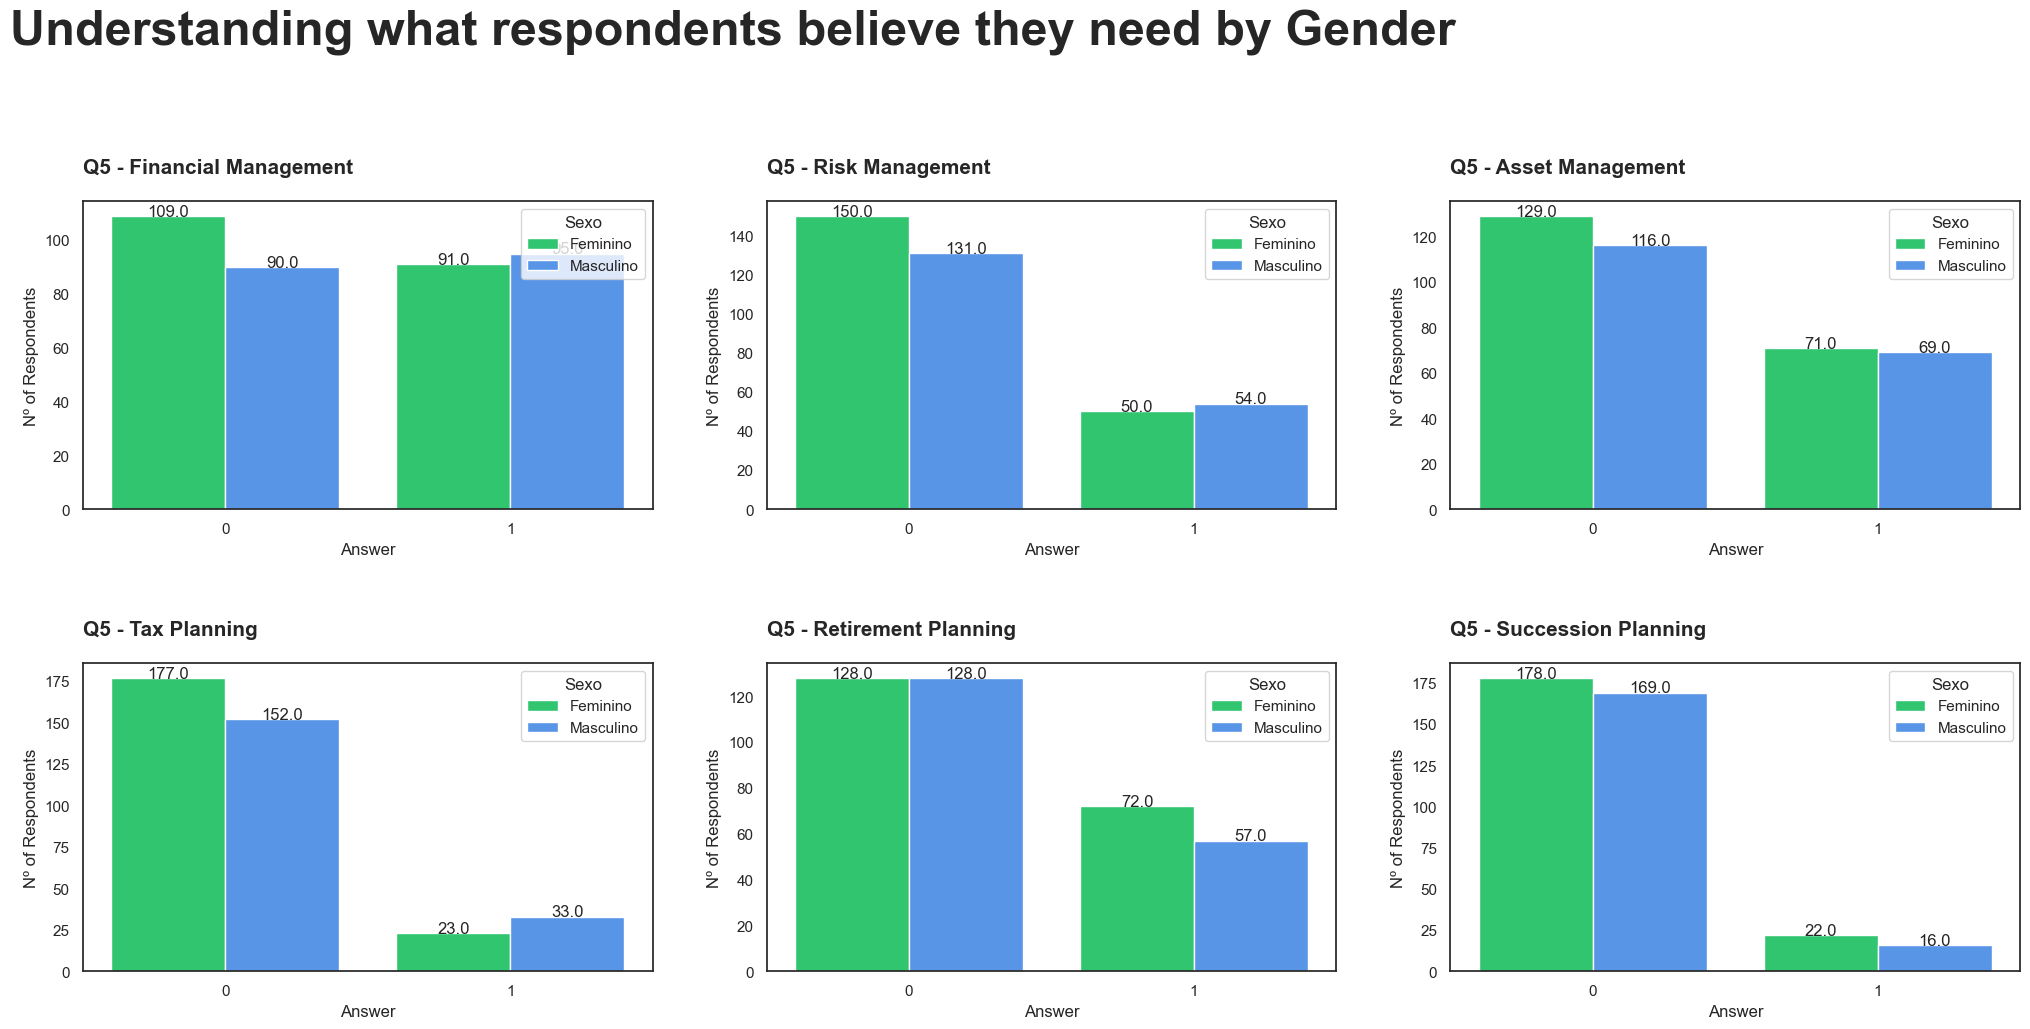

In [63]:
sns.set(rc = {'figure.figsize':(25,16)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Understanding what respondents believe they need by Gender', fontsize=35, fontweight='bold', x = 0.385, y =1)
plt.subplots_adjust(hspace=0.5)

for n, col in enumerate(Q5_order):

    plt.subplot(3, 3,  1 + n)
    ax = sns.countplot(data = data_translated, 
                    x = col, 
                    hue = 'Q9 - Gender',
                    palette = palette_gender)
                    
    plt.title(f'{col}', fontdict = {'fontsize' : 15, 'fontweight' : "bold"}, loc = 'left', pad = 20)  
    plt.ylabel('Nº of Respondents', fontsize = 12) 
    plt.xlabel('Answer', fontsize = 12)
    plt.legend(title='Sexo', loc='upper right')

    # Adicionando rotúlo de data_translated do Nº de clientes
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
        height,
        '{:1}'.format((height)),
        ha='center',
        size = 12)

plt.show()

Chi-square test

In [64]:
p_values = {}

for col in Q5_order:
    observed_frquency = pd.crosstab(data_translated[col], data_translated['Q9 - Gender'])
    # Calculating chi2 stats, pvlue, degrees of freedom and expected frequency
    statistic, p_value, dof, expected_freq = chi2_contingency(observed_frquency.values)

    # Appending to dictionary
    p_values[col] = p_value

df_p_values = pd.DataFrame.from_dict(p_values, orient='index', columns=['P-value'])
df_p_values.style.background_gradient(cmap ='coolwarm')

#### **Q5 - By Social Class**

- Financial Management and retirement planning are areas of interest to almost all social classes, except for class A, which is less interested possibly because they already have knowledge about the subjects.
- As we saw in the general insights, Tax and sucession planning is related social classes A. Because these social classes have more assest so they are worried about their sucession and since they have a huge asset they look efficient taxing methods
- Risk management seems to not be related to Social Class
- Asset Management seems to be slighty related to the social class. The higher the social class the higher the interest in the subject

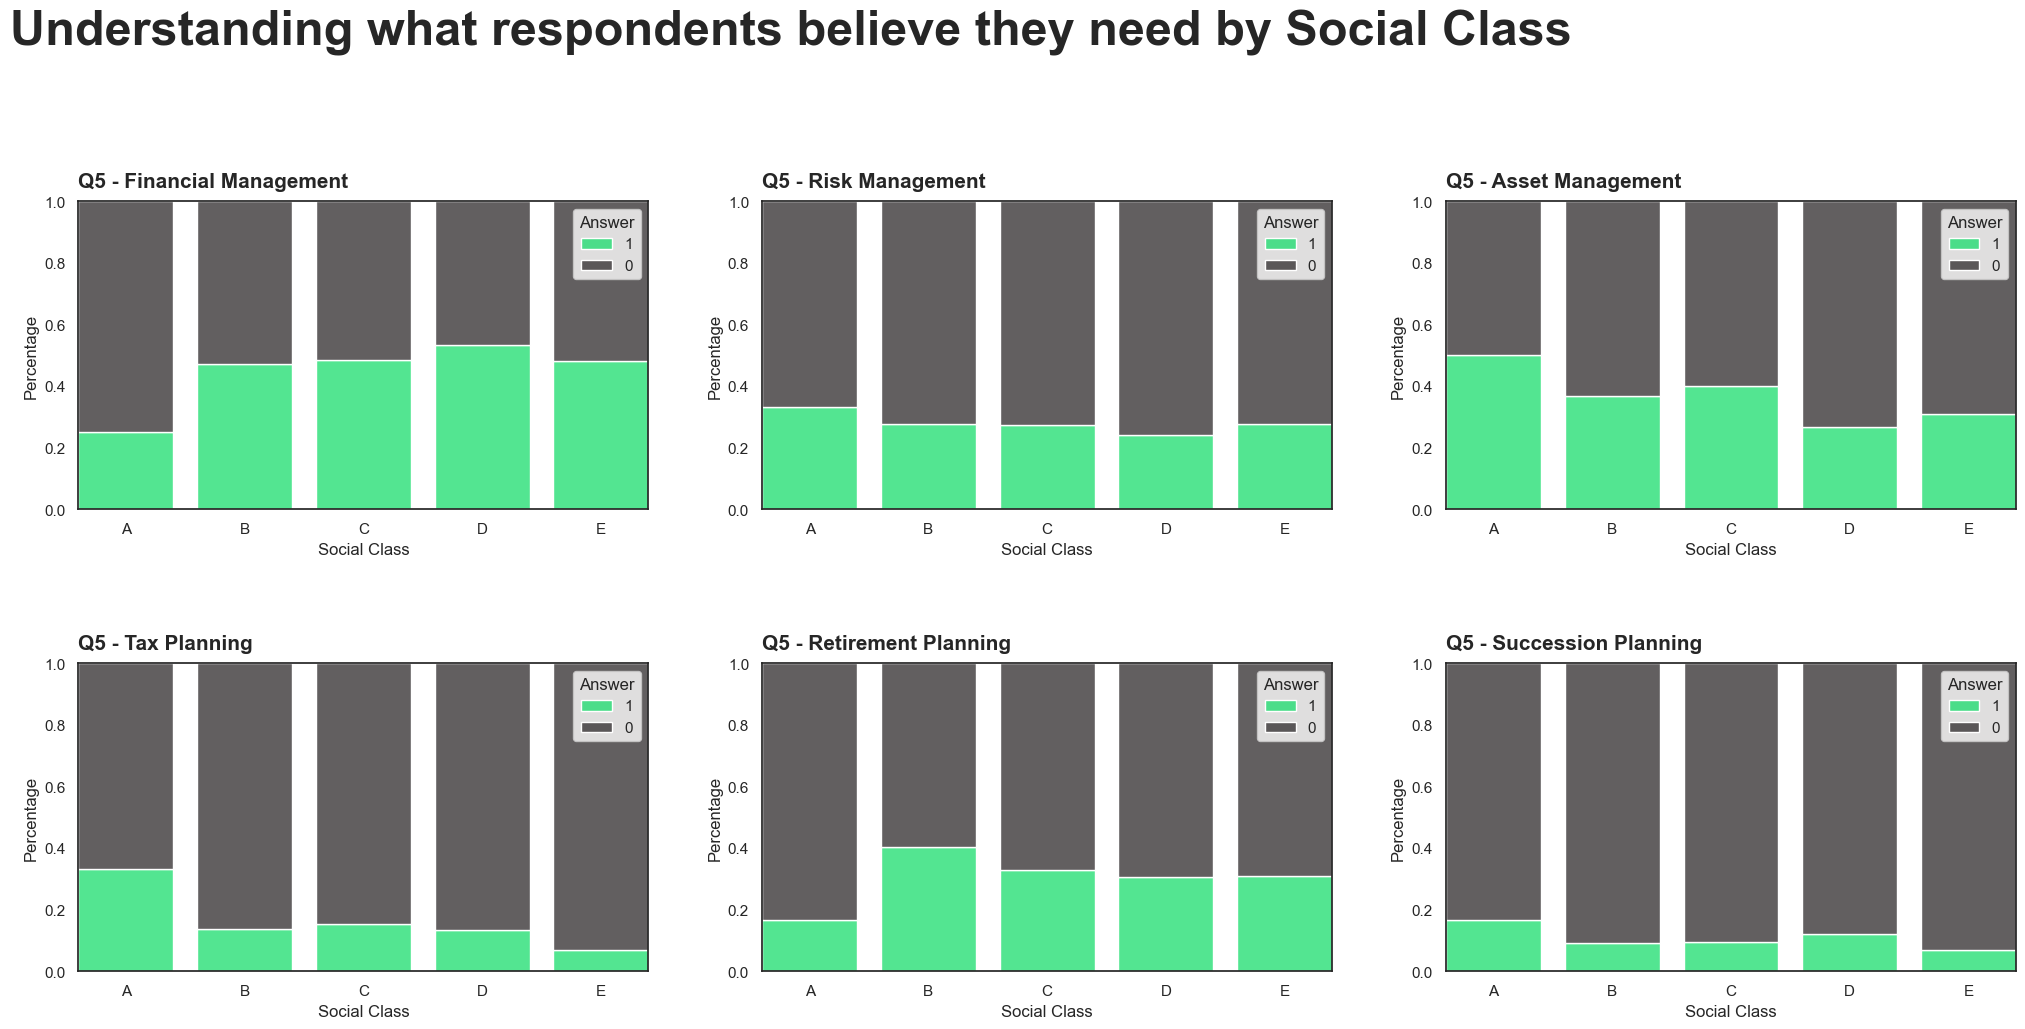

In [65]:
sns.set(rc = {'figure.figsize':(25,16)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Understanding what respondents believe they need by Social Class', fontsize=35, fontweight='bold', x = 0.41, y =1)
plt.subplots_adjust(hspace=0.5)

data_translated['Q12 - Social class'] = pd.Categorical(data_translated['Q12 - Social class'], social_class_oder)

for n, col in enumerate(Q5_order):

    plt.subplot(3, 3,  1 + n)
    sns.histplot(data = data_translated, 
                    x = 'Q12 - Social class', 
                    hue = col,
                    palette = palette_yes_no,
                    stat="probability", multiple="fill", shrink=.8 )
                    
    plt.title(f'{col}', fontdict = {'fontsize' : 15, 'fontweight' : "bold"}, loc = 'left', pad = 10)  
    plt.ylabel('Percentage', fontsize = 12) 
    plt.xlabel('Social Class', fontsize = 12)
    plt.legend(title='Answer', loc='upper right', labels = [1, 0])

plt.show()

Chi-square test

In [66]:
p_values = {}

for col in Q5_order:
    observed_frquency = pd.crosstab(data_translated[col], data_translated['Q12 - Social class'])
    # Calculating chi2 stats, pvlue, degrees of freedom and expected frequency
    statistic, p_value, dof, expected_freq = chi2_contingency(observed_frquency.values)

    # Appending to dictionary
    p_values[col] = p_value

df_p_values = pd.DataFrame.from_dict(p_values, orient='index', columns=['P-value'])
df_p_values.style.background_gradient(cmap ='coolwarm')

#### **Q5 - By Age Group**

**Age Group Insights**

- The only interest that seems to be related to the Age group is: Sucession planning. The interest is low in all age groups, but the older age groups (50-59, 60+) stated more interest in these topics.

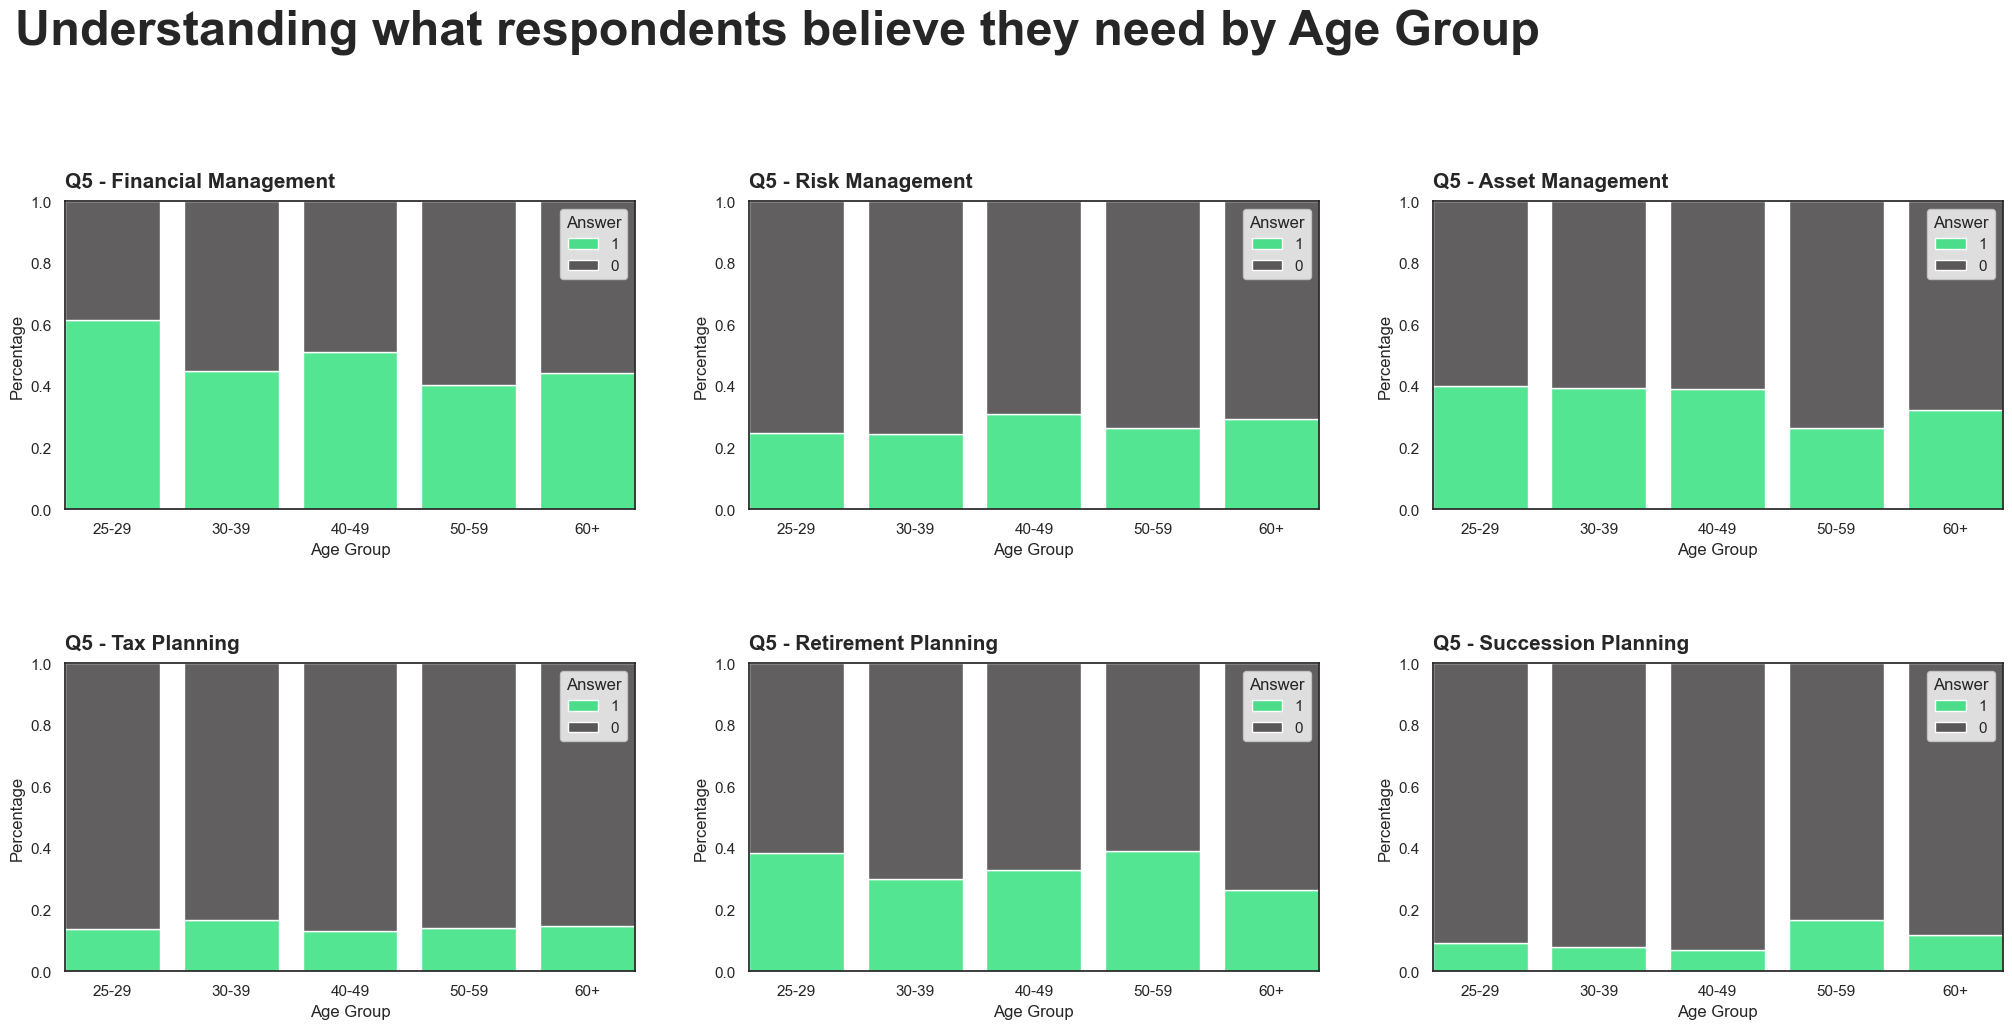

In [67]:
sns.set(rc = {'figure.figsize':(25,16)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Understanding what respondents believe they need by Age Group', fontsize=35, fontweight='bold', x = 0.41, y =1)
plt.subplots_adjust(hspace=0.5)

data_translated['Age group'] = pd.Categorical(data_translated['Age group'], age_group_order)

for n, col in enumerate(Q5_order):

    plt.subplot(3, 3,  1 + n)
    sns.histplot(data = data_translated, 
                    x = 'Age group', 
                    hue = col,
                    palette = palette_yes_no,
                    stat="probability", multiple="fill", shrink=.8 )
                    
    plt.title(f'{col}', fontdict = {'fontsize' : 15, 'fontweight' : "bold"}, loc = 'left', pad = 10)  
    plt.ylabel('Percentage', fontsize = 12) 
    plt.xlabel('Age Group', fontsize = 12)
    plt.legend(title='Answer', loc='upper right', labels = [1, 0])

plt.show()

Chi-square test

In [68]:
p_values = {}

for col in Q5_order:
    observed_frquency = pd.crosstab(data_translated[col], data_translated['Age group'])
    # Calculating chi2 stats, pvlue, degrees of freedom and expected frequency
    statistic, p_value, dof, expected_freq = chi2_contingency(observed_frquency.values)

    # Appending to dictionary
    p_values[col] = p_value

df_p_values = pd.DataFrame.from_dict(p_values, orient='index', columns=['P-value'])
df_p_values.style.background_gradient(cmap ='coolwarm')

## **Understanding how much respondents are willing to pay for an Financial Plannnig (Question 6)**

*Question 6: What amount are you willing to pay for a Financial Planning?*

| Price Range                                                       |
|-------------------------------------------------------------------|
| R$1.000,00 to R$2.000,00                                          |
| R$2.000,00 to R$4.000,00                                          |
| R$4.000,00 to R$6.000,00                                          |
| R$6.000,00 to R$8.000,00                                          |
| Above R$8.000,00                                                  |
| Not willing to pay for Personal Financial Planning services       |

This analysis aims to identify respondents' preferences regarding the amount they are willing to pay for Financial Planning services (Question 6). By understanding respondents' budget expectations, we can tailor our financial planning offerings to align with their price range and financial needs. Additionally, this analysis may reveal insights into the price sensitivity of different demographic groups, helping us better design and market our financial planning services to potential clients. It's essential to consider the pricing information alongside other factors, such as service features and benefits, to provide a comprehensive and appealing financial planning package to our clients.

### **Analysing Q6 Answers**

In [69]:
ordem_value_willing_to_pay = ['Nothing', '1 to 2', '2 to 4', '4 to 6', '6 to 8', 'More than 8']

#### **Q6 - General**

**General Insights**

- 72 % of respondents are willing to pay some value for a financial service. Being 50% of all respondents willing to pay between 1 to 2 thousands.
- On the other hand, 37,7% are not willing to pay
- Overall, people did not state to be willing to pay large amounts for a financial service, for these public a more generic and scalable approach would be good

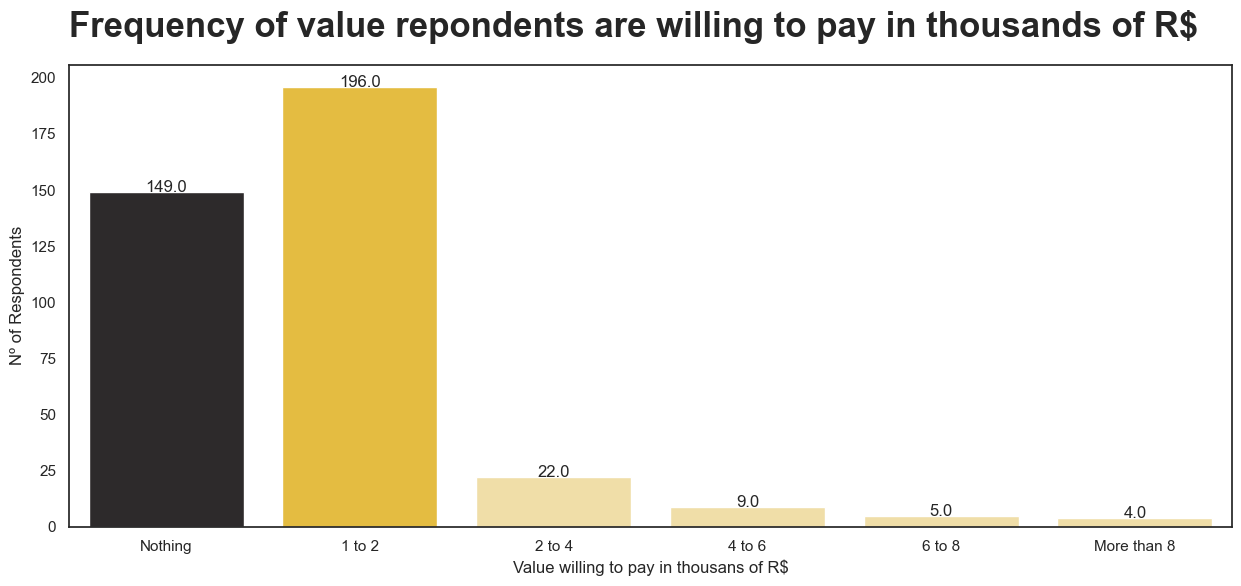

In [90]:
sns.set(rc = {'figure.figsize':(15,6)})
sns.set_style("white")  # Set the plot background to white

ax = sns.countplot(data = data_translated, 
              x = 'Q6 - Value willing to pay for a financial planning',
              order = ordem_value_willing_to_pay, 
              palette = palette_value_willing_to_pay)
                    
plt.title(f'Frequency of value repondents are willing to pay in thousands of R$', fontdict = {'fontsize' : 25, 'fontweight' : "bold"}, loc = 'left', pad = 20) 
plt.ylabel('Nº of Respondents', fontsize = 12) 
plt.xlabel('Value willing to pay in thousans of R$', fontsize = 12)

# Adicionando rotúlo de data_translated do Nº de clientes
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height,
    '{:1}'.format((height)),
    ha='center',
    size = 12)

plt.show()

#### **Q6 - By Gender**

**Gender Insights:**

- The visual analysis suggests that there may be a difference in the willingness to pay for financial services between men and women. However, the sample size of the data is relatively small, and as a result, we cannot confidently conclude that there is a significant difference in the willingness to pay between the two genders. For now, it appears that men and women have similar willingness to pay for financial planning services based on the available data.

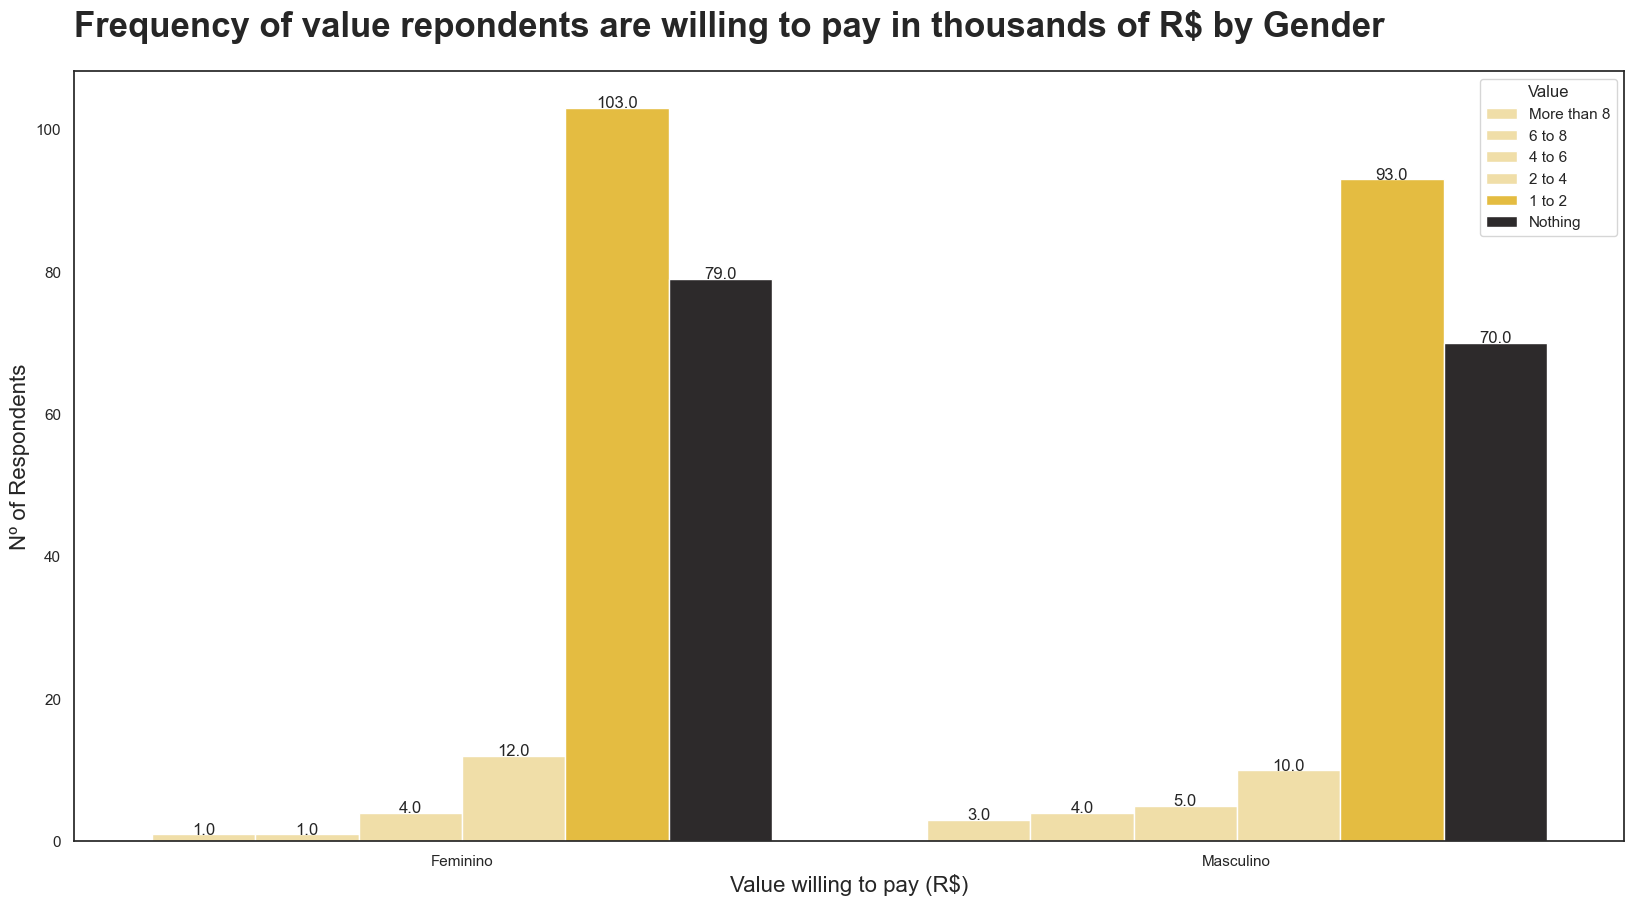

In [71]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.set_style("white")  # Set the plot background to white

# ax = sns.countplot(data = data_translated, x = 'Q6 - Value willing to pay for a financial planning', hue = 'Q9 - Gender', palette = palette_gender)
ax = sns.countplot(data = data_translated, 
                x = 'Q9 - Gender', 
                hue = 'Q6 - Value willing to pay for a financial planning',
                hue_order = ordem_value_willing_to_pay[::-1],
                palette = palette_value_willing_to_pay[::-1])     


plt.title(f'Frequency of value repondents are willing to pay in thousands of R$ by Gender', fontdict = {'fontsize' : 25, 'fontweight' : "bold"}, loc = 'left', pad = 25) 
plt.ylabel('Nº of Respondents', fontsize = 16) 
plt.xlabel('Value willing to pay (R$)', fontsize = 16)
plt.legend(title='Value', loc='upper right')

# Adicionando rotúlo de data_translated do Nº de clientes
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height,
    '{:1}'.format((height)),
    ha='center',
    size = 12)

plt.show()

#### **Q6 - By Social**

**Social Class Insights:**

The analysis of respondents' willingness to pay for financial planning services (Question 6) reveals significant differences based on social class:

- Social class significantly influences the willingness to pay for financial planning services. Notably, respondents from social class A differ from the rest of the social classes. They expressed less frequent reluctance to pay for financial planning services and, interestingly, showed a greater willingness to pay higher amounts compared to other social classes

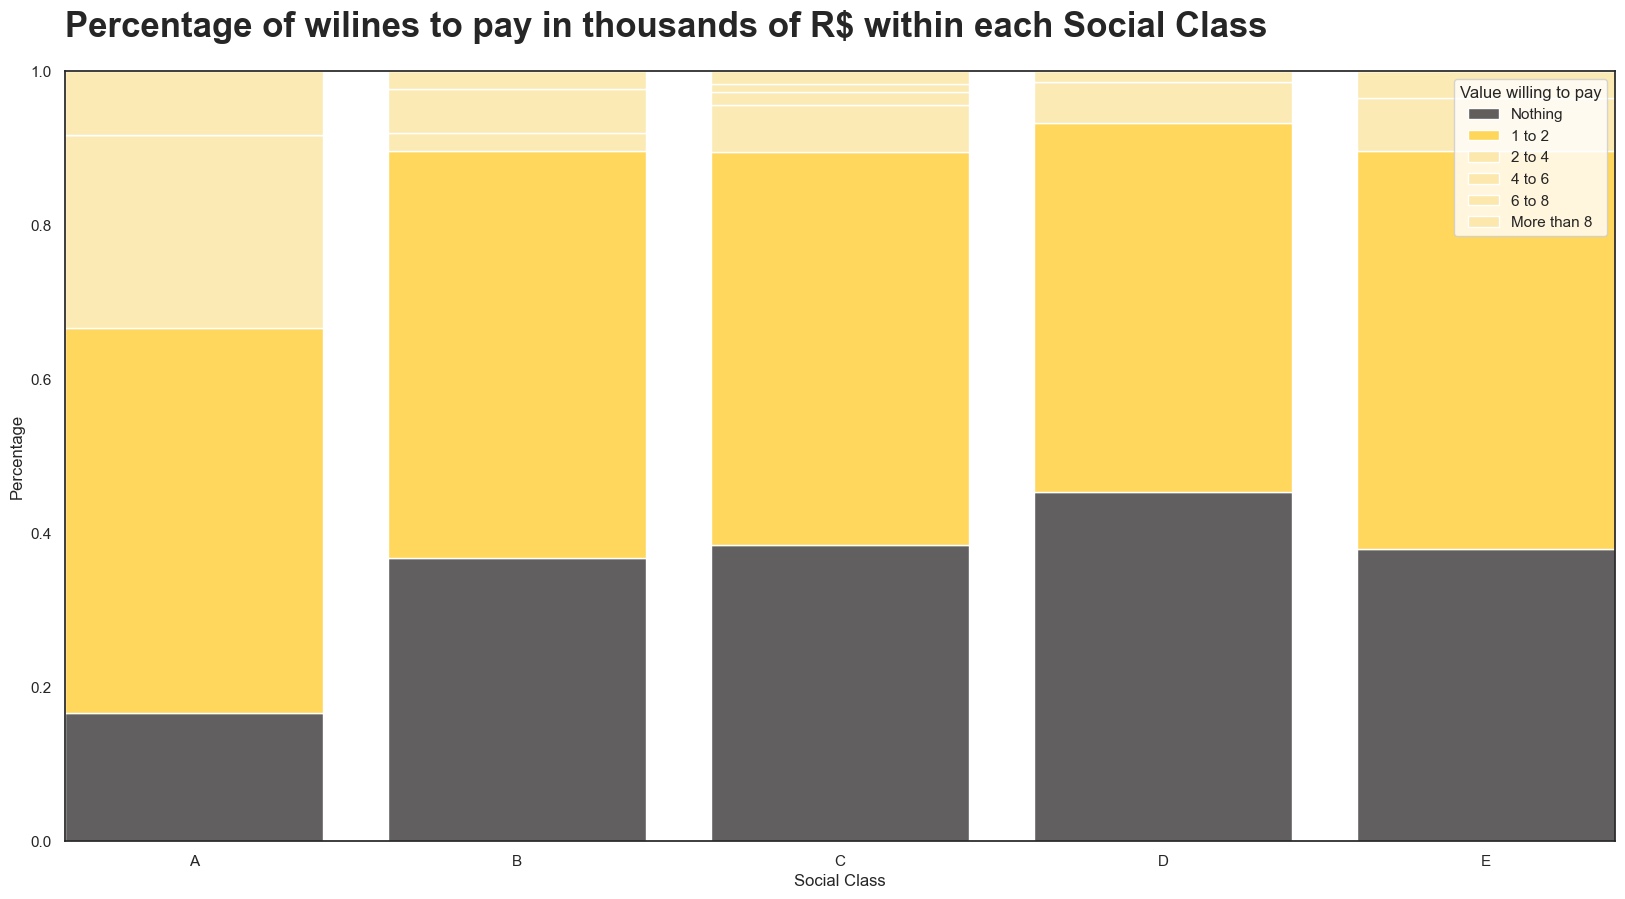

In [72]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.set_style("white")  # Set the plot background to white

data_translated['Q12 - Social class'] = pd.Categorical(data_translated['Q12 - Social class'], social_class_oder)

sns.histplot(data = data_translated, 
                x = 'Q12 - Social class', 
                hue = 'Q6 - Value willing to pay for a financial planning',
                hue_order = ordem_value_willing_to_pay[::-1],
                palette = palette_value_willing_to_pay[::-1],
                stat="probability", multiple="fill", shrink=.8 )
                    
plt.title('Percentage of wilines to pay in thousands of R$ within each Social Class', fontdict = {'fontsize' : 25, 'fontweight' : "bold"}, loc = 'left', pad = 25) 
plt.ylabel('Percentage', fontsize = 12) 
plt.xlabel('Social Class', fontsize = 12)
plt.legend(title = 'Value willing to pay', labels = ordem_value_willing_to_pay, loc = 'upper right')

plt.show()

#### **Q6 - By Group Age**

**Social Class Insights:**

The analysis of respondents' willingness to pay for financial planning services (Question 6) reveals significant differences based on Age Groups

- Visualize we can divide Age groups in two main categories based on their willingness to pay:
    - Younger Age groups: 25-29, 30-39 and 40-49
    - Older Age groups: 50-59, 60+



- Younger age groups displayed less frequent reluctance to pay for financial planning services and showed a greater willingness to pay amounts ranging from 1 to 2 thousand R$. This suggests that younger individuals value the benefits of financial planning and are more willing to invest in these services to secure their financial future.


- On the other hand, older age groups exhibited a higher percentage of respondents stating that they are not willing to pay for financial planning services. This trend may indicate that older individuals might already have established financial plans or perceive less value in acquiring new financial planning services.

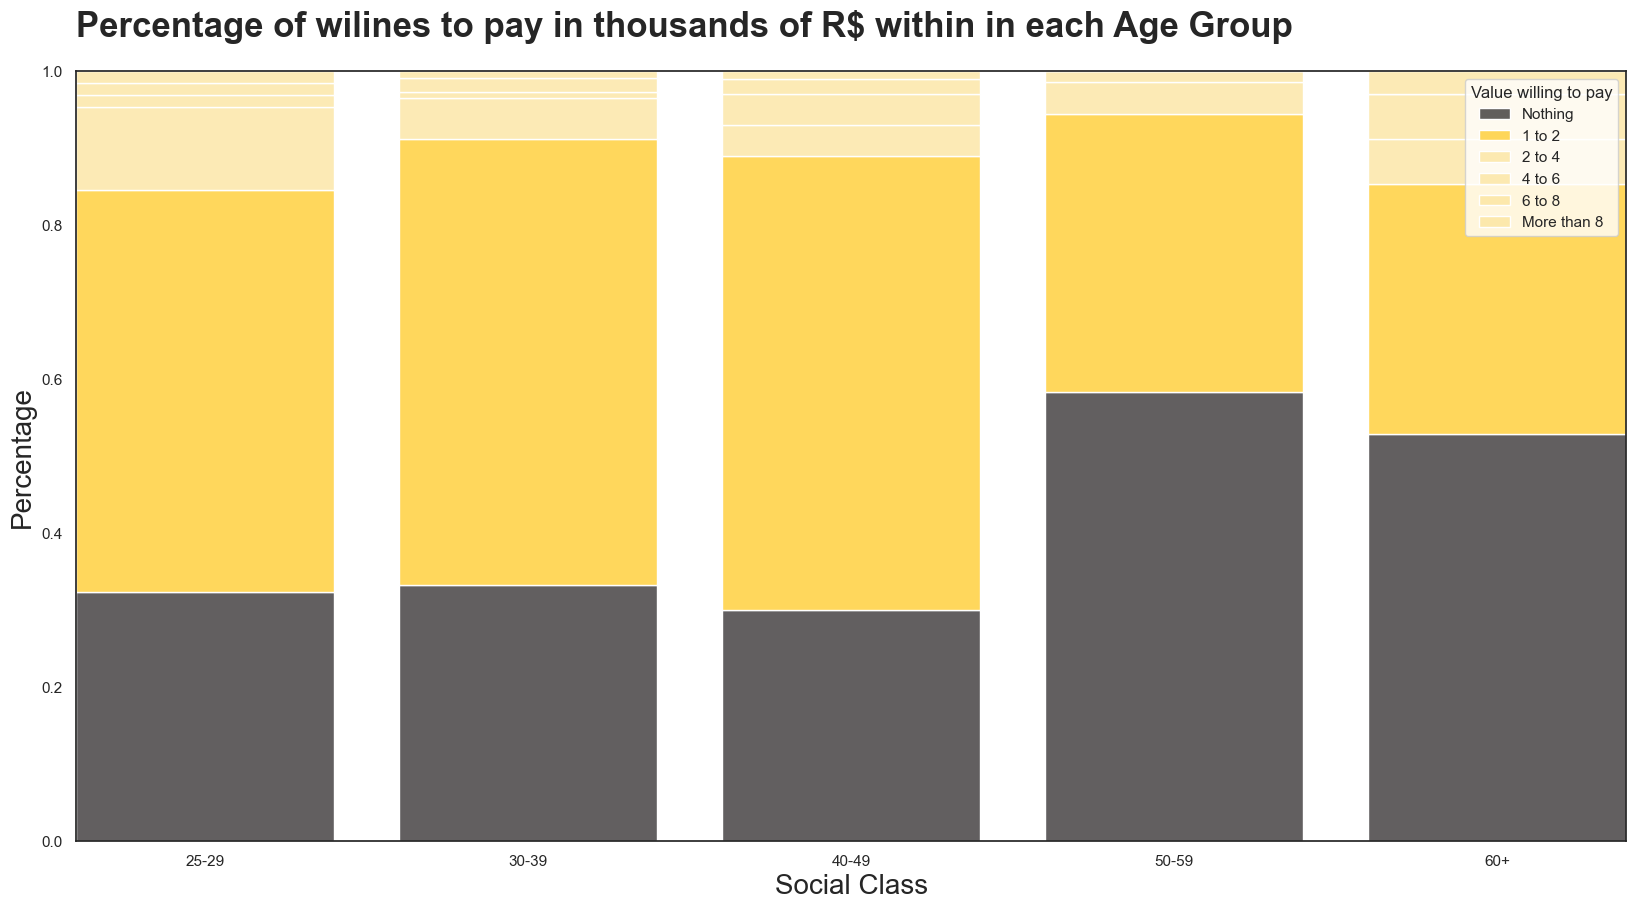

In [73]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.set_style("white")  # Set the plot background to white

data_translated['Age group'] = pd.Categorical(data_translated['Age group'], age_group_order)

sns.histplot(data = data_translated, 
                x = 'Age group', 
                hue = 'Q6 - Value willing to pay for a financial planning',
                hue_order = ordem_value_willing_to_pay[::-1],
                palette = palette_value_willing_to_pay[::-1],
                stat="probability", multiple="fill", shrink=.8 )
                    
plt.title('Percentage of wilines to pay in thousands of R$ within in each Age Group', fontdict = {'fontsize' : 25, 'fontweight' : "bold"}, loc = 'left', pad = 25) 
plt.ylabel('Percentage', fontsize = 20) 
plt.xlabel('Social Class', fontsize = 20)
plt.legend(title = 'Value willing to pay', labels = ordem_value_willing_to_pay, loc = 'upper right')
plt.savefig('Willingness to pay.png')
plt.show()

#### **Q6 relation with Q3**

**Relation with Q3 Insights:**

- For most reasons cited in Q3, the percentage of respondents willing to pay for financial planning services is relatively uniform, ranging from 56% to 76%. This consistency suggests that various financial needs or preferences do not significantly differentiate willingness to pay. 

In [74]:
# Define a function that maps the values according to the condition
def willing_to_pay(value):
    if value == 'Nothing':
        return 0
    else:
        return 1

# Apply the function to the column and create a new column with the results
data_translated['Willing to pay?'] = data_translated['Q6 - Value willing to pay for a financial planning'].apply(willing_to_pay)

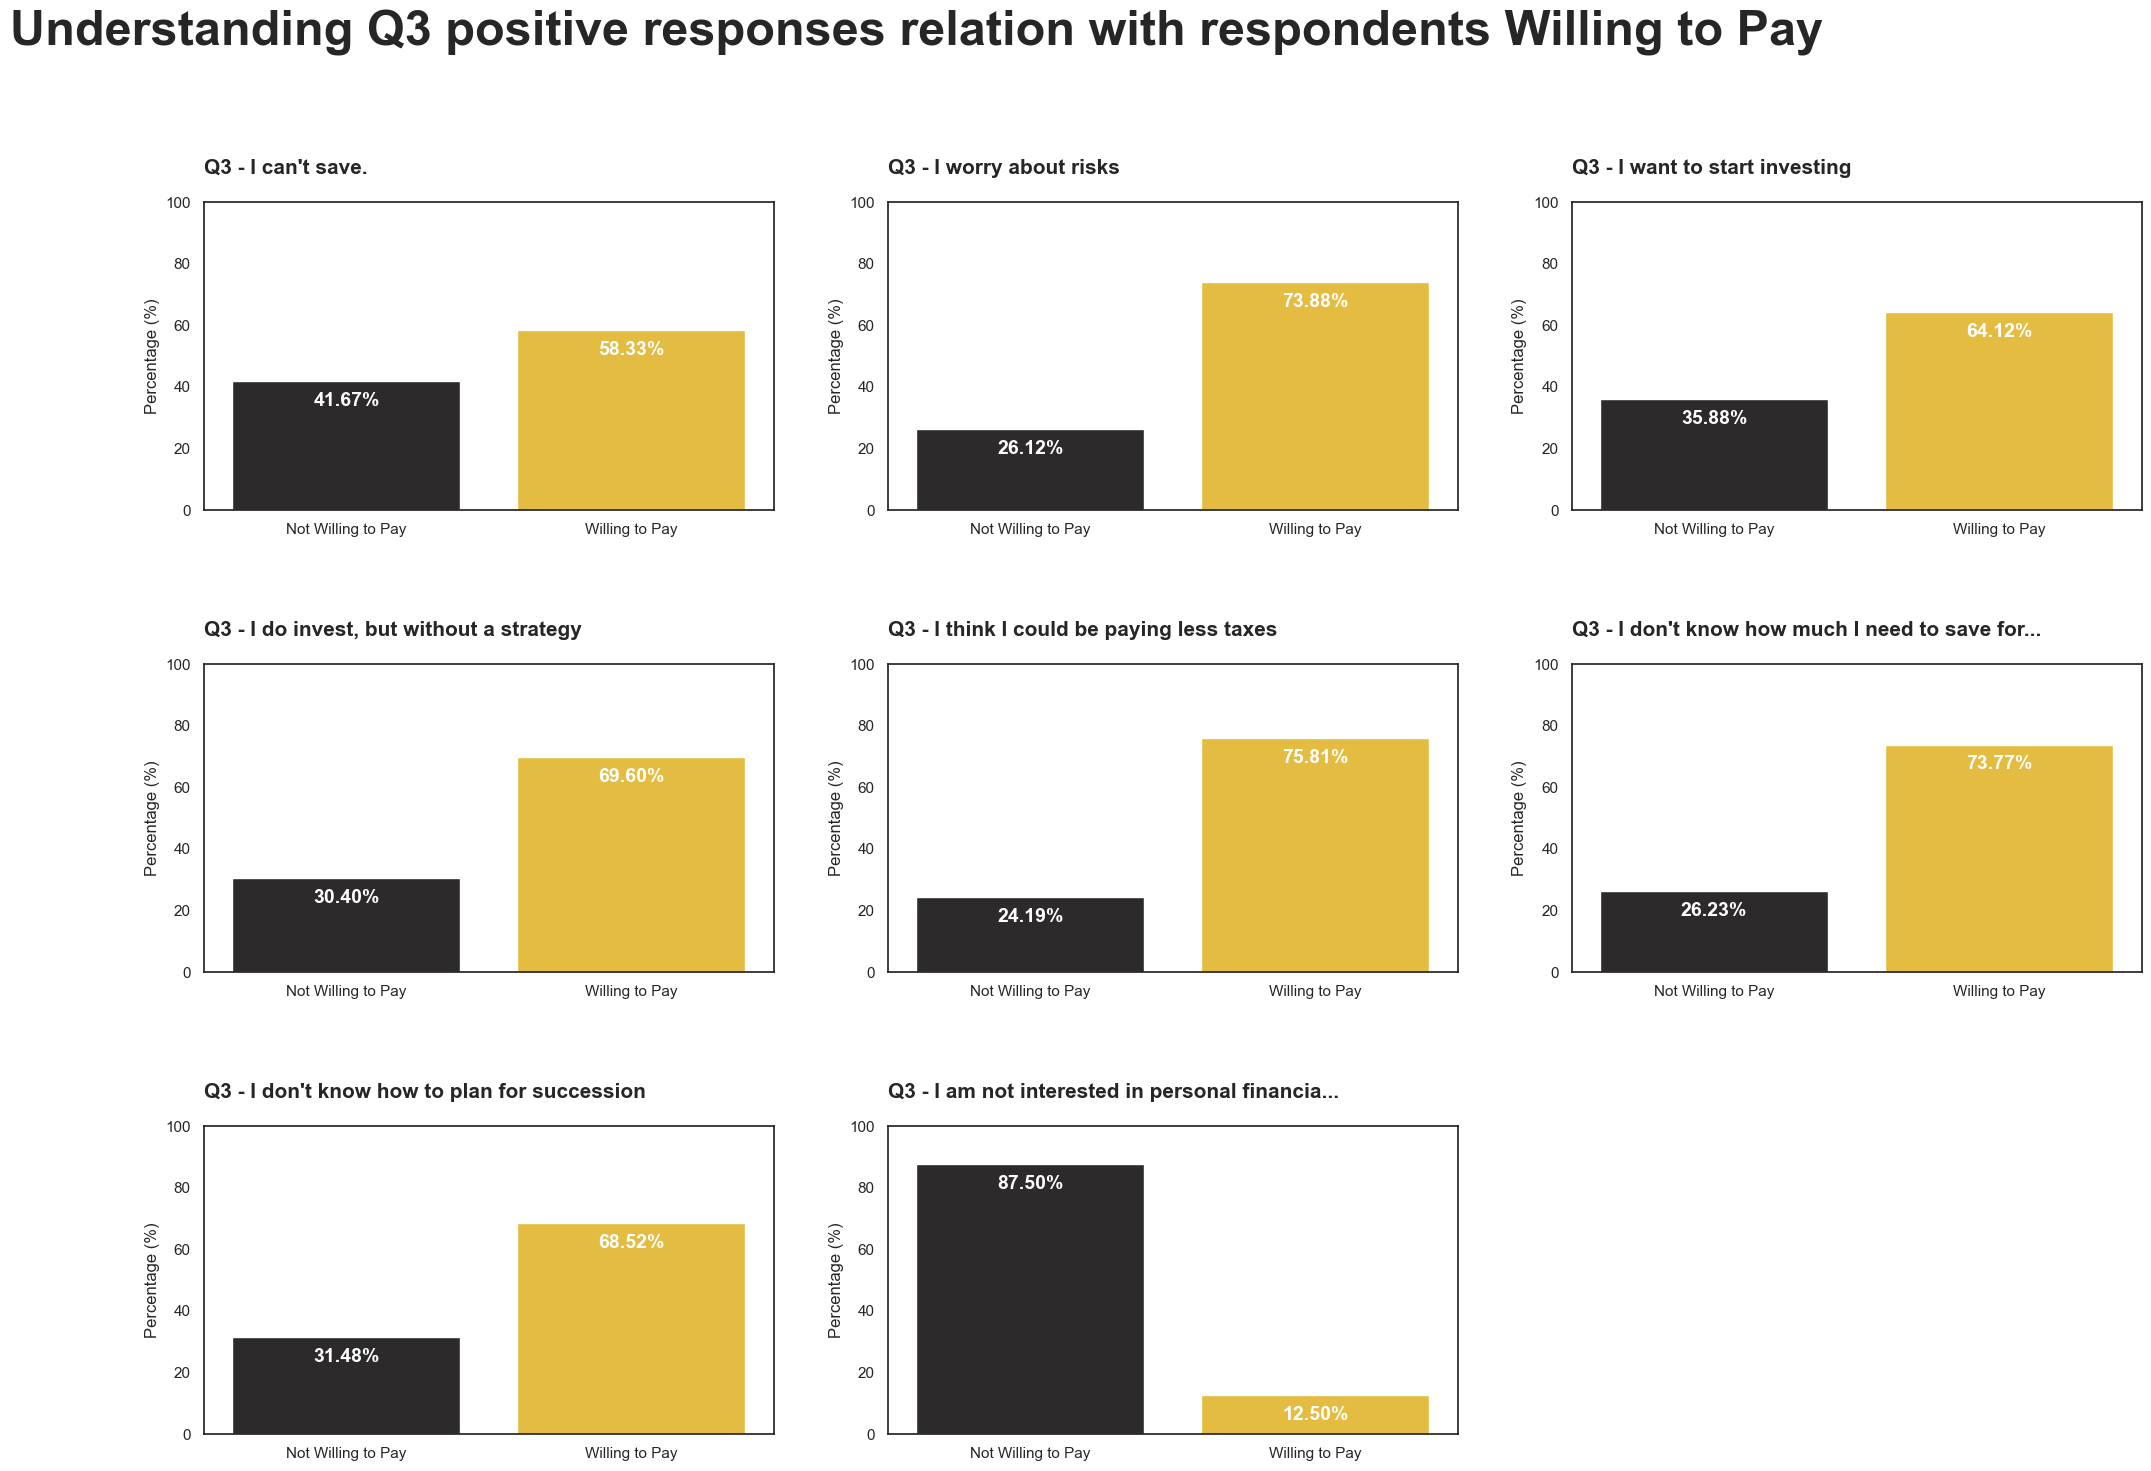

In [75]:
sns.set(rc = {'figure.figsize':(25,16)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Understanding Q3 positive responses relation with respondents Willing to Pay', fontsize=35, fontweight='bold', x = 0.41, y =1)
plt.subplots_adjust(hspace=0.5)

for n, col in enumerate(Q3_order):

    # Calculate the percentages
    willing_percentage = (data_translated.loc[data_translated[col] == 1, 'Willing to pay?'].sum() / len(data_translated.loc[data_translated[col] == 1])) * 100
    not_willing_percentage = 100 - willing_percentage

    # Create a DataFrame to hold the percentages
    percentage_data = pd.DataFrame({
        'Category': ['Not Willing to Pay', 'Willing to Pay'],
        'Percentage': [not_willing_percentage, willing_percentage]
    })

    # Plot the data
    ax = plt.subplot(3, 3,  1 + n)
    sns.barplot(x='Category', y='Percentage', data=percentage_data, palette=palette_value_willing_to_pay, ax = ax)

    # Add labels and title
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.xlabel('')
    truncated_title = (col[:45] + '...') if len(col) > 45 else col
    plt.title(f'{truncated_title}', fontdict={'fontsize': 15, 'fontweight': "bold"}, loc='left', pad=20)  
    plt.ylim(0, 100)  # Set y-axis limits to make it clear this is a percentage

    # Annotate the bars with the exact percentages
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width()/2, height - 8, f'{height:.2f}%', ha='center', fontsize=14, color='white', fontweight= 'bold')

plt.show()


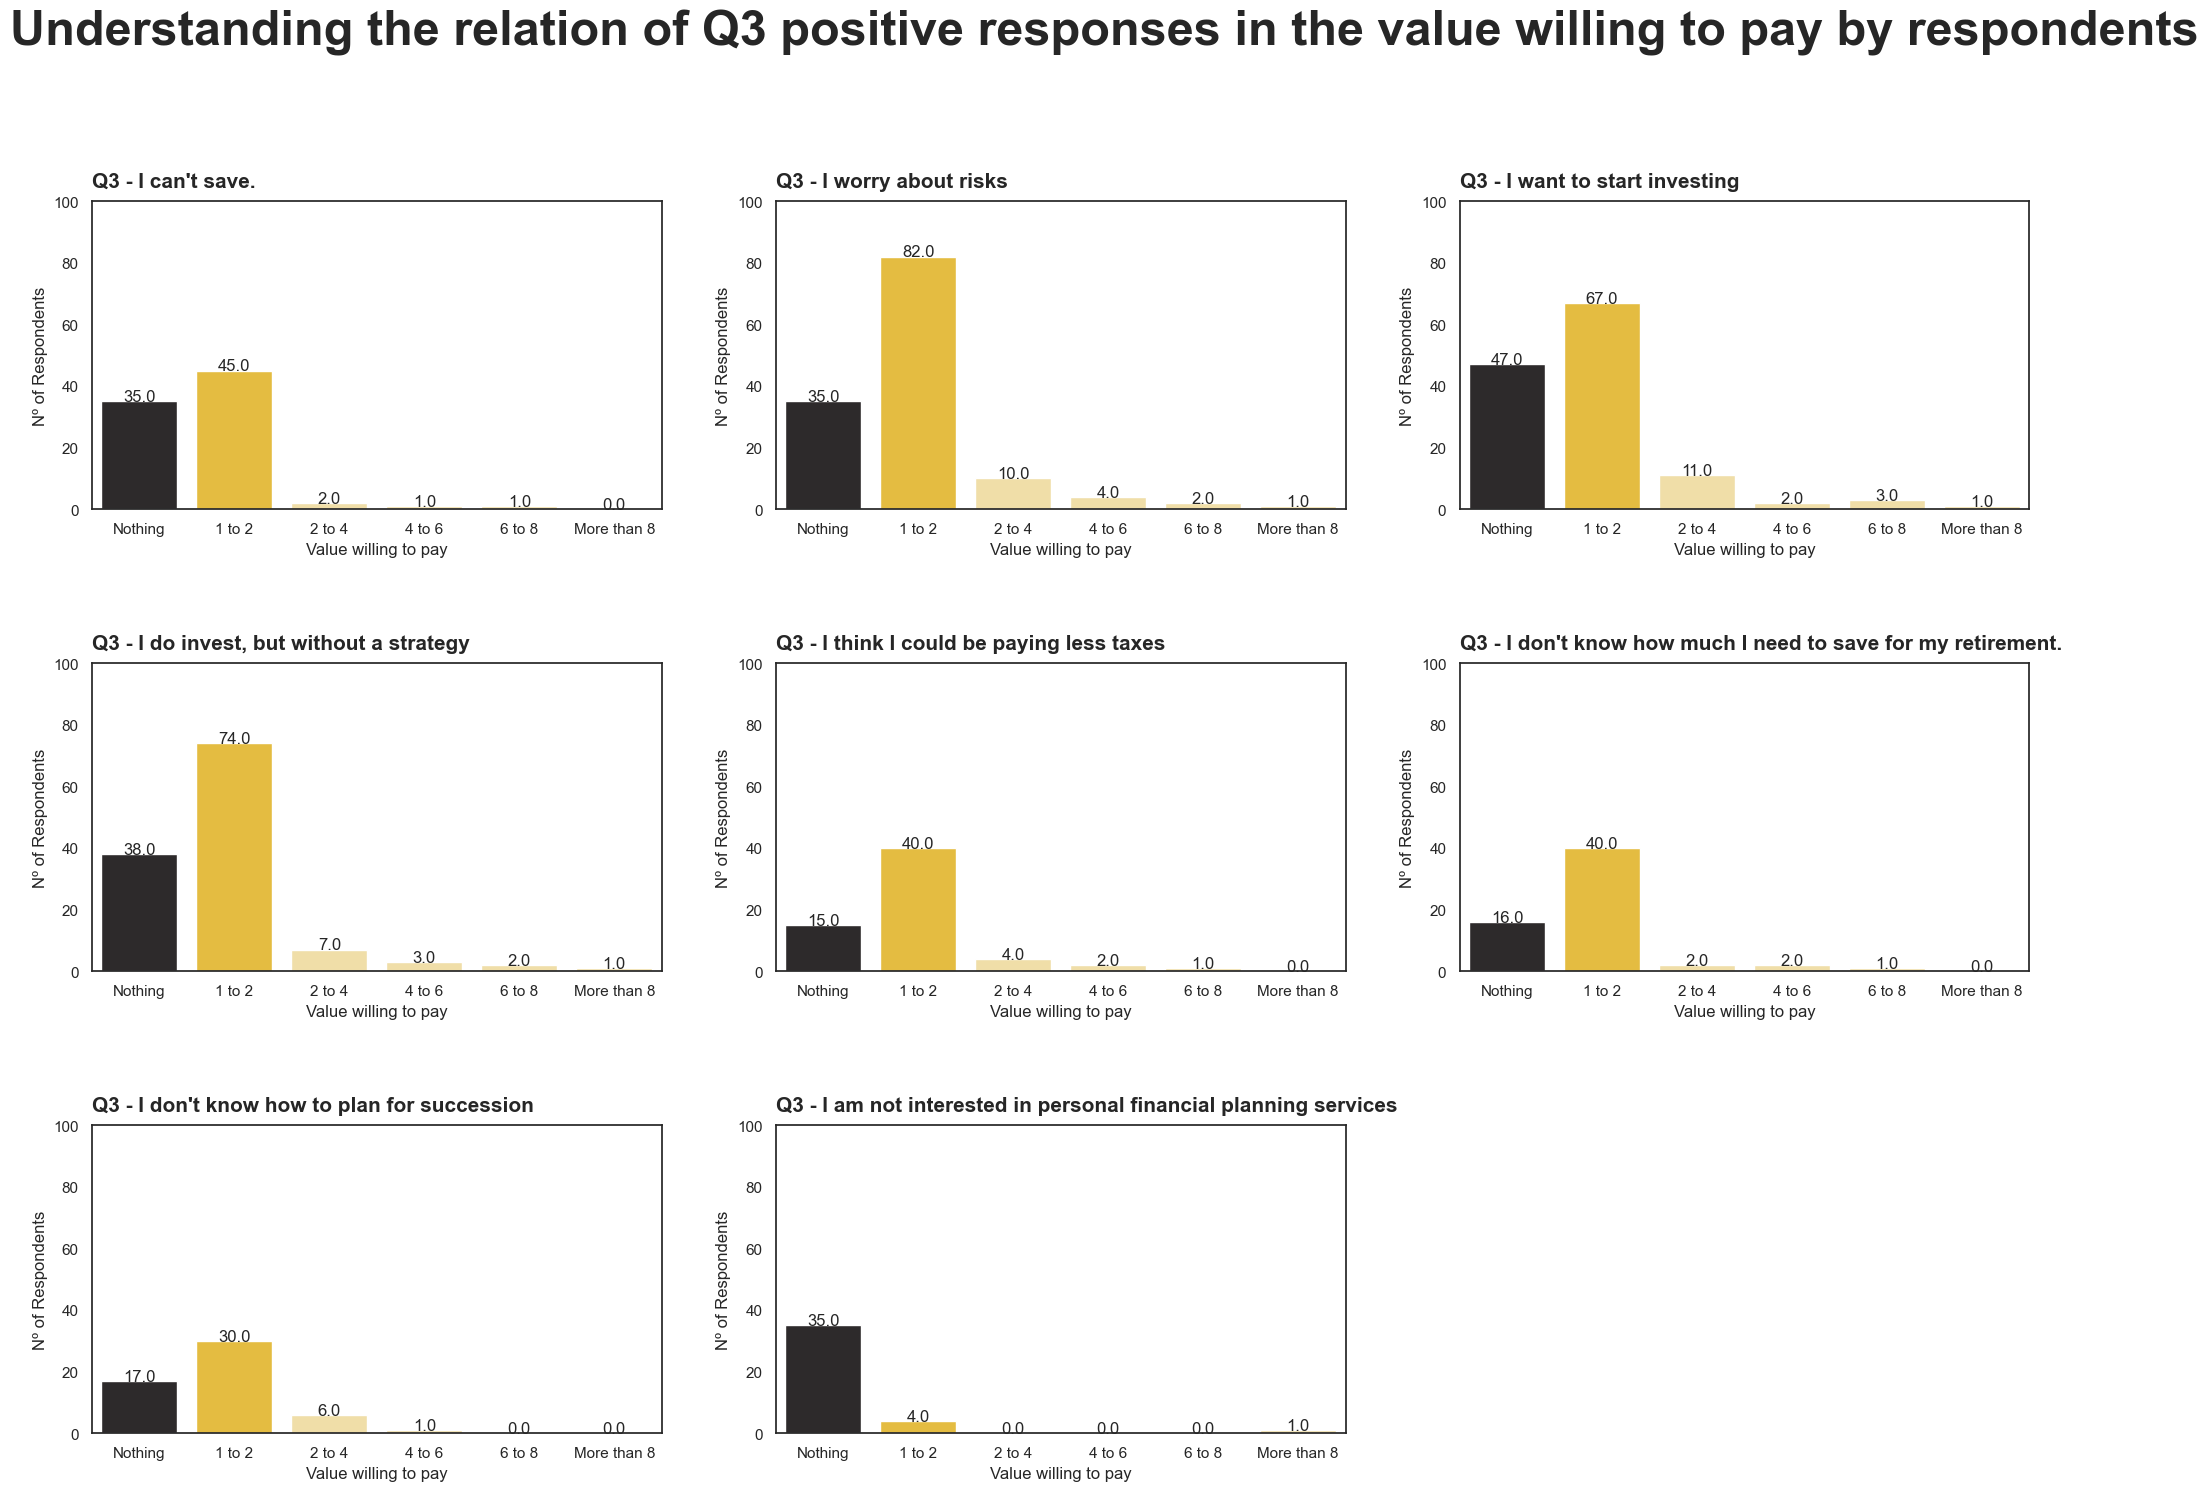

In [76]:
sns.set(rc = {'figure.figsize':(25,16)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Understanding the relation of Q3 positive responses in the value willing to pay by respondents', fontsize=35, fontweight='bold', x = 0.53, y =1)
plt.subplots_adjust(hspace=0.5)

data_translated['Q6 - Value willing to pay for a financial planning'] = pd.Categorical(data_translated['Q6 - Value willing to pay for a financial planning'], ordem_value_willing_to_pay)

for n, col in enumerate(Q3_order):

    ax = plt.subplot(3, 3,  1 + n)
    sns.countplot(data = data_translated.loc[data_translated[col] == 1], 
                    x = 'Q6 - Value willing to pay for a financial planning',
                    palette = palette_value_willing_to_pay, 
                    ax = ax)

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height, '{:1}'.format((height)), ha='center', size = 12)
                    
    plt.title(f'{col}', fontdict = {'fontsize' : 15, 'fontweight' : "bold"}, loc = 'left', pad = 10)  
    plt.ylabel('Nº of Respondents', fontsize = 12) 
    plt.xlabel('Value willing to pay', fontsize = 12)
    ax.set_ylim(0, 100)

plt.show()

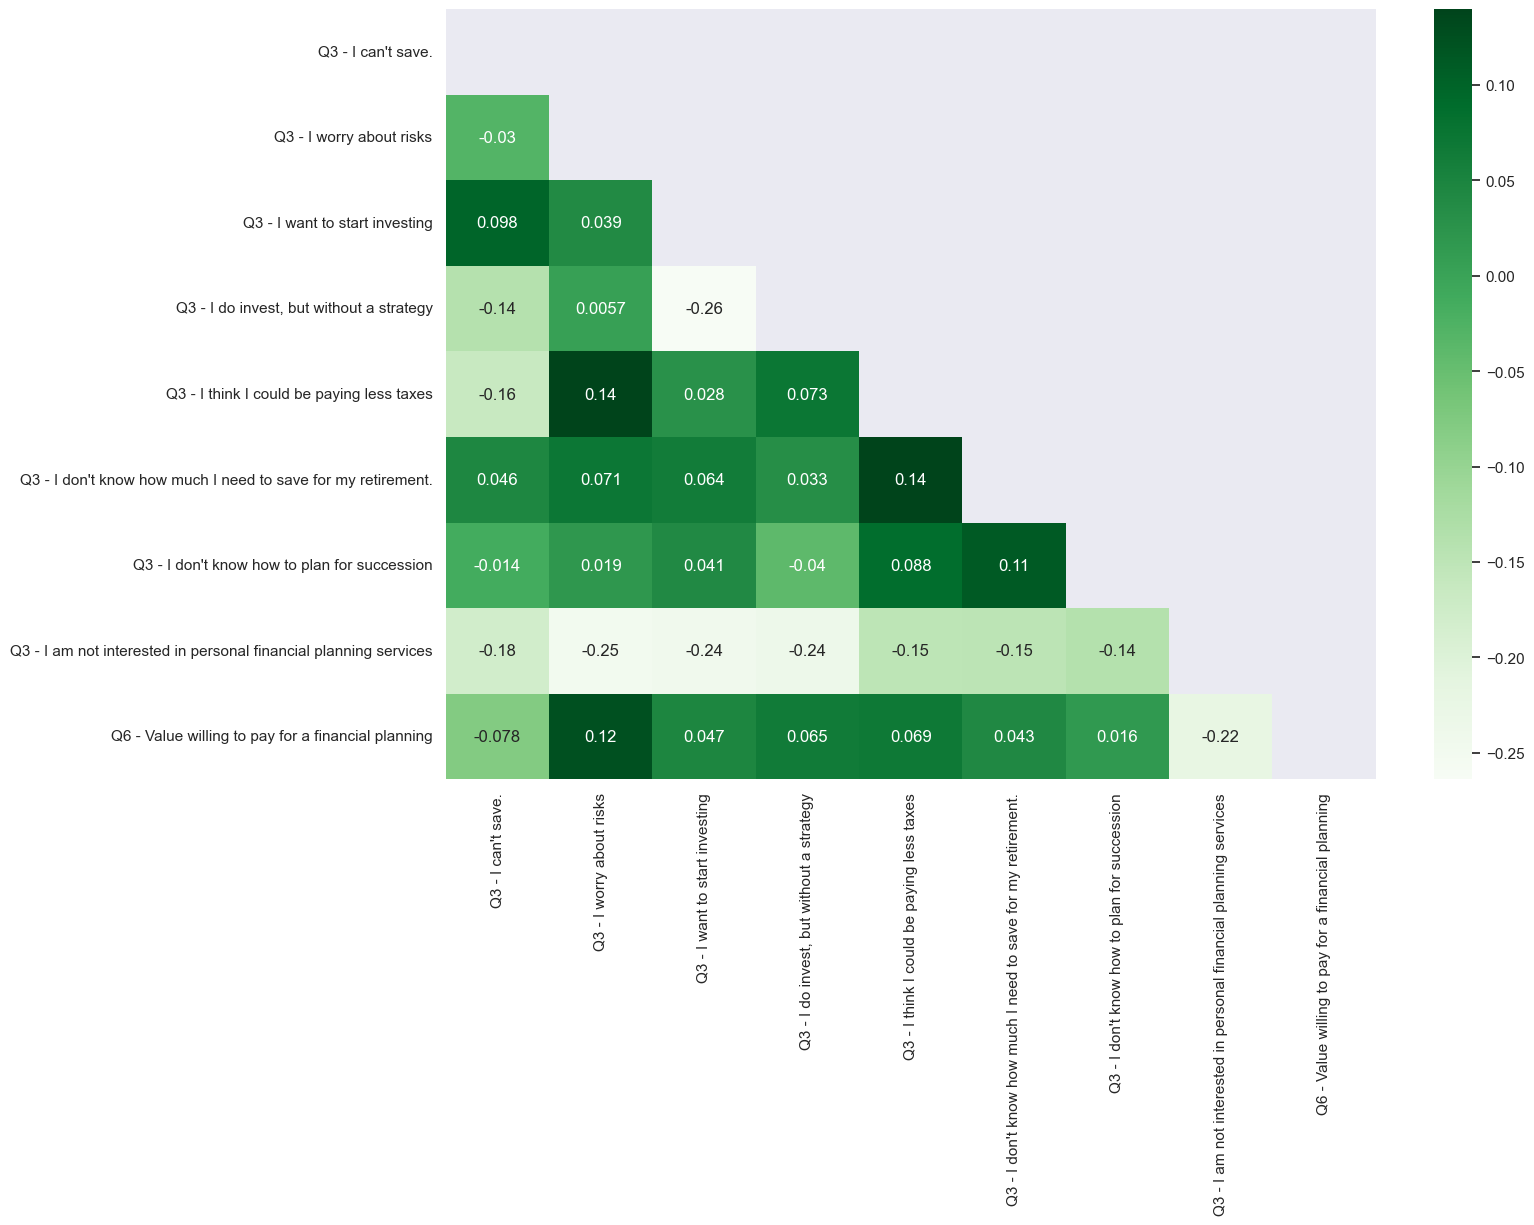

In [77]:
sns.set(rc = {'figure.figsize':(15,10)})

corr = data_encoded[[    
    'Q3 - I can\'t save.',
    'Q3 - I worry about risks',
    'Q3 - I want to start investing',
    'Q3 - I do invest, but without a strategy',
    'Q3 - I think I could be paying less taxes',
    'Q3 - I don\'t know how much I need to save for my retirement.',
    'Q3 - I don\'t know how to plan for succession',
    'Q3 - I am not interested in personal financial planning services',
    'Q6 - Value willing to pay for a financial planning'
    ]].corr()

mask = np.triu(np.ones_like(corr))

sns.heatmap(corr,annot=True, cmap="Greens", mask=mask)

plt.show()

#### **Q6 relation with Q4**

**Relation with Q4 Insights:**

- For most characteristics cited in Q4, the percentage of respondents willing to pay for financial planning services is relatively uniform, ranging from 58% to 75%. This consistency suggests that the important aspects for each respondent does not significantly differentiate their willingness to pay. 

- So we should keep in mind the most import aspects stated by the respondents in Q4, that we covered in Q4 analysis section. They being: Price and quality


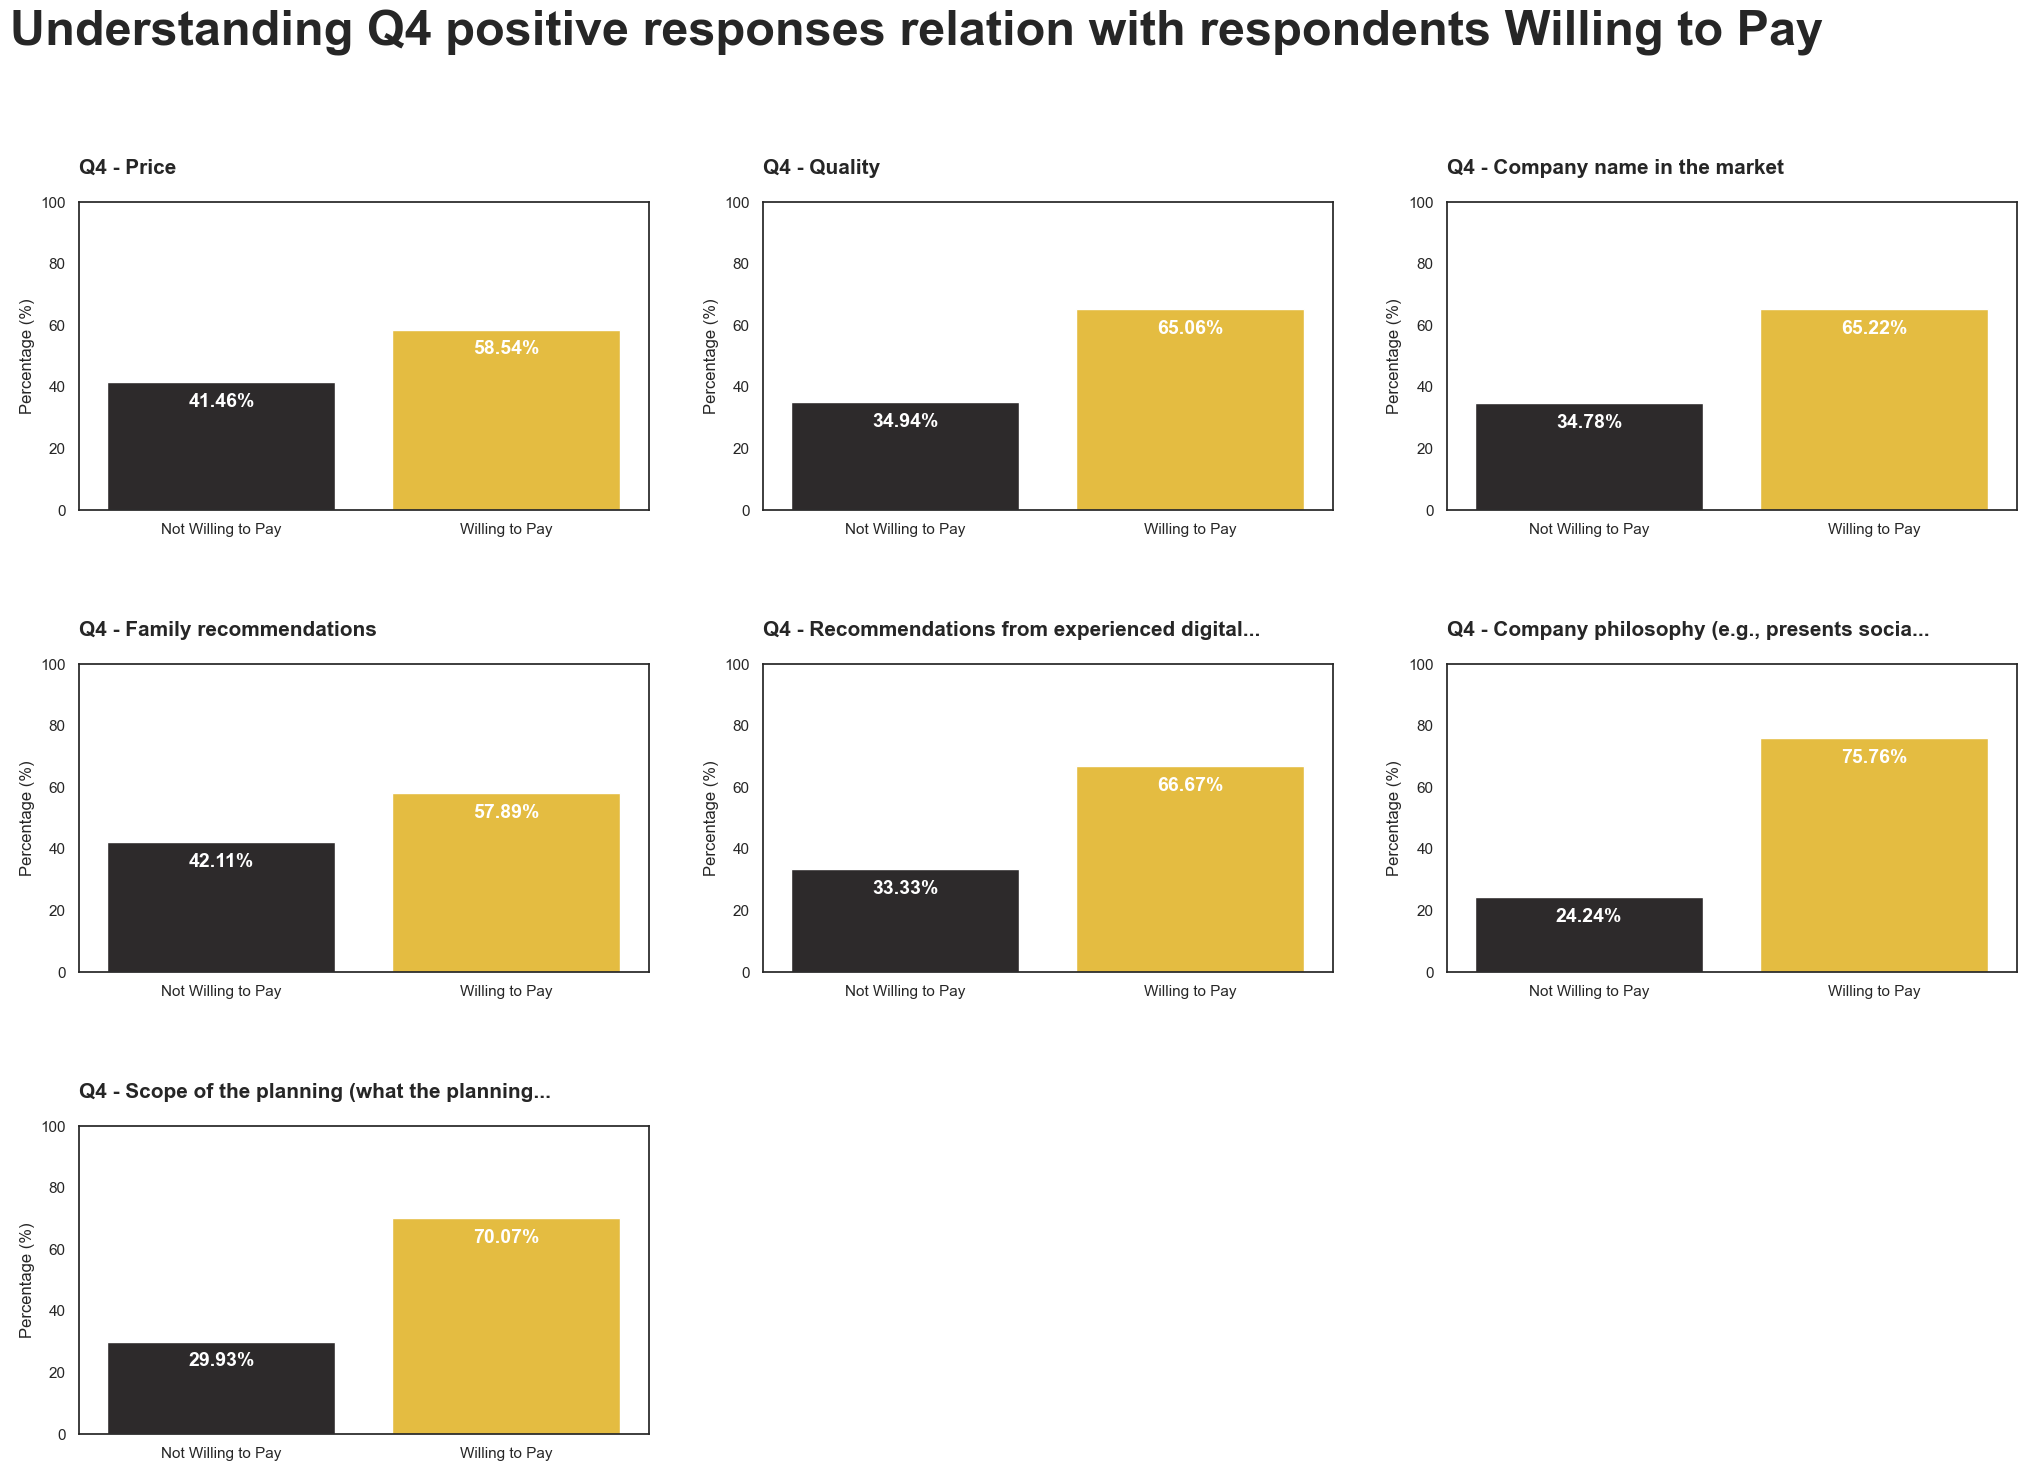

In [91]:
sns.set(rc = {'figure.figsize':(25,16)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Understanding Q4 positive responses relation with respondents Willing to Pay', fontsize=35, fontweight='bold', x = 0.46, y =1)
plt.subplots_adjust(hspace=0.5)

for n, col in enumerate(Q4_order):

    # Calculate the percentages
    willing_percentage = (data_translated.loc[data_translated[col] == 1, 'Willing to pay?'].sum() / len(data_translated.loc[data_translated[col] == 1])) * 100
    not_willing_percentage = 100 - willing_percentage

    # Create a DataFrame to hold the percentages
    percentage_data = pd.DataFrame({
        'Category': ['Not Willing to Pay', 'Willing to Pay'],
        'Percentage': [not_willing_percentage, willing_percentage]
    })

    # Plot the data
    ax = plt.subplot(3, 3,  1 + n)
    sns.barplot(x='Category', y='Percentage', data=percentage_data, palette=palette_value_willing_to_pay, ax = ax)

    # Add labels and title
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.xlabel('')
    truncated_title = (col[:45] + '...') if len(col) > 45 else col
    plt.title(f'{truncated_title}', fontdict={'fontsize': 15, 'fontweight': "bold"}, loc='left', pad=20)  
    plt.ylim(0, 100)  # Set y-axis limits to make it clear this is a percentage

    # Annotate the bars with the exact percentages
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width()/2, height - 8, f'{height:.2f}%', ha='center', fontsize=14, color='white', fontweight= 'bold')

plt.show()

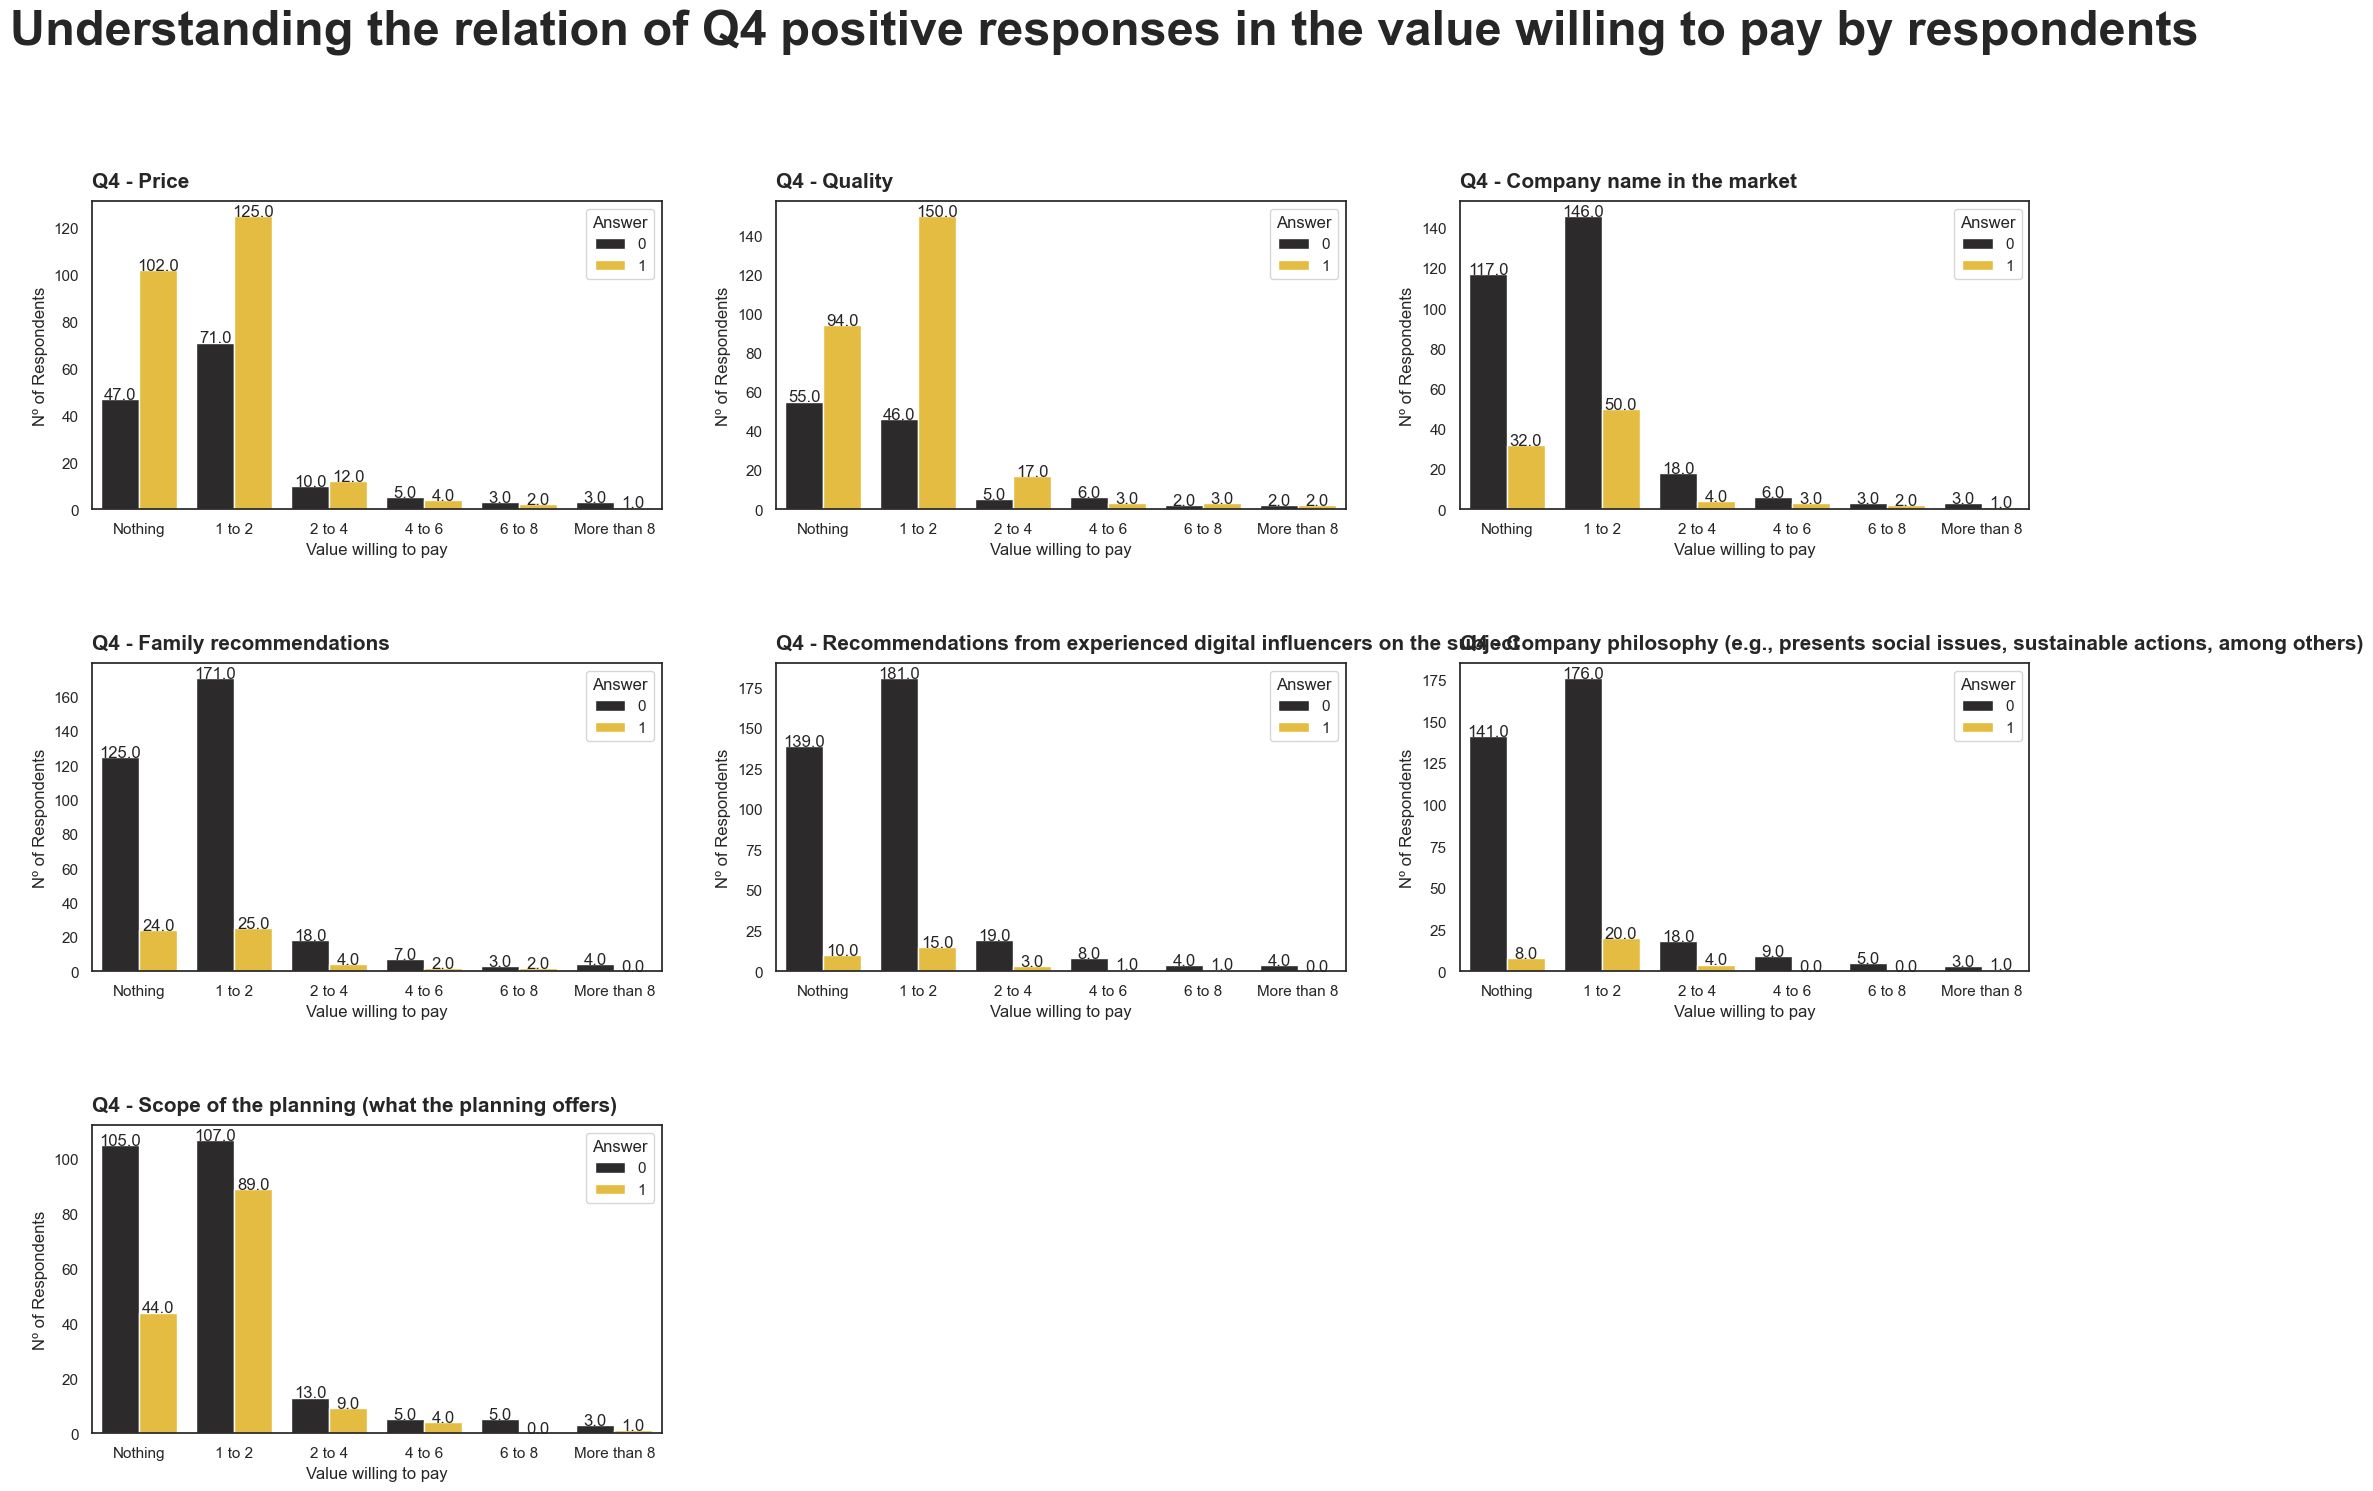

In [ ]:
sns.set(rc = {'figure.figsize':(25,16)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Understanding the relation of Q4 positive responses in the value willing to pay by respondents', fontsize=35, fontweight='bold', x = 0.53, y =1)
plt.subplots_adjust(hspace=0.5)

data_translated['Q6 - Value willing to pay for a financial planning'] = pd.Categorical(data_translated['Q6 - Value willing to pay for a financial planning'], ordem_value_willing_to_pay)

for n, col in enumerate(Q4_order):

    ax = plt.subplot(3, 3,  1 + n)
    sns.countplot(data = data_translated, 
                    x = 'Q6 - Value willing to pay for a financial planning', 
                    hue = col,
                    palette = palette_value_willing_to_pay, 
                    ax = ax)

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height, '{:1}'.format((height)), ha='center', size = 12)
                    
    plt.title(f'{col}', fontdict = {'fontsize' : 15, 'fontweight' : "bold"}, loc = 'left', pad = 10)  
    plt.ylabel('Nº of Respondents', fontsize = 12) 
    plt.xlabel('Value willing to pay', fontsize = 12)
    plt.legend(title='Answer', loc='upper right', labels = [0, 1])

plt.show()

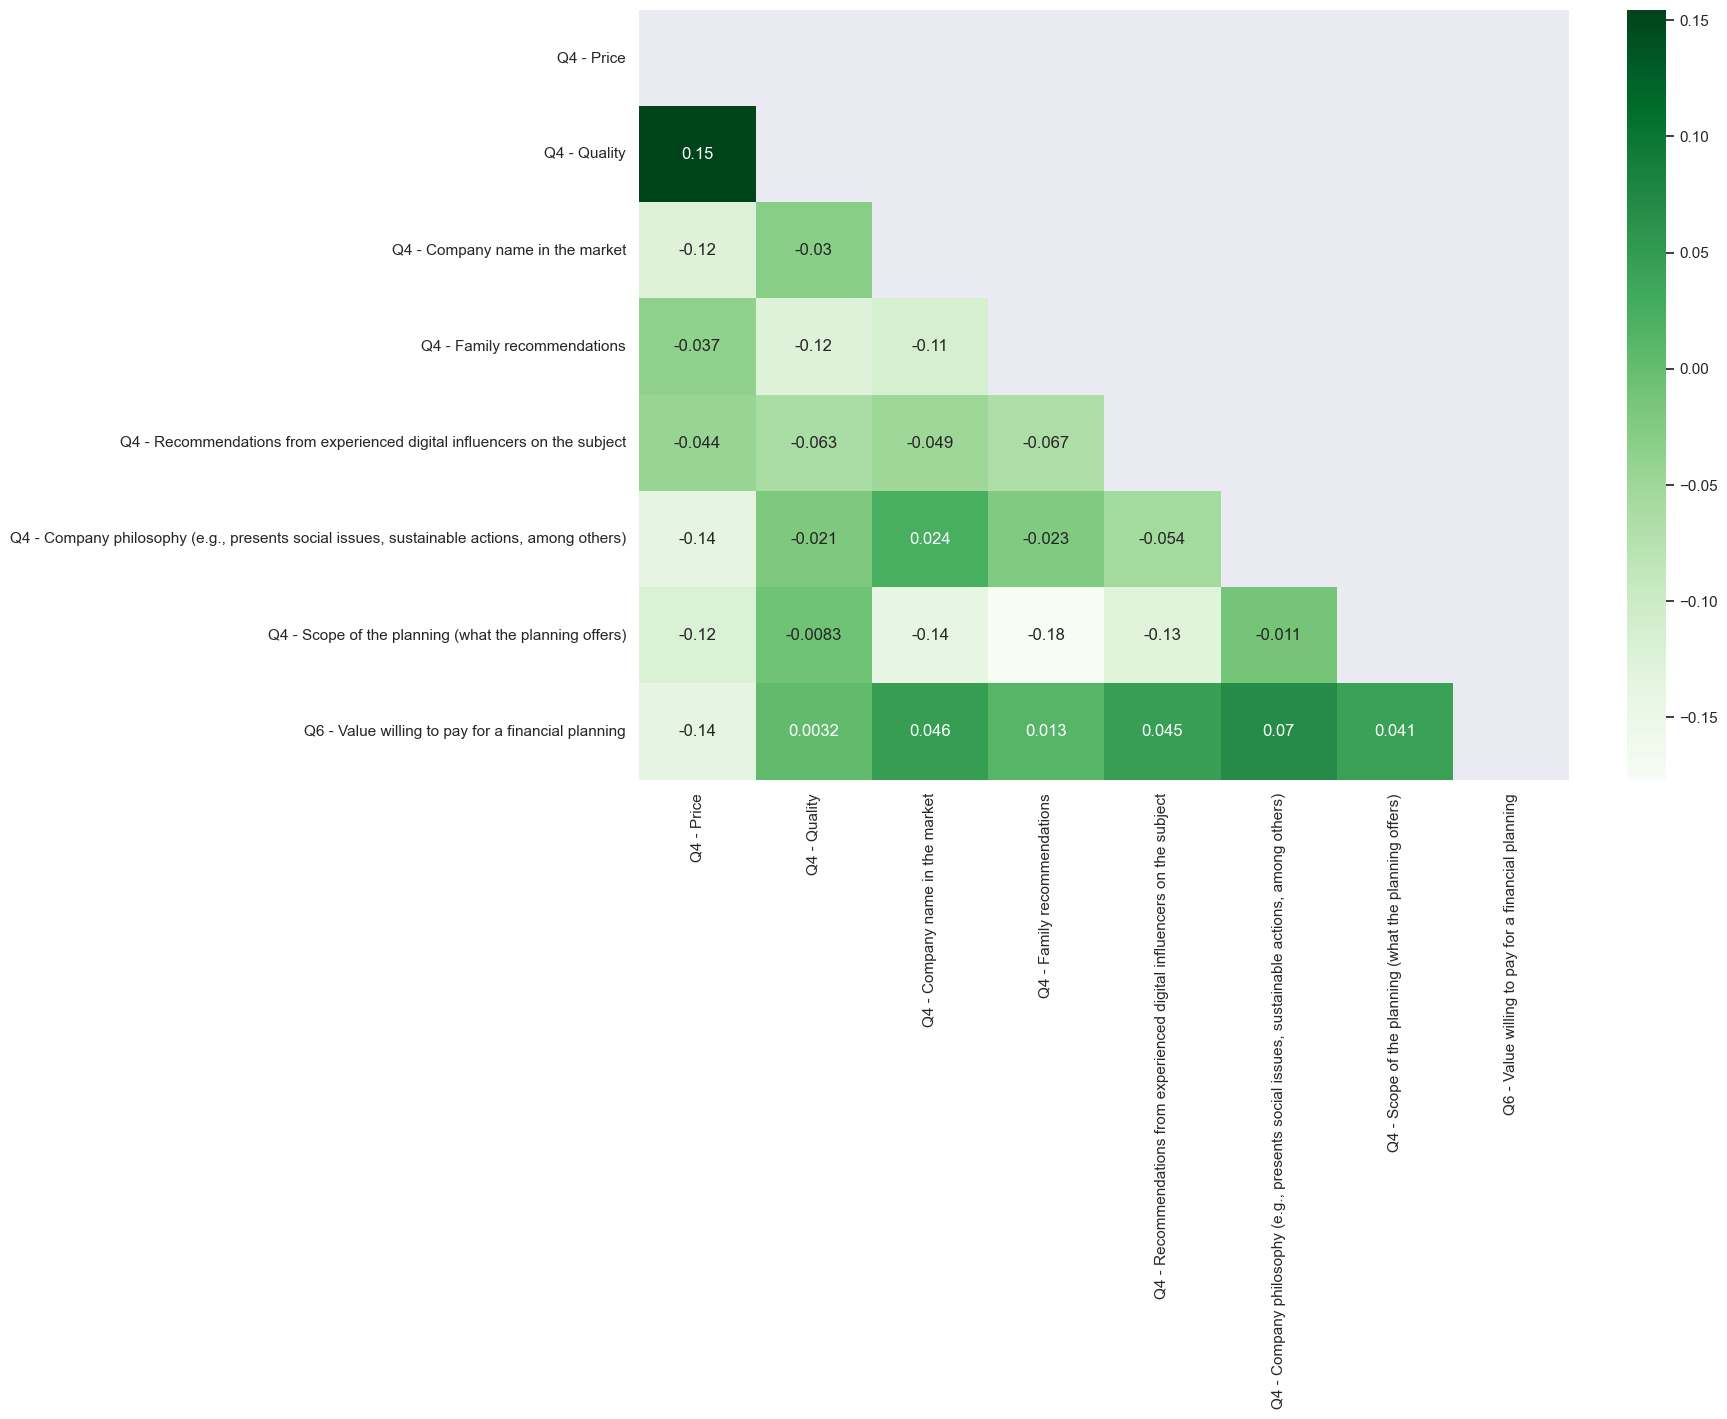

In [ ]:
sns.set(rc = {'figure.figsize':(15,10)})

corr = data_encoded[[    
    'Q4 - Price',
    'Q4 - Quality',
    'Q4 - Company name in the market',
    'Q4 - Family recommendations',
    'Q4 - Recommendations from experienced digital influencers on the subject',
    'Q4 - Company philosophy (e.g., presents social issues, sustainable actions, among others)',
    'Q4 - Scope of the planning (what the planning offers)', 'Q6 - Value willing to pay for a financial planning'
    ]].corr()

mask = np.triu(np.ones_like(corr))

sns.heatmap(corr,annot=True, cmap="Greens", mask=mask)
plt.show()

#### **Q6 relation with Q5**

**Relation with Q5 Insights:**

- For most reasons cited in Q5, the percentage of respondents willing to pay for financial planning services is relatively uniform, ranging from 53% to 68%. This consistency suggests that what respondents believe to need does not significantly differentiate their willingness to pay. 

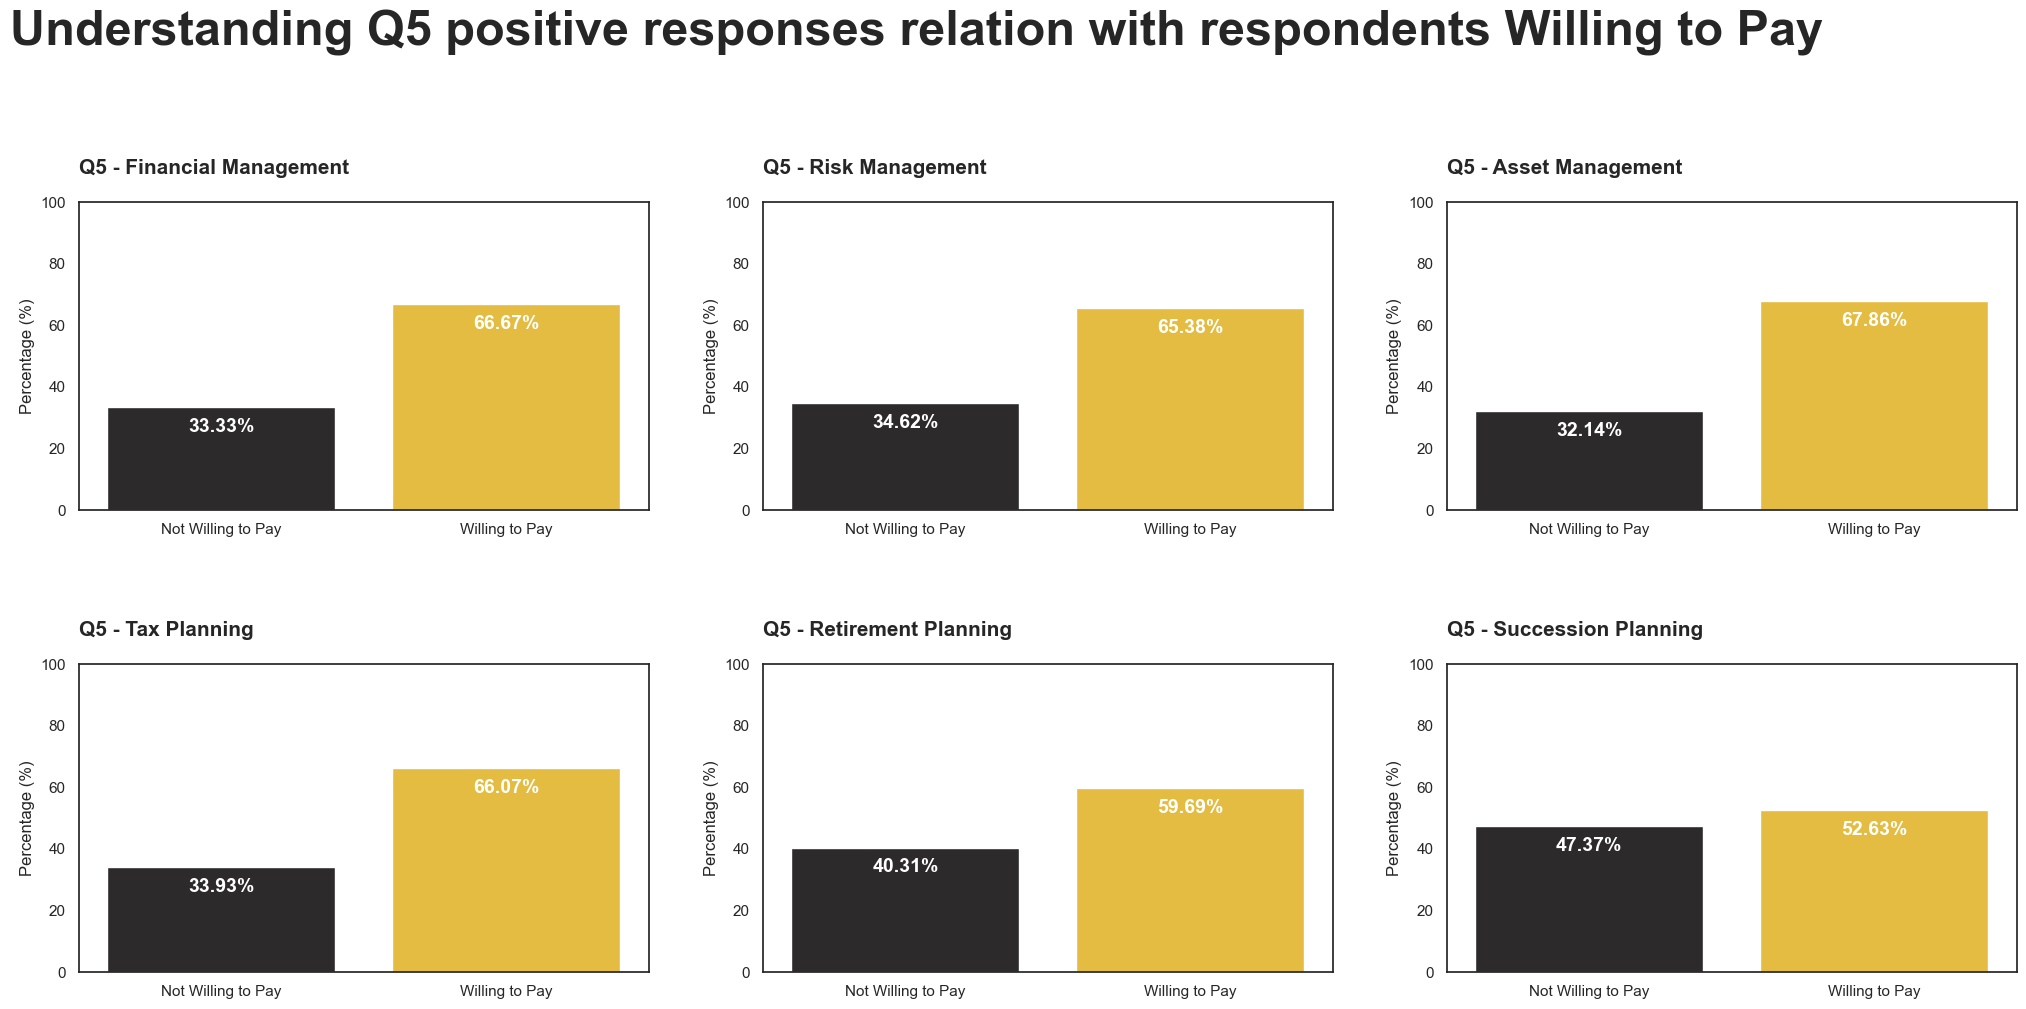

In [ ]:
sns.set(rc = {'figure.figsize':(25,16)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Understanding Q5 positive responses relation with respondents Willing to Pay', fontsize=35, fontweight='bold', x = 0.46, y =1)
plt.subplots_adjust(hspace=0.5)

for n, col in enumerate(Q5_order):

    # Calculate the percentages
    willing_percentage = (data_translated.loc[data_translated[col] == 1, 'Willing to pay?'].sum() / len(data_translated.loc[data_translated[col] == 1])) * 100
    not_willing_percentage = 100 - willing_percentage

    # Create a DataFrame to hold the percentages
    percentage_data = pd.DataFrame({
        'Category': ['Not Willing to Pay', 'Willing to Pay'],
        'Percentage': [not_willing_percentage, willing_percentage]
    })

    # Plot the data
    ax = plt.subplot(3, 3,  1 + n)
    sns.barplot(x='Category', y='Percentage', data=percentage_data, palette=palette_value_willing_to_pay, ax = ax)

    # Add labels and title
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.xlabel('')
    truncated_title = (col[:45] + '...') if len(col) > 45 else col
    plt.title(f'{truncated_title}', fontdict={'fontsize': 15, 'fontweight': "bold"}, loc='left', pad=20)  
    plt.ylim(0, 100)  # Set y-axis limits to make it clear this is a percentage

    # Annotate the bars with the exact percentages
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width()/2, height - 8, f'{height:.2f}%', ha='center', fontsize=14, color='white', fontweight= 'bold')

plt.show()

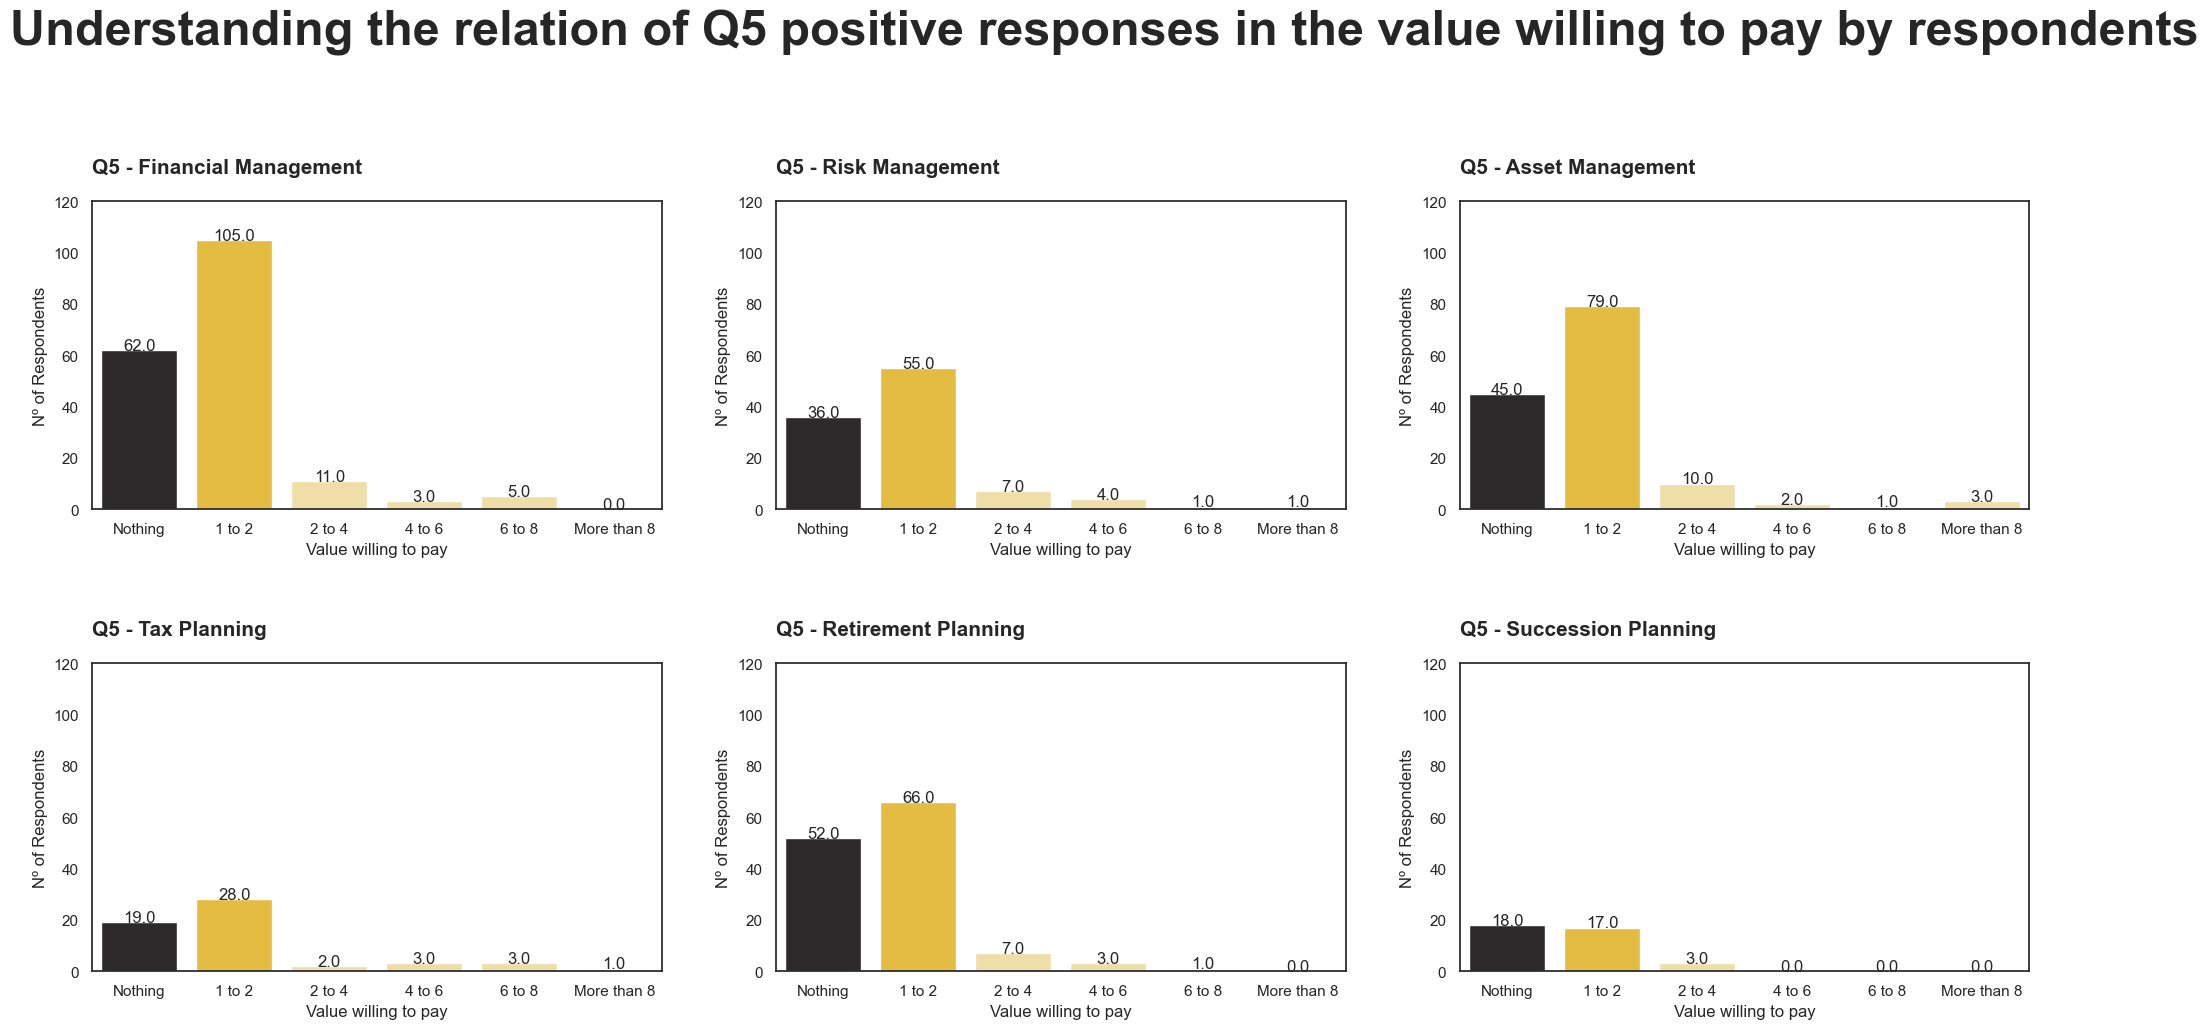

In [ ]:
sns.set(rc = {'figure.figsize':(25,16)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Understanding the relation of Q5 positive responses in the value willing to pay by respondents', fontsize=35, fontweight='bold', x = 0.53, y =1)
plt.subplots_adjust(hspace=0.5)

data_translated['Q6 - Value willing to pay for a financial planning'] = pd.Categorical(data_translated['Q6 - Value willing to pay for a financial planning'], ordem_value_willing_to_pay)

for n, col in enumerate(Q5_order):

    ax = plt.subplot(3, 3,  1 + n)
    sns.countplot(data = data_translated.loc[data_translated[col] == 1], 
                    x = 'Q6 - Value willing to pay for a financial planning',
                    palette = palette_value_willing_to_pay, 
                    ax = ax)

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height, '{:1}'.format((height)), ha='center', size = 12)
                    
    plt.title(f'{col}', fontdict = {'fontsize' : 15, 'fontweight' : "bold"}, loc = 'left', pad = 20)  
    plt.ylabel('Nº of Respondents', fontsize = 12) 
    plt.xlabel('Value willing to pay', fontsize = 12)
    ax.set_ylim(0, 120)

plt.show()

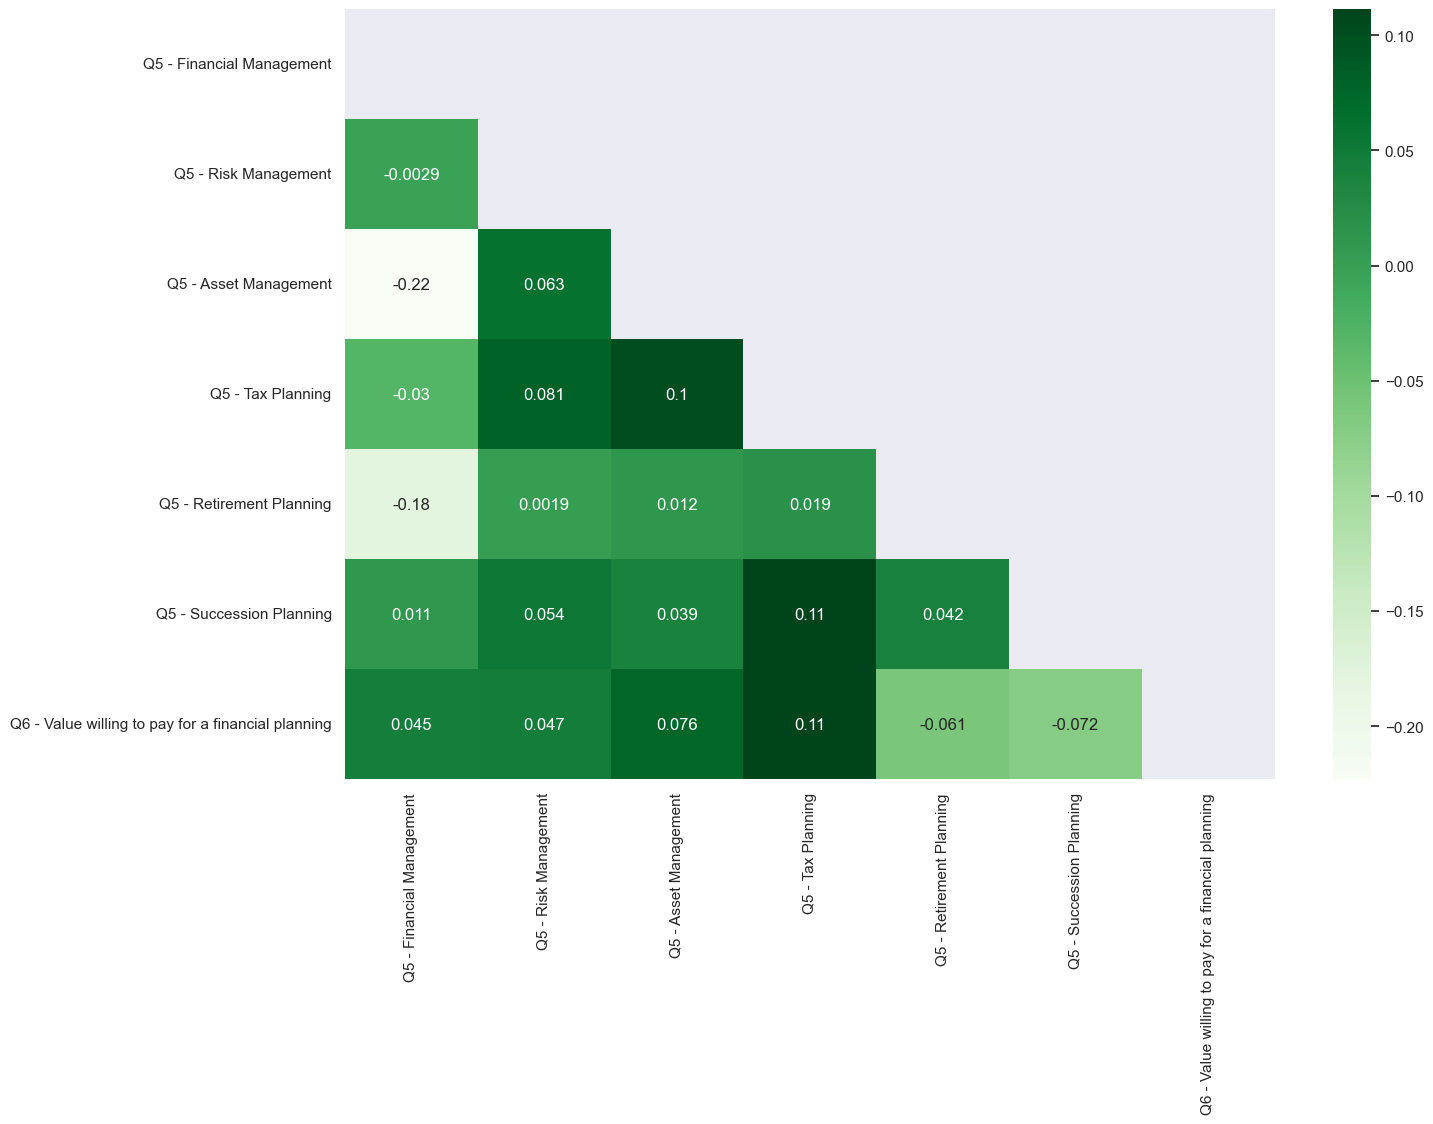

In [ ]:
sns.set(rc = {'figure.figsize':(15,10)})

corr = data_encoded[[
    'Q5 - Financial Management',  
    'Q5 - Risk Management', 
    'Q5 - Asset Management', 
    'Q5 - Tax Planning', 
    'Q5 - Retirement Planning', 
    'Q5 - Succession Planning',
    'Q6 - Value willing to pay for a financial planning'
    ]].corr()

mask = np.triu(np.ones_like(corr))

sns.heatmap(corr,annot=True, cmap="Greens", mask=mask)
plt.show()

## **Understanding the respondents willingness to learn (Question 7)**


*Question 7: How willing would you be to learn about your personal Financial Plan enough to understand and execute it more easily and confidently?*

| Disposition                                                                                     |
|-------------------------------------------------------------------------------------------------|
| Great willingness                                                           |
| Medium willingness                                                         |
| Only what is strictly necessary                             |
| Would trust the recommendations and proceed with confidence, even without fully understanding them |


Understanding respondents' willingness to learn about personal financial planning is crucial for designing effective educational programs and providing tailored financial advice. By identifying these different preferences, financial service providers can offer appropriate learning resources, personalized guidance, and support to help clients make informed financial decisions that align with their comfort levels and preferences. Educating clients and fostering financial literacy can lead to better financial outcomes and a more confident and empowered client base.


### **Analysing Q7 Answers**

In [ ]:
willigness_to_learn_order = [
    'Would trust the recommendations',
    'Only what is strictly necessary.',
    'Medium willingness.',
    'Great willingness.'
]

#### **Q7- General**

**General Insights**

72.75% of the respondents have a medium to high willigness to learn

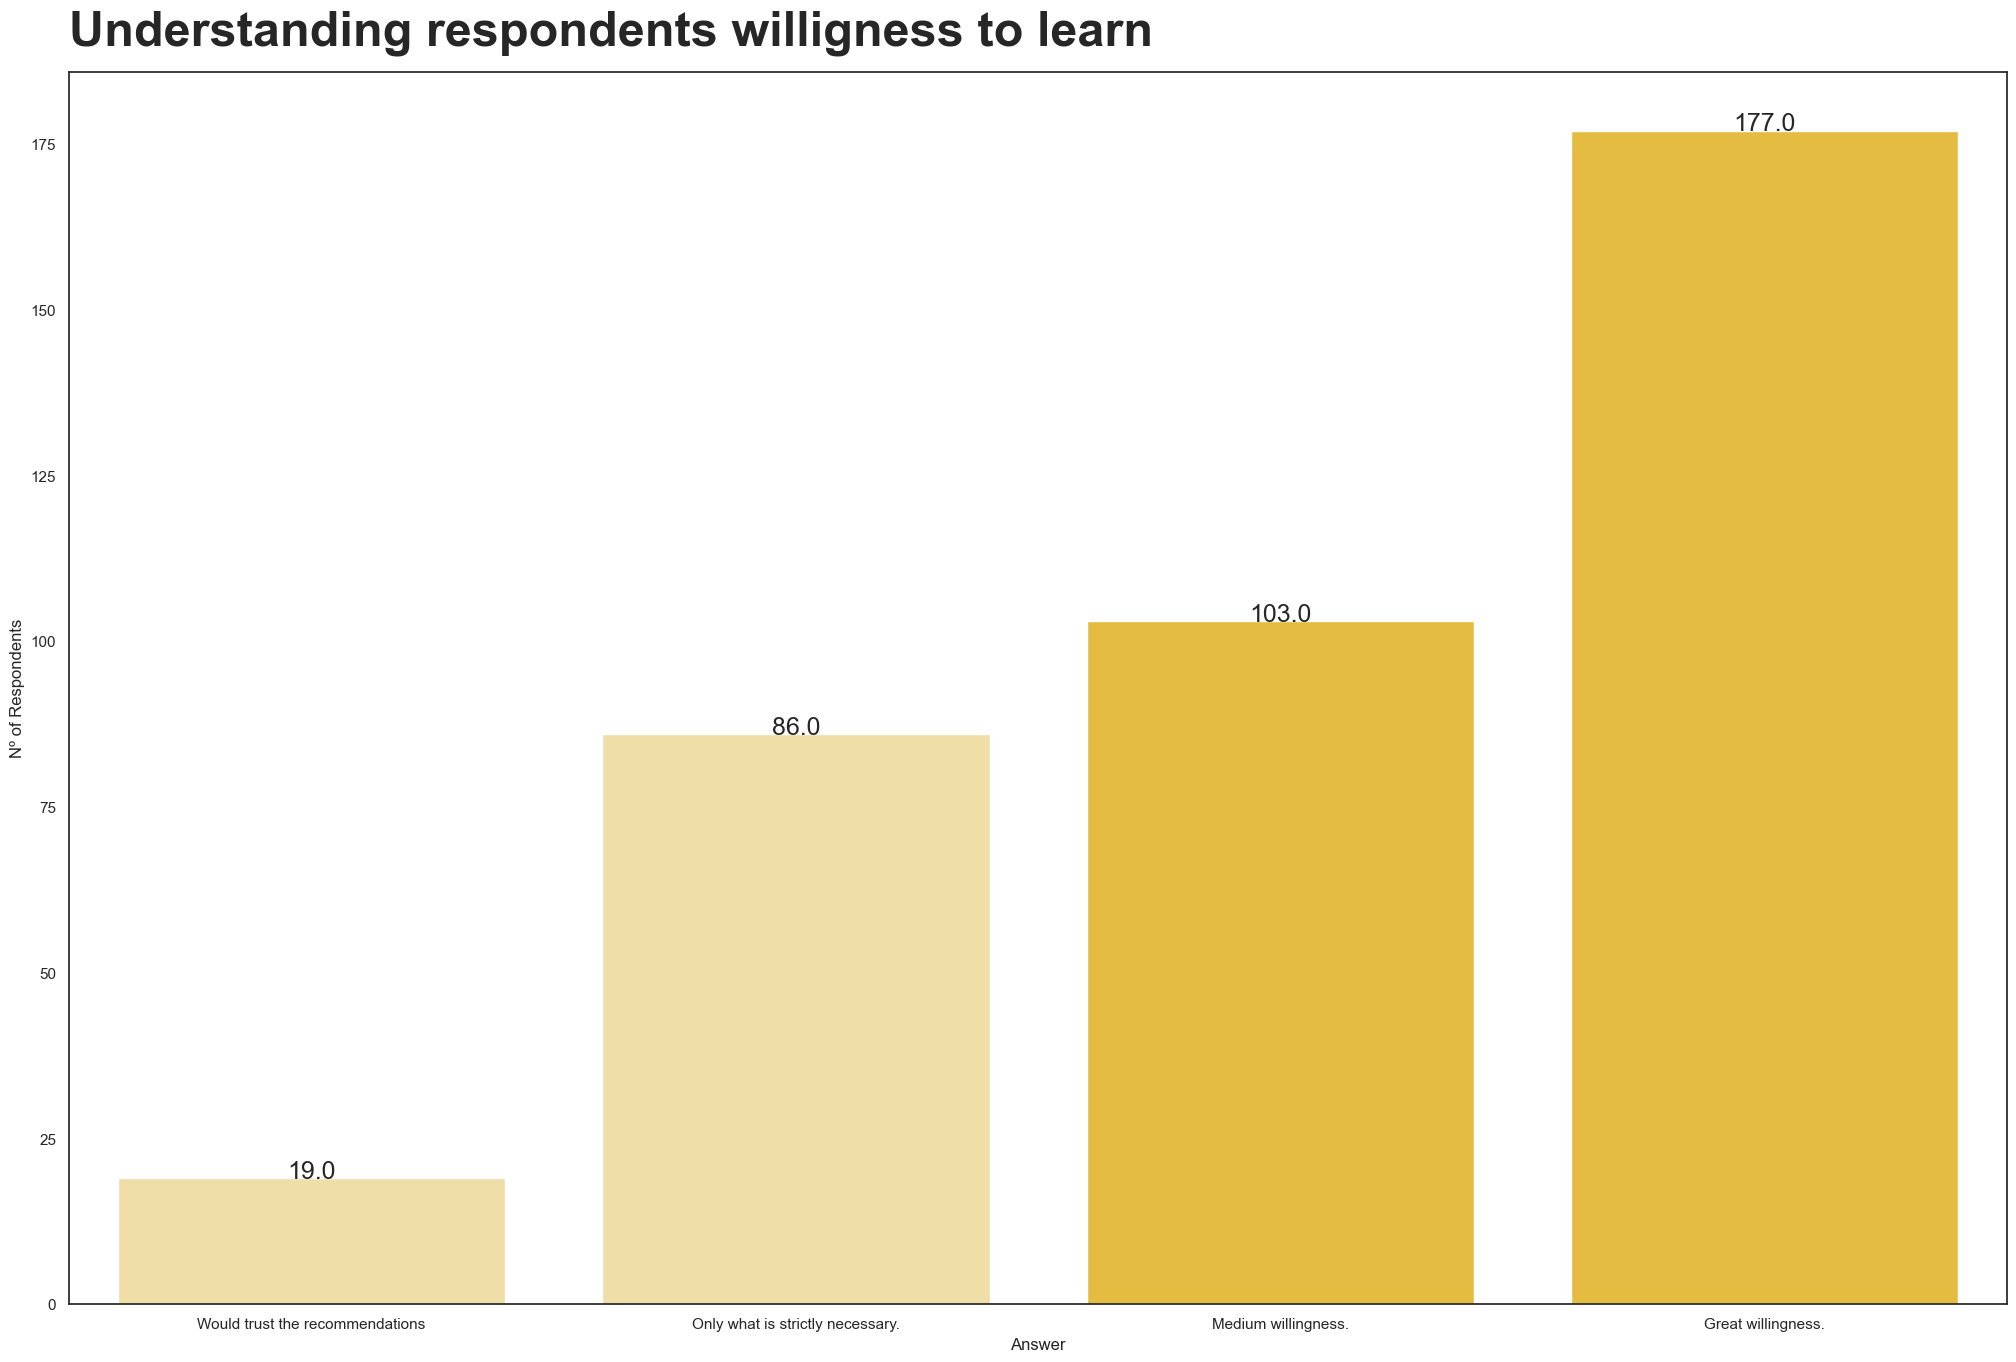

In [ ]:
sns.set(rc = {'figure.figsize':(25,16)})
sns.set_style("white")  # Set the plot background to white

data_translated['Q7 - Client\'s disposition'] = pd.Categorical(data_translated['Q7 - Client\'s disposition'], willigness_to_learn_order)

ax = sns.countplot(data = data_translated, 
                    x = 'Q7 - Client\'s disposition', 
                    palette=palette_willigness_to_learn)
                    
plt.title('Understanding respondents willigness to learn', fontdict = {'fontsize' : 35, 'fontweight' : "bold"}, loc = 'left', pad = 20)  
plt.ylabel('Nº of Respondents', fontsize = 12) 
plt.xlabel('Answer', fontsize = 12)

    # Adicionando rotúlo de data_translated do Nº de clientes
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
        height,
        '{:1}'.format((height)),
        ha='center',
        size = 18)

plt.show()

#### **Q7 - By Gender**

**Gender Insights**

- The gender of respondents seems to not be related to their willigness to learn

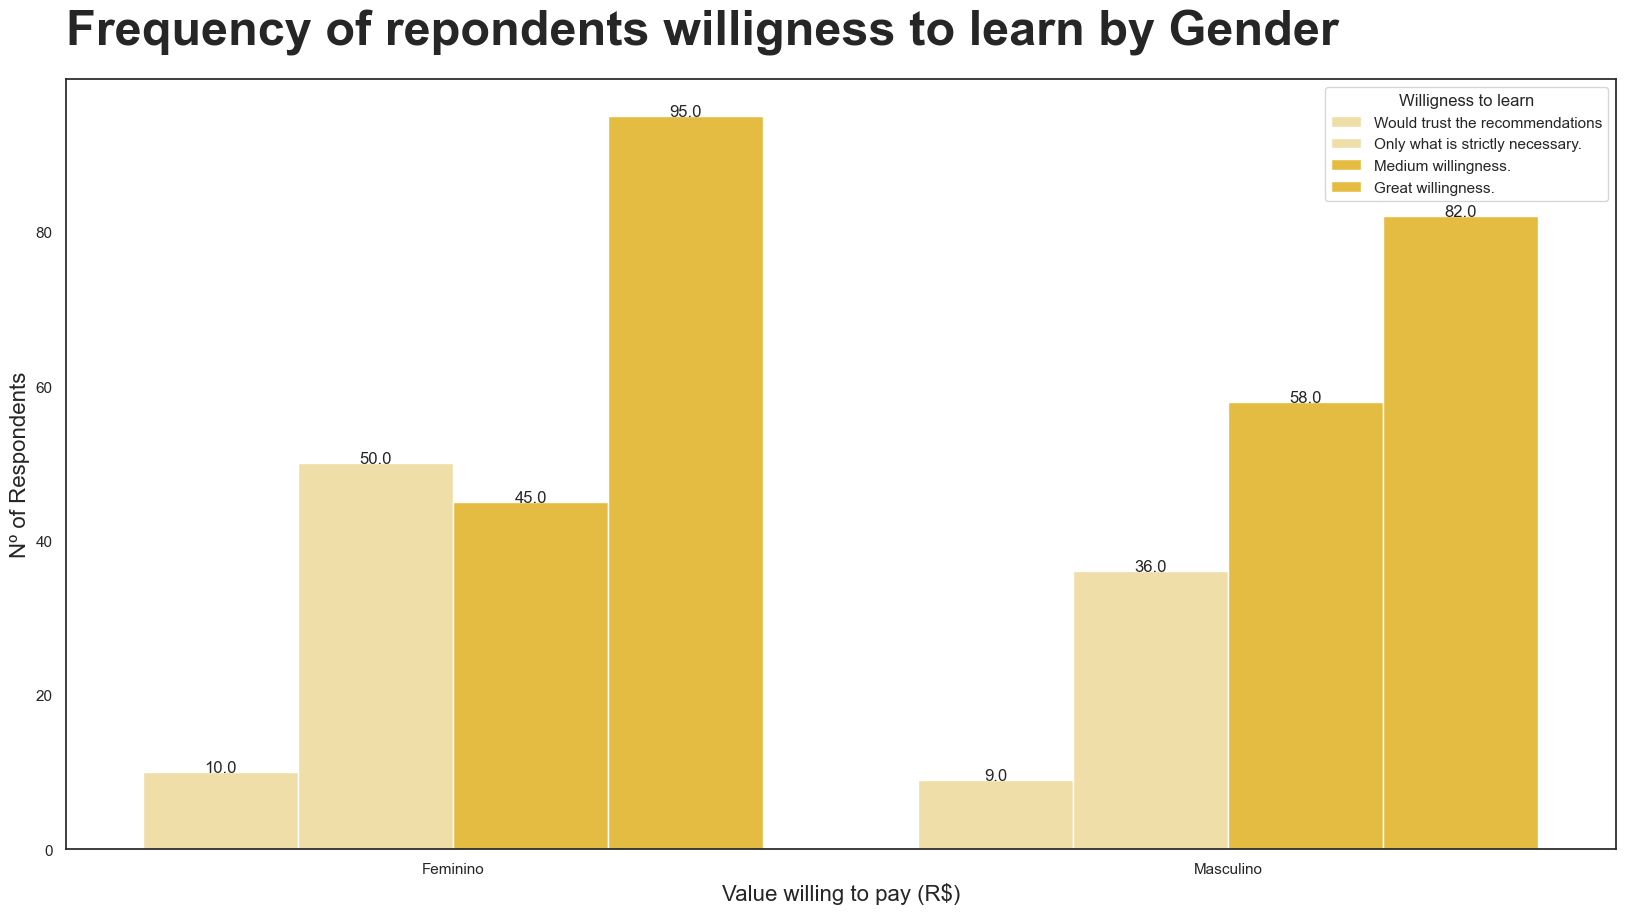

In [ ]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.set_style("white")  # Set the plot background to white

ax = sns.countplot(data = data_translated, 
                x = 'Q9 - Gender', 
                hue = 'Q7 - Client\'s disposition',
                palette = palette_willigness_to_learn)     


plt.title(f'Frequency of repondents willigness to learn by Gender', fontdict = {'fontsize' : 35, 'fontweight' : "bold"}, loc = 'left', pad = 25) 
plt.ylabel('Nº of Respondents', fontsize = 16) 
plt.xlabel('Value willing to pay (R$)', fontsize = 16)
plt.legend(title='Willigness to learn', loc='upper right')

# Adicionando rotúlo de data_translated do Nº de clientes
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height,
    '{:1}'.format((height)),
    ha='center',
    size = 12)

plt.show()

#### **Q7 - By Social**

**Social Class Insights:**

- Social class does not seems to affect the willigness to learn

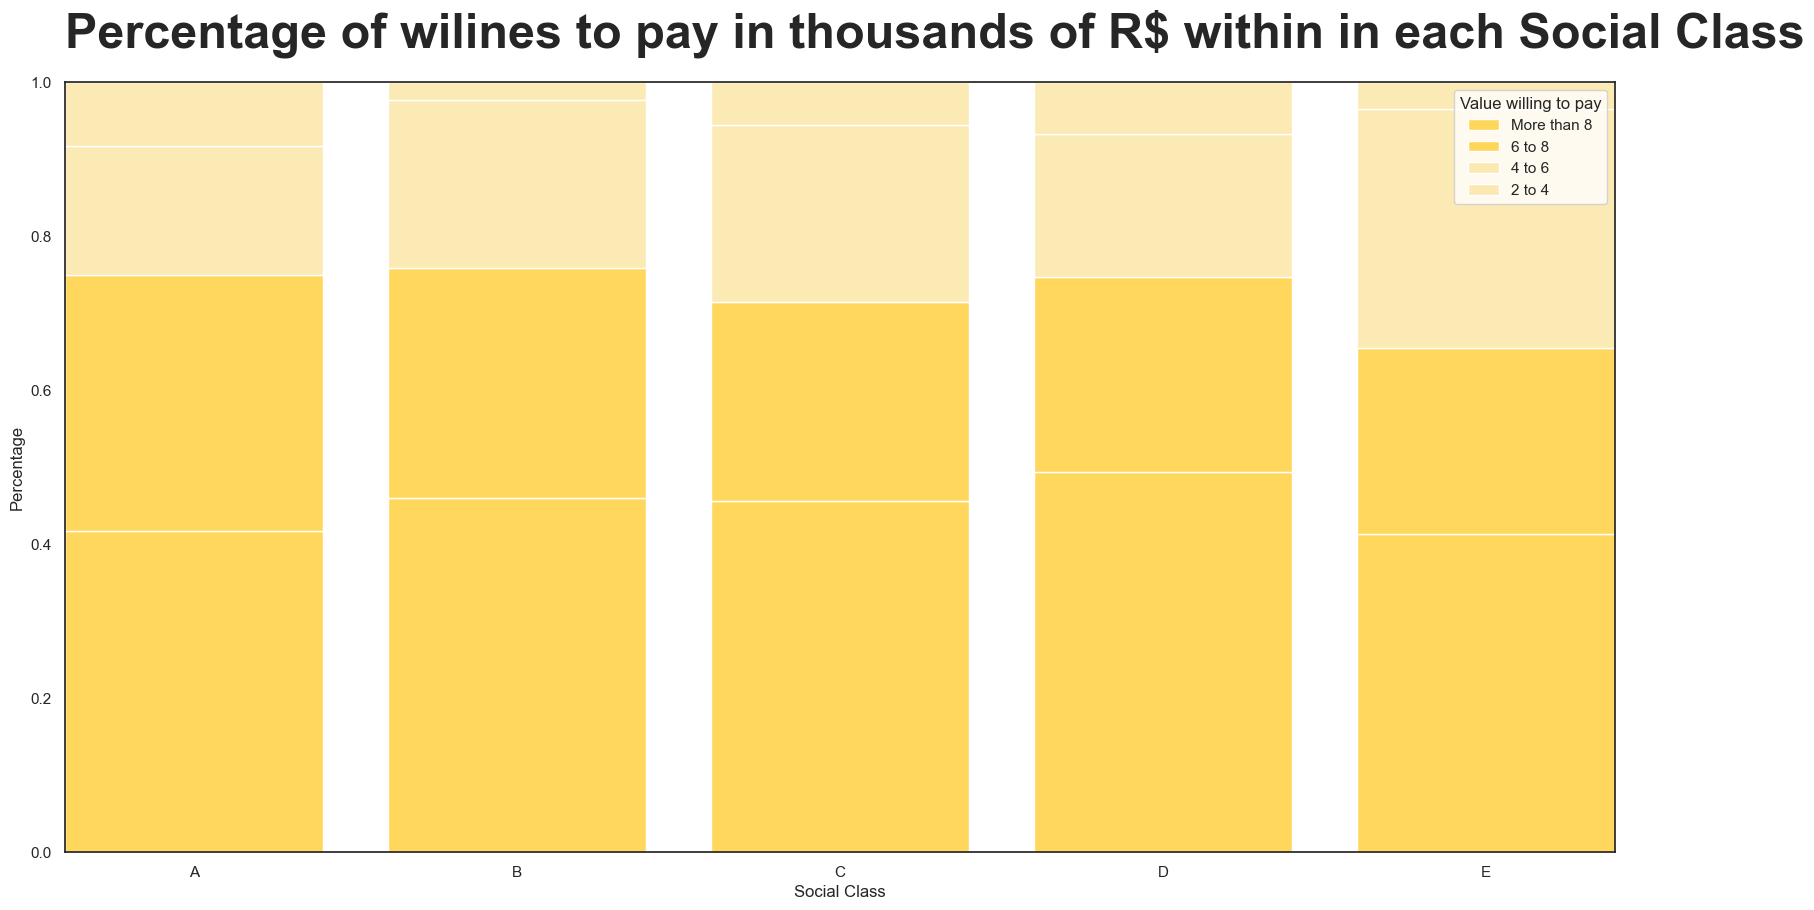

In [ ]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.set_style("white")  # Set the plot background to white

data_translated['Q12 - Social class'] = pd.Categorical(data_translated['Q12 - Social class'], social_class_oder)

sns.histplot(data = data_translated, 
                x = 'Q12 - Social class', 
                hue = 'Q7 - Client\'s disposition',
                hue_order = willigness_to_learn_order,
                palette = palette_willigness_to_learn,
                stat="probability", multiple="fill", shrink=.8 )
                    
plt.title('Percentage of wilines to pay in thousands of R$ within in each Social Class', fontdict = {'fontsize' : 35, 'fontweight' : "bold"}, loc = 'left', pad = 25) 
plt.ylabel('Percentage', fontsize = 12) 
plt.xlabel('Social Class', fontsize = 12)
plt.legend(title = 'Value willing to pay', labels = ordem_value_willing_to_pay[::-1], loc = 'upper right')

plt.show()

#### **Q7 - By Group Age**

**Group Age Insights:**

- Younger age groups (25-29, 30-39, 40-49) show a higher willingness to learn about their personal financial planning compared to older age groups (50-59, 60+). This could be attributed to the fact that older age groups might already have established financial plans or may be less inclined to invest time in building their personal financial planning due to other priorities or financial stability.

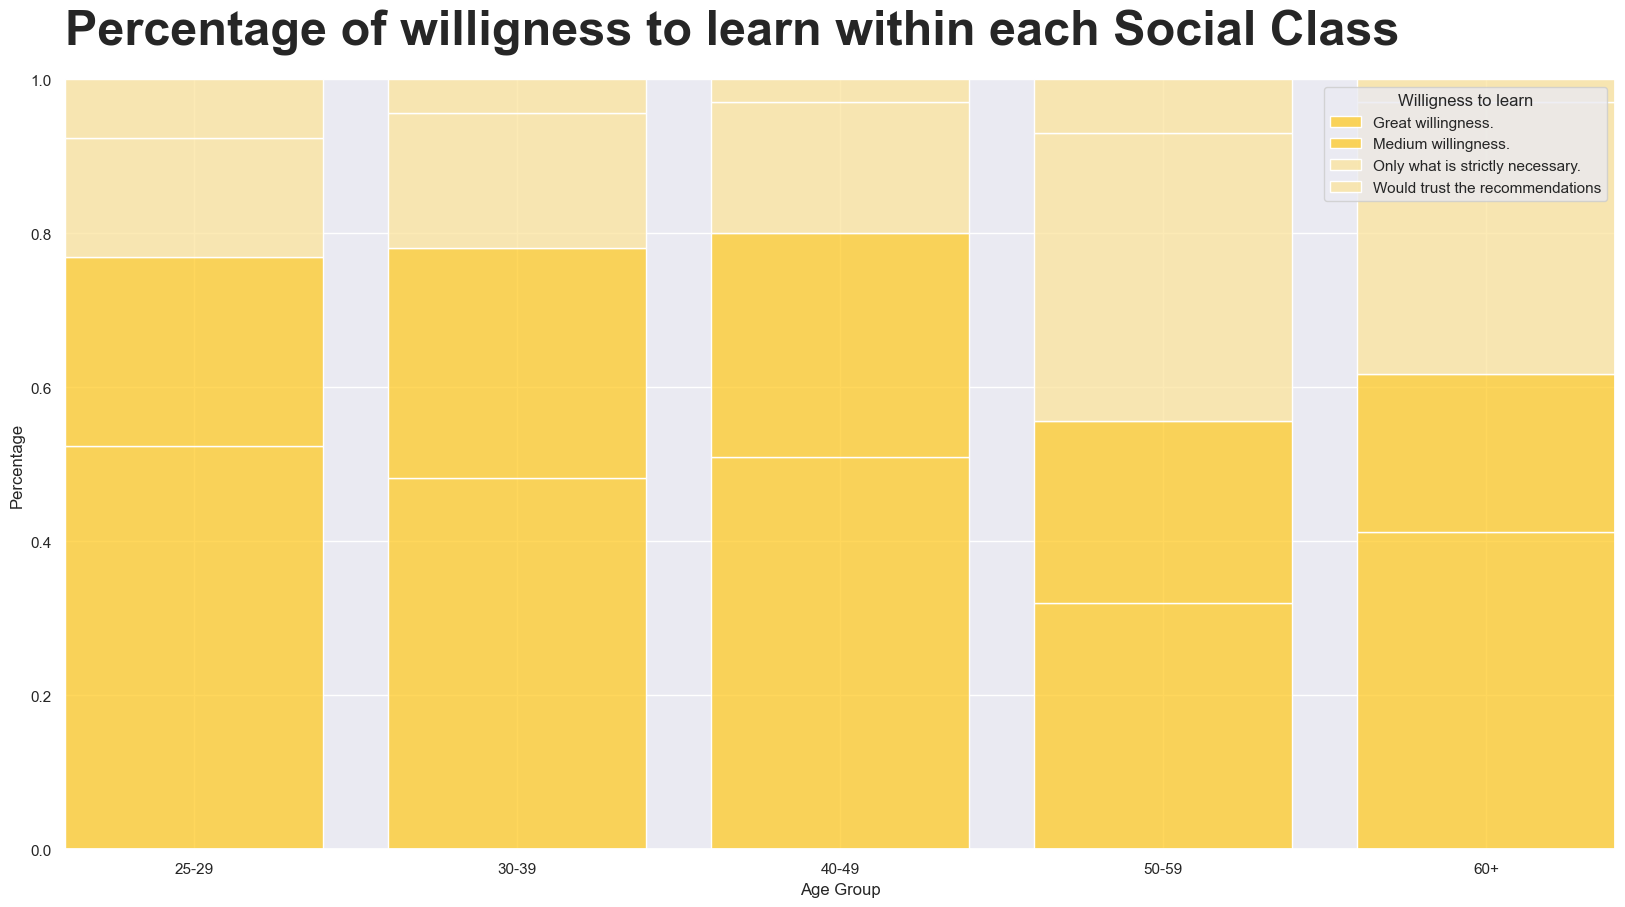

In [ ]:
sns.set(rc = {'figure.figsize':(20,10)})

data_translated['Age group'] = pd.Categorical(data_translated['Age group'], age_group_order)

sns.histplot(data = data_translated, 
                    x = 'Age group', 
                    hue = 'Q7 - Client\'s disposition',
                    hue_order = willigness_to_learn_order,
                    palette = palette_willigness_to_learn,
                    stat="probability", multiple="fill", shrink=.8 )
                    
plt.title('Percentage of willigness to learn within each Social Class', fontdict = {'fontsize' : 35, 'fontweight' : "bold"}, loc = 'left', pad = 25) 
plt.ylabel('Percentage', fontsize = 12) 
plt.xlabel('Age Group', fontsize = 12)
plt.legend(title = 'Willigness to learn', labels = willigness_to_learn_order[::-1], loc = 'upper right')

plt.show()

## **Understanding which products people are more willing to purchase (Question 8)**

*Question 8: What is your willingness to purchase the products below, if necessary for the proper functioning of your personal Financial Plan?*

| Topics                  |
|-------------------------|
|      Consortium         |
|      Financing          |
|      Insurance          |
|      Investment Products|
|      Investment Service |
|      Others             |

By gaining insights into respondents' preferences for financial products, financial service providers can better understand the demand and market potential for each category. Tailoring offerings and providing more personalized guidance based on respondents' preferences can lead to increased customer satisfaction and engagement. Additionally, this analysis can help identify opportunities to promote specific financial products and educate respondents about their benefits, ultimately contributing to more informed financial decisions.


In [ ]:
Q8_order = [
    'Q8 - Consortium', 
    'Q8 - Financing', 
    'Q8 - Insurance', 
    'Q8 - Investment products', 
    'Q8 - Investment service', 
    'Q8 - Others'
    ]

#### **Q8 - General**

**General Insights**

- The products people are most interested in are investment products and investment services respectively

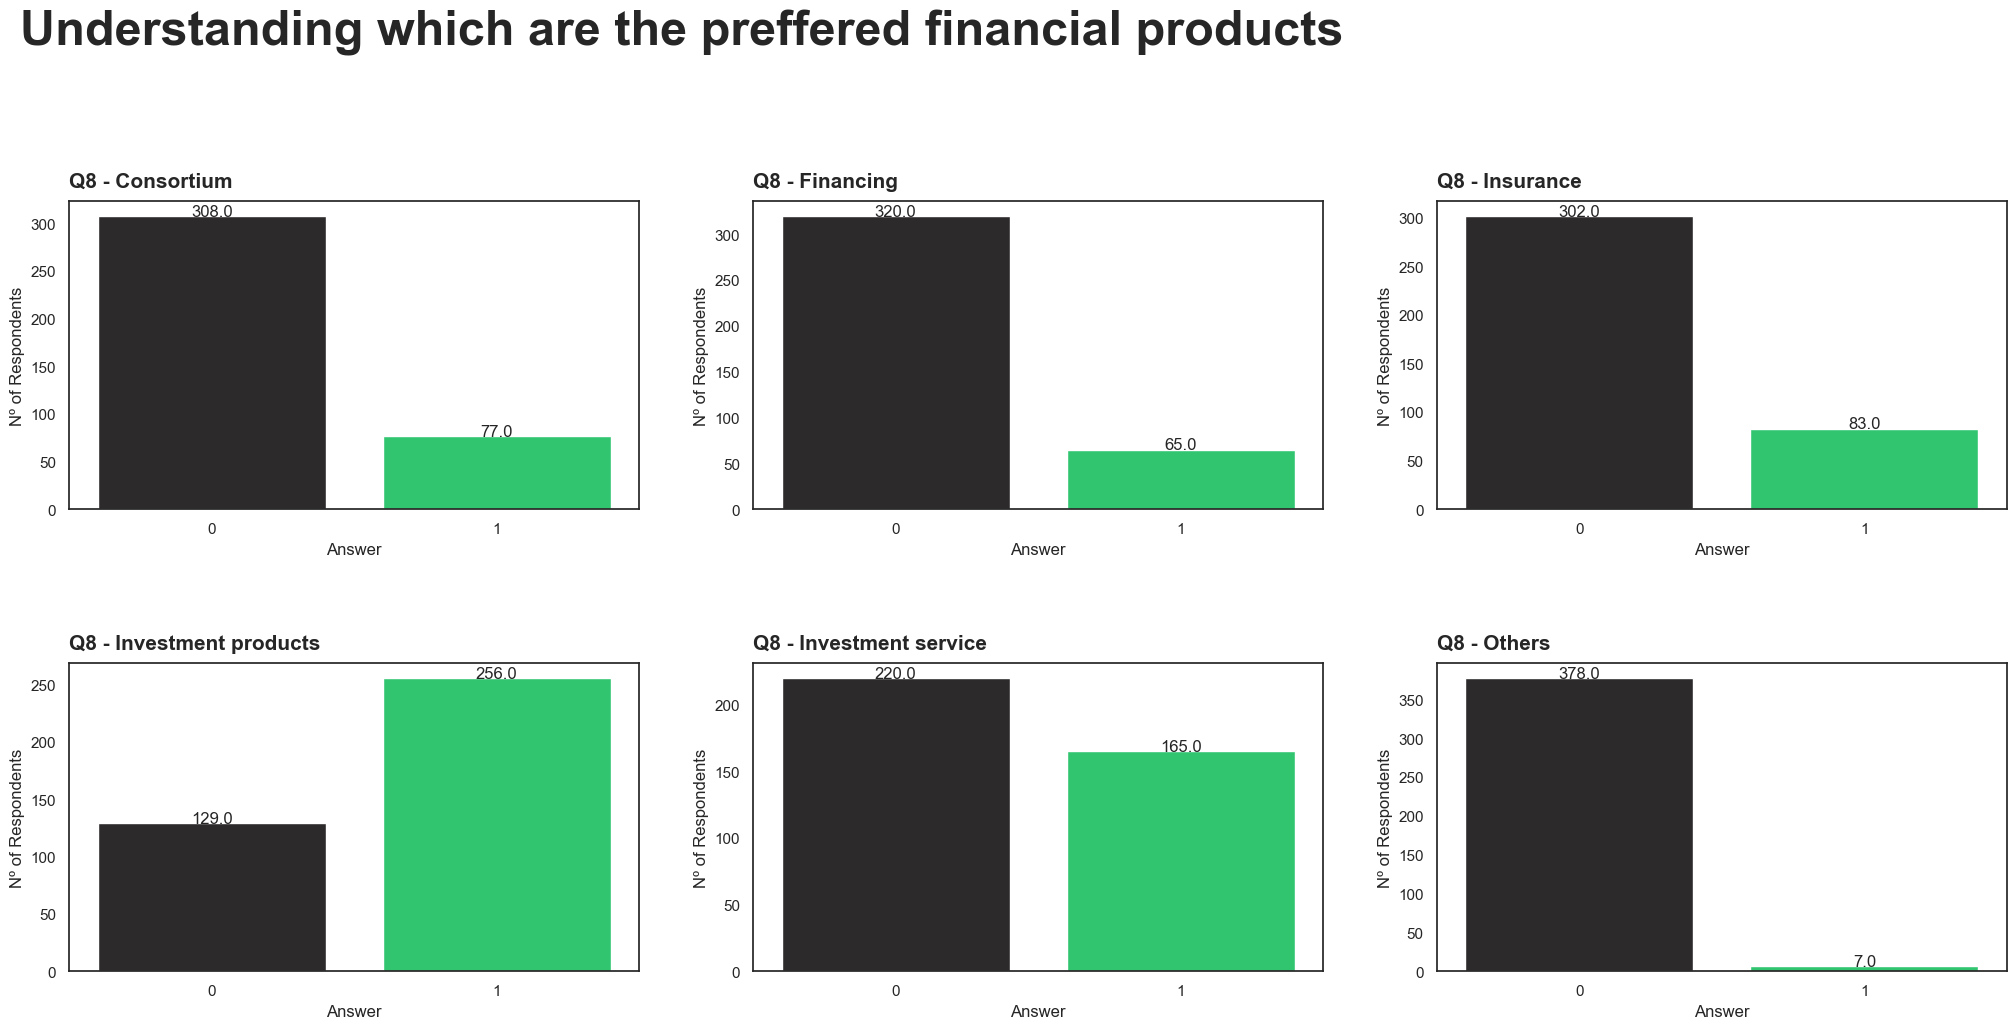

In [ ]:
sns.set(rc = {'figure.figsize':(25,16)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Understanding which are the preffered financial products', fontsize=35, fontweight='bold', x = 0.37, y =1)
plt.subplots_adjust(hspace=0.5)

for n, col in enumerate(Q8_order):

    ax = plt.subplot(3, 3,  1 + n)
    sns.countplot(data = data_translated, 
                    x = col, 
                    palette = palette_yes_no, 
                    ax = ax)
                    
    plt.title(f'{col}', fontdict = {'fontsize' : 15, 'fontweight' : "bold"}, loc = 'left', pad = 10)  
    plt.ylabel('Nº of Respondents', fontsize = 12) 
    plt.xlabel('Answer', fontsize = 12)

    # Adicionando rotúlo de data_translated do Nº de clientes
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
        height,
        '{:1}'.format((height)),
        ha='center',
        size = 12)

plt.show()

#### **Q8 - by Gender**

- Gender does not seem to influence the choice of products so much

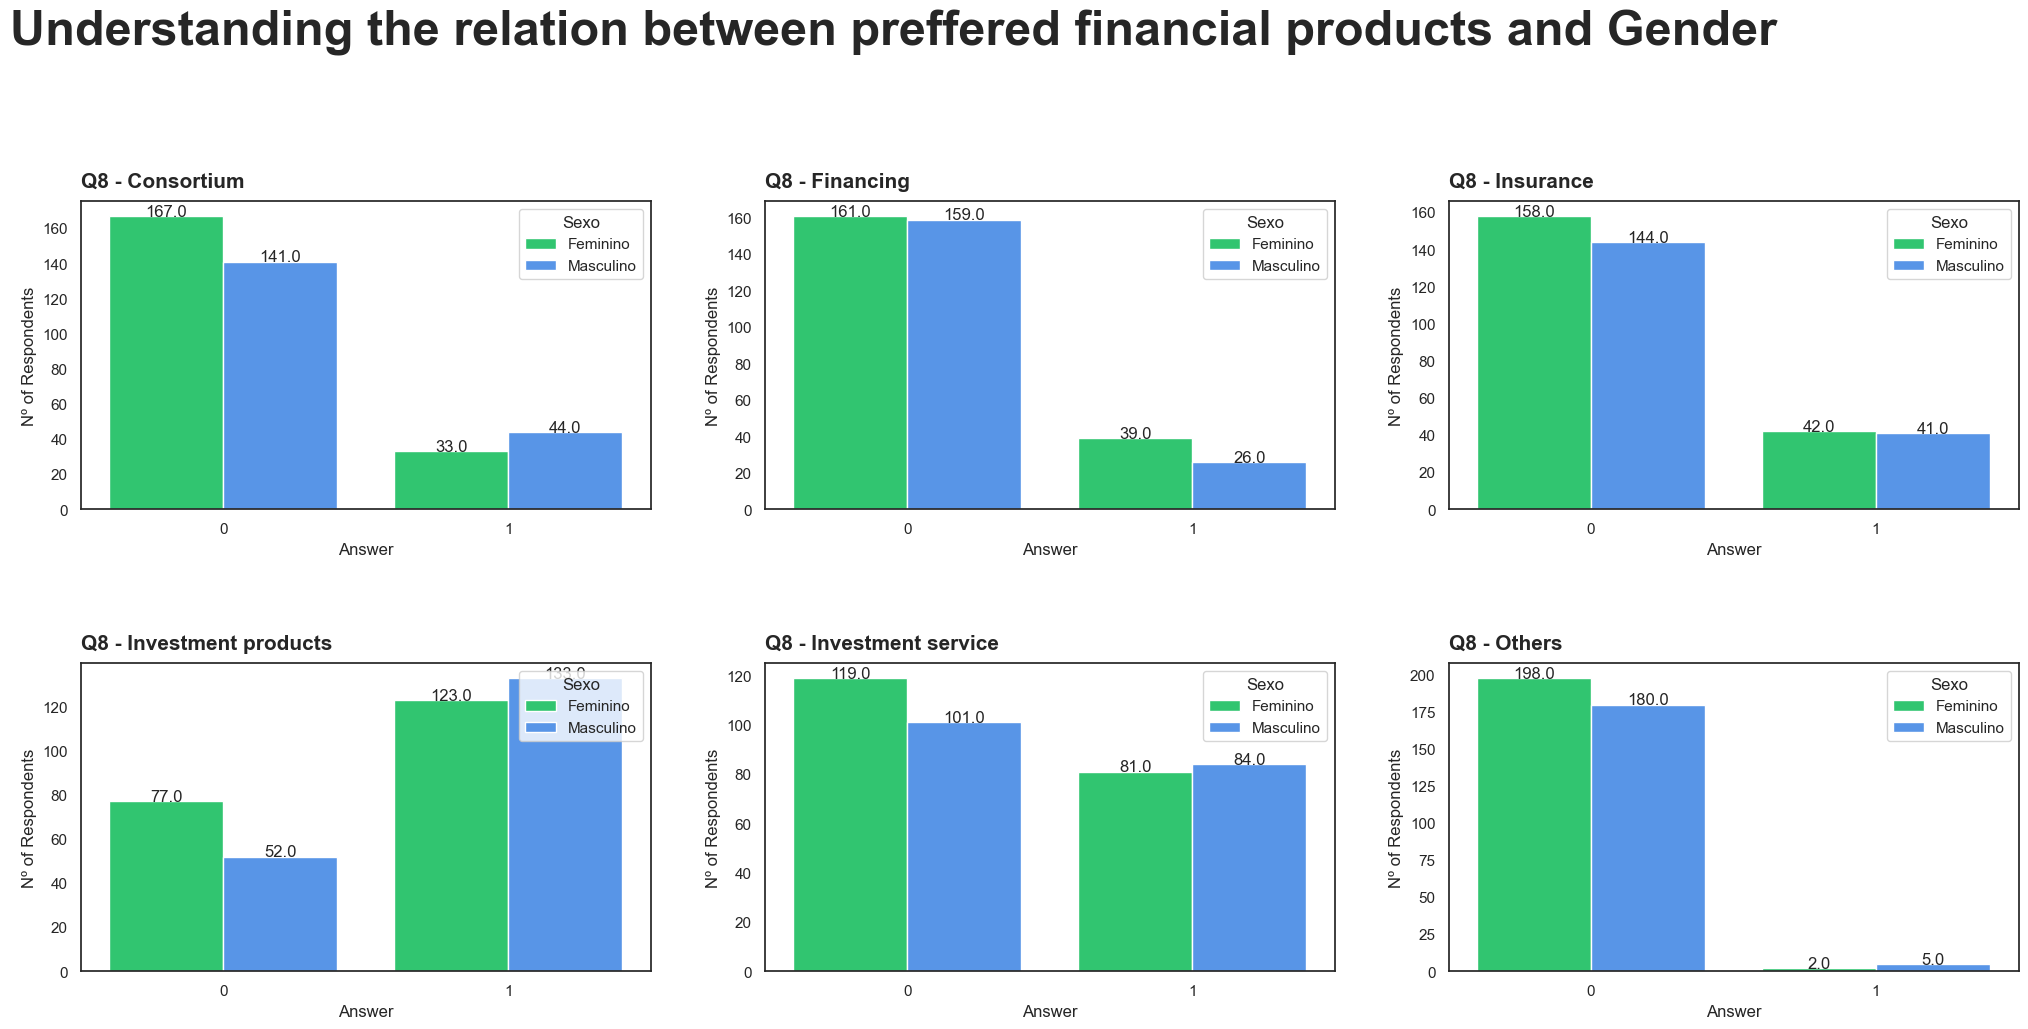

In [ ]:
sns.set(rc = {'figure.figsize':(25,16)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Understanding the relation between preffered financial products and Gender', fontsize=35, fontweight='bold', x = 0.45, y =1)
plt.subplots_adjust(hspace=0.5)

for n, col in enumerate(Q8_order):

    ax = plt.subplot(3, 3,  1 + n)
    sns.countplot(data = data_translated, 
                    x = col, 
                    hue = 'Q9 - Gender',
                    palette = palette_gender, 
                    ax = ax)
                    
    plt.title(f'{col}', fontdict = {'fontsize' : 15, 'fontweight' : "bold"}, loc = 'left', pad = 10)  
    plt.ylabel('Nº of Respondents', fontsize = 12) 
    plt.xlabel('Answer', fontsize = 12)
    plt.legend(title='Sexo', loc='upper right')

    # Adicionando rotúlo de data_translated do Nº de clientes
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
        height,
        '{:1}'.format((height)),
        ha='center',
        size = 12)

plt.show()

#### **Q8 - By Social Class**

**Social Class Insights**

- Lower social classes (D, E) are more likely to acquire financing products, probably due to their low financial education.
- Class A has preference for Insurance, when compared to other classes
- The higher the social class, the greater the willingness to acquire Investment products and services

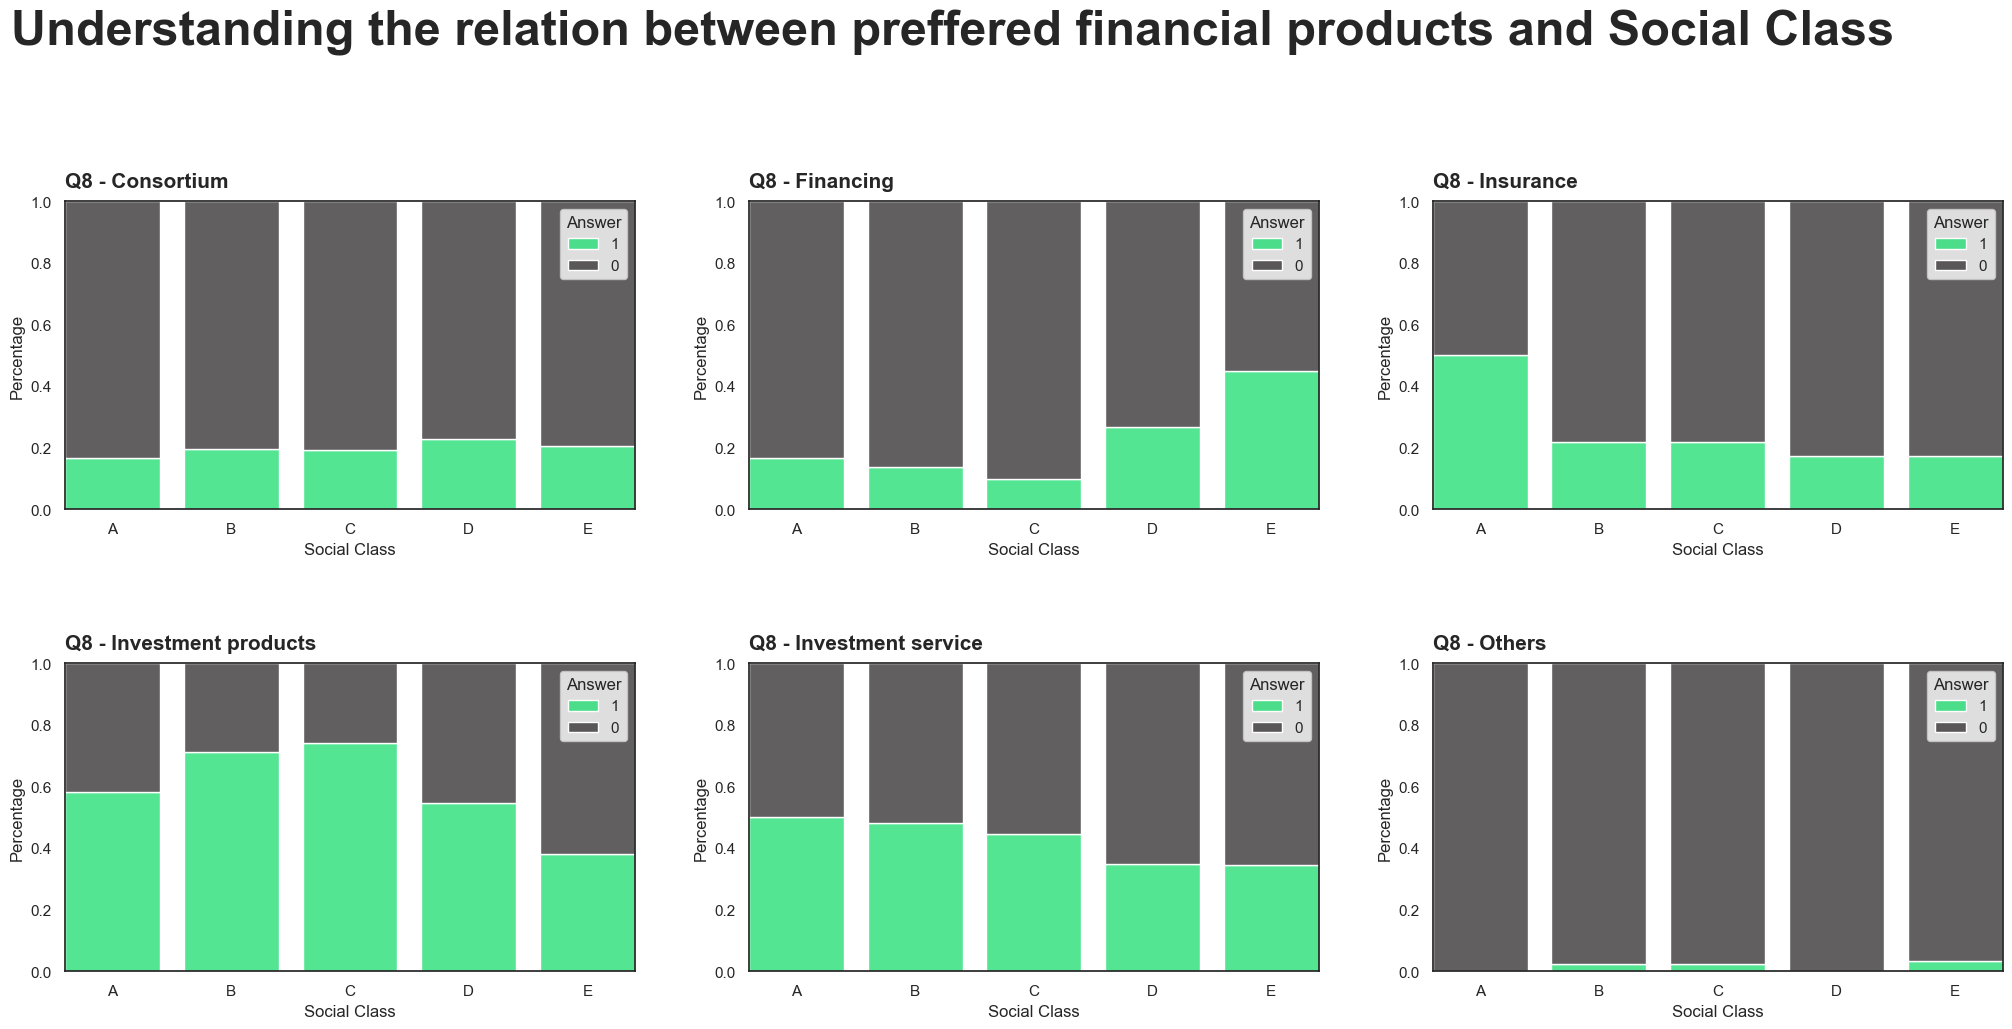

In [ ]:
sns.set(rc = {'figure.figsize':(25,16)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Understanding the relation between preffered financial products and Social Class', fontsize=35, fontweight='bold', x = 0.48, y =1)
plt.subplots_adjust(hspace=0.5)

data_translated['Q12 - Social class'] = pd.Categorical(data_translated['Q12 - Social class'], social_class_oder)

for n, col in enumerate(Q8_order):

    plt.subplot(3, 3,  1 + n)
    sns.histplot(data = data_translated, 
                    x = 'Q12 - Social class', 
                    hue = col,
                    palette = palette_yes_no,
                    stat="probability", multiple="fill", shrink=.8 )
                    
    plt.title(f'{col}', fontdict = {'fontsize' : 15, 'fontweight' : "bold"}, loc = 'left', pad = 10)  
    plt.ylabel('Percentage', fontsize = 12) 
    plt.xlabel('Social Class', fontsize = 12)
    plt.legend(title='Answer', loc='upper right', labels = [1, 0])

plt.show()

#### **Q8 - By Group Age**

**Age Group Insights**

- Age group does not seem to influence the choice of products so much

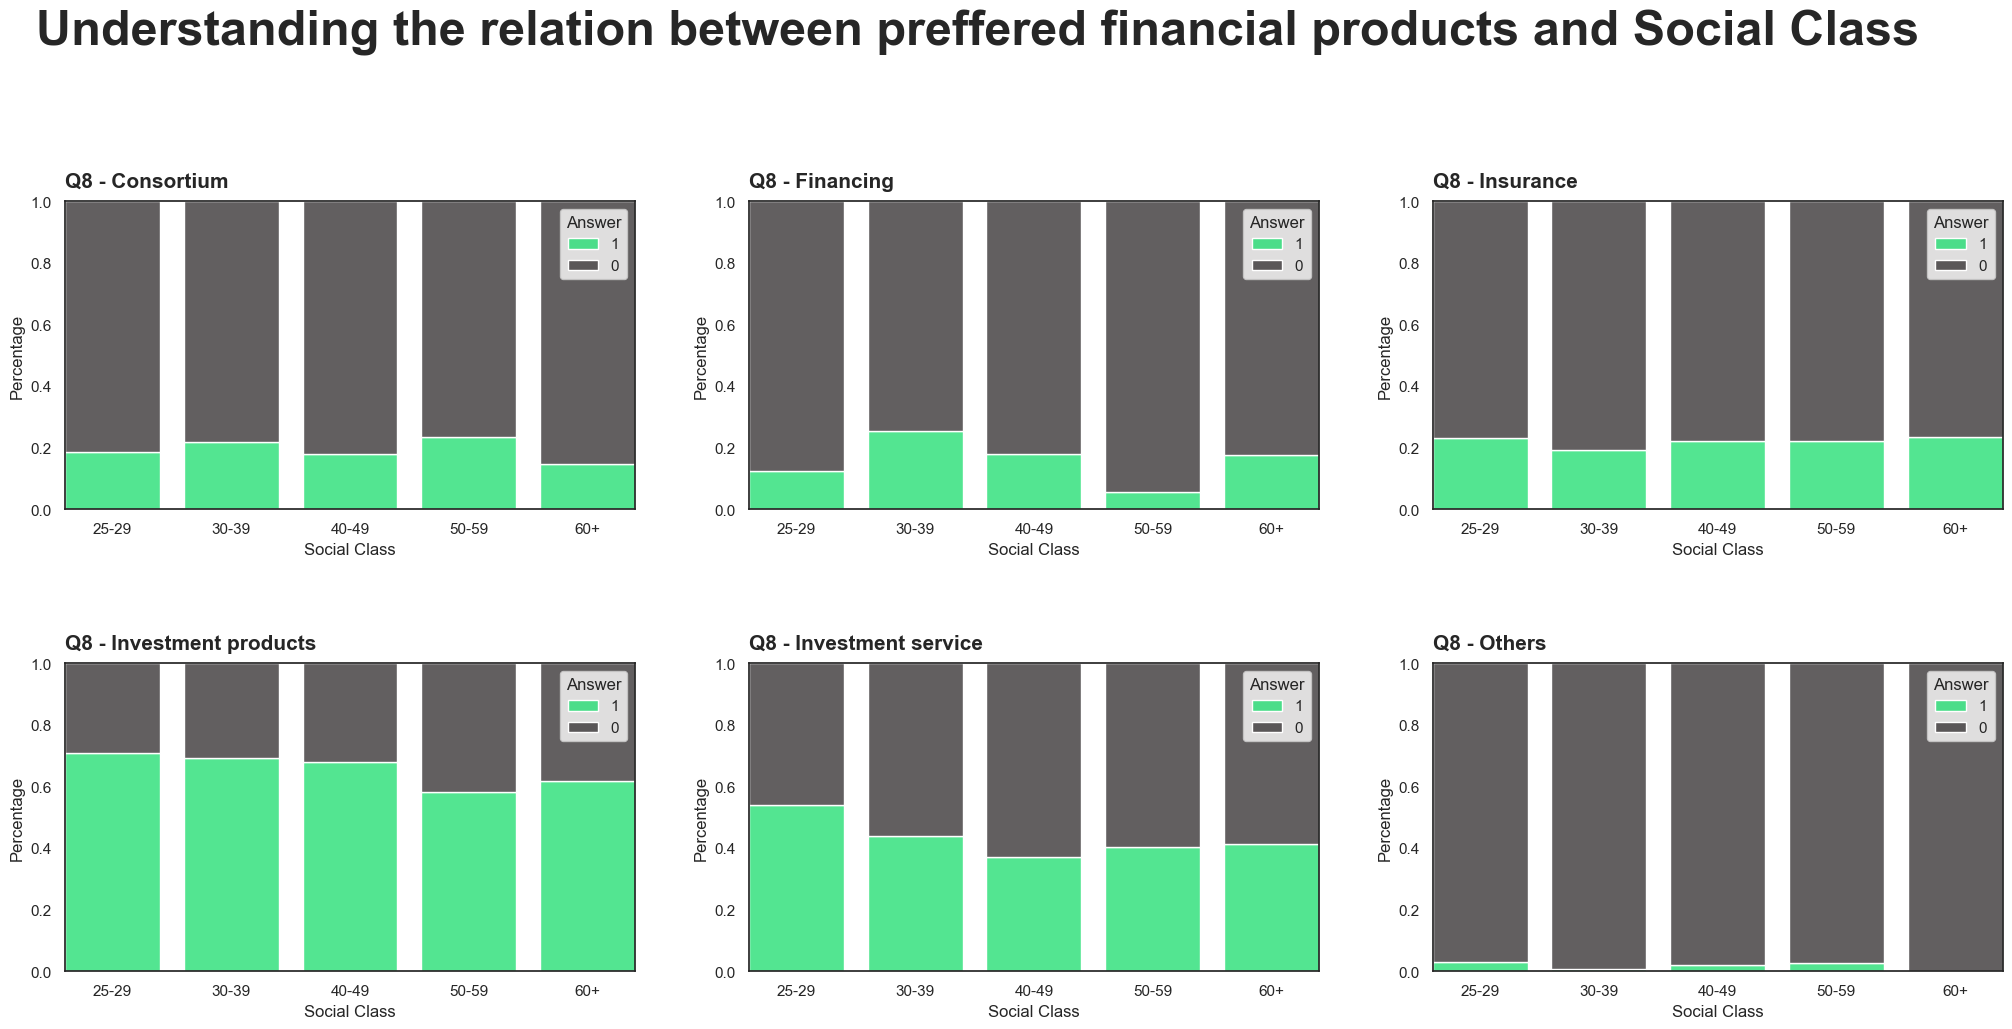

In [ ]:
sns.set(rc = {'figure.figsize':(25,16)})
sns.set_style("white")  # Set the plot background to white

plt.suptitle('Understanding the relation between preffered financial products and Social Class', fontsize=35, fontweight='bold', x = 0.49, y =1)
plt.subplots_adjust(hspace=0.5)

data_translated['Age group'] = pd.Categorical(data_translated['Age group'], age_group_order)

for n, col in enumerate(Q8_order):

    plt.subplot(3, 3,  1 + n)
    sns.histplot(data = data_translated, 
                    x = 'Age group', 
                    hue = col,
                    palette = palette_yes_no,
                    stat="probability", multiple="fill", shrink=.8 )
                    
    plt.title(f'{col}', fontdict = {'fontsize' : 15, 'fontweight' : "bold"}, loc = 'left', pad = 10)  
    plt.ylabel('Percentage', fontsize = 12) 
    plt.xlabel('Social Class', fontsize = 12)
    plt.legend(title='Answer', loc='upper right', labels = [1, 0])

plt.show()

## **Extra Insights**

### **Are people who can't save more interested in financial management?**

Interests of people who marked that they cannot save on question 3

In [ ]:
non_savers = data_translated.loc[(data_translated['Q3 - I can\'t save.'] == 1)][['Q5 - Financial Management', 'Q5 - Risk Management', 'Q5 - Asset Management', 'Q5 - Tax Planning', 'Q5 - Retirement Planning', 'Q5 - Succession Planning']]
non_savers.sum()


Q5 - Financial Management    56
Q5 - Risk Management         22
Q5 - Asset Management        18
Q5 - Tax Planning            13
Q5 - Retirement Planning     26
Q5 - Succession Planning      7
dtype: int64

R: Yes, proportionately people who cannot save are more interested in financial management


### **Does the willingness to pay increase with the maturity of the target audience?**

Mature Audience is defined as those who marked 1 in the following questions:

- Q1 - I analyze how much I intend to spend and receive during the year
- Q1 - I study to identify and eliminate
- Q1 - I look for ways to optimize taxation
- Q1 - I manage my investment portfolio
- Q1 - I plan for the succession of my assets

Mature Public

In [ ]:
mature_audience = data_translated.loc[
    (data_translated['Q1 - I study to identify and eliminate'] == 1) |
    (data_translated['Q1 - I look for ways to optimize taxation'] == 1) |
    (data_translated['Q1 - I manage my investment portfolio'] == 1) |
    (data_translated['Q1 - I plan for the succession of my assets'] == 1) |
    (data_translated['Q1 - I analyze how much I intend to spend and receive during the year'] == 1),
    ['Q6 - Value willing to pay for a financial planning']
]

print(mature_audience.value_counts())

Q6 - Value willing to pay for a financial planning
1 to 2                                                114
Nothing                                                57
2 to 4                                                 19
4 to 6                                                  7
6 to 8                                                  4
More than 8                                             4
dtype: int64


General Public

In [ ]:
data_translated['Q6 - Value willing to pay for a financial planning'].value_counts()

1 to 2         196
Nothing        149
2 to 4          22
4 to 6           9
6 to 8           5
More than 8      4
Name: Q6 - Value willing to pay for a financial planning, dtype: int64

R: A: Comparing the two, you can see that yes. Comparing the two, it is possible to see that the people who are more willing to pay are the mature ones.

### **What is the correlation between the maturity of the audience and the reasons that would lead this audience to hire a personal financial planning service?**

"Mature Audience" refers to those who marked 1 in the following questions:

- Q1 - I analyze how much I intend to spend and receive during the year
- Q1 - I study to identify and eliminate
- Q1 - I look for ways to optimize taxation
- Q1 - I manage my investment portfolio
- Q1 - I plan for the succession of my assets

In [ ]:
mature_audience = data_translated.loc[
    (data_translated['Q1 - I study to identify and eliminate'] == 1) |
    (data_translated['Q1 - I look for ways to optimize taxation'] == 1) |
    (data_translated['Q1 - I manage my investment portfolio'] == 1) |
    (data_translated['Q1 - I plan for the succession of my assets'] == 1) |
    (data_translated['Q1 - I analyze how much I intend to spend and receive during the year'] == 1),
    Q3_order
]


print(mature_audience.sum())

Q3 - I can't save.                                                  18
Q3 - I worry about risks                                            85
Q3 - I want to start investing                                      56
Q3 - I do invest, but without a strategy                            80
Q3 - I think I could be paying less taxes                           44
Q3 - I don't know how much I need to save for my retirement.        24
Q3 - I don't know how to plan for succession                        33
Q3 - I am not interested in personal financial planning services    21
dtype: int64


R: The motivations of the mature public in relation to Financial Planning are:

- Q3 - I worry about risks
- Q3 - I want to start investing  
- Q3 - I do invest, but without a strategy  

Unlike the motivations of the general public, one of the reasons was wanting to start investing. The mature public, for the most part, already invests and wants to improve its strategy, as well as reduce risks, which is everyone's concern, and pay less tax, which is an especially greater motivation for the more mature public.